# 1. Preparation

## 1.1. Library Upload

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Uploading Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import sklearn
import xgboost as xgb
import tensorflow as tf
from folium.plugins import FastMarkerCluster
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from folium.plugins import HeatMap

C:\Users\ahska\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 1.2. Data Upload

In [3]:
# Uploading the dataset
data = pd.read_csv('C:/Users/ahska/Documents/Ahska/UCL/3 - Final Project (Dissertation)/Dissertation 2/Main Data/Redfin Dataset (Final 4)/redfin_accessibility_v2.csv')
data

C:\Users\ahska\AppData\Local\Temp\ipykernel_8996\3319388646.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/ahska/Documents/Ahska/UCL/3 - Final Project (Dissertation)/Dissertation 2/Main Data/Redfin Dataset (Final 4)/redfin_accessibility_v2.csv')


,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,NEIGHBORHOOD,PRICE,BEDS,...,bar_accessibility,cafe_and_bakery_accessibility,food_others_accessibility,restaurant_accessibility,health_store_accessibility,hospital_accessibility,places_of_worship_accessibility,safety_accessibility,stores_essentials_accessibility,stores_others_accessibility
0,PAST SALE,November-3-2023,Single Family Residential,443 11th Ave W,Kirkland,WA,98003,Federal Way,2700000,2,...,1.595694,3.051197,2.473366,10.947243,0.162567,0.274124,1.633359,0.994180,2.169050,9.973473
1,PAST SALE,June-30-2023,Single Family Residential,2817 88th Ave NE,Hunts Point,WA,98004,Bellevue (Downtown and West Bellevue),1998000,4,...,0.000000,0.923546,0.000000,0.000000,0.000000,0.000000,0.000000,0.648050,0.797466,0.763508
2,PAST SALE,July-21-2023,Single Family Residential,1008 88th Ave NE,Bellevue,WA,98004,Bellevue (Downtown and West Bellevue),5498000,4,...,0.124929,0.891291,0.511809,0.670230,2.309658,0.712440,2.162928,0.195609,1.295898,4.220848
3,PAST SALE,January-27-2023,Single Family Residential,1520 90th Pl NE,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),10500000,5,...,0.002887,0.340939,0.292031,0.215876,1.700763,0.573254,2.479231,0.792525,0.825058,2.314377
4,MLS Listing,NaN,Single Family Residential,8830 NE 28th St,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),8688000,5,...,0.000000,0.972960,0.000000,0.000000,0.000000,0.000000,0.008462,0.844531,0.712074,0.889961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16659,PAST SALE,April-21-2020,Single Family Residential,7135 32nd Ave SW,Seattle,WA,98126,"West Seattle, Delridge",950000,4,...,1.200146,2.399690,1.506827,3.583604,2.246205,0.496974,4.826767,0.641446,2.702233,6.853520
16660,PAST SALE,July-13-2022,Single Family Residential,9026 30th Ave SW,Seattle,WA,98126,"West Seattle, Delridge",775000,3,...,1.684236,7.709665,3.588739,11.633927,2.675463,0.071011,4.509049,0.107711,6.105951,18.249940
16661,PAST SALE,July-13-2022,Single Family Residential,9026 30th Ave SW,Seattle,WA,98126,"West Seattle, Delridge",775000,3,...,1.684236,7.709665,3.588739,11.633927,2.675463,0.071011,4.509049,0.107711,6.105951,18.249940
16662,PAST SALE,November-9-2022,Single Family Residential,8150 32nd Ave SW,Seattle,WA,98126,"West Seattle, Delridge",1150000,4,...,0.875637,4.332201,2.193801,4.861157,0.999305,0.446238,3.915165,0.612154,2.545826,9.123077


# 2. Data Preprocessing

## 2.1. Data Check

In [4]:
# Displaying information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16664 entries, 0 to 16663
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SALE TYPE                            16664 non-null  object 
 1   SOLD DATE                            13747 non-null  object 
 2   PROPERTY TYPE                        16664 non-null  object 
 3   ADDRESS                              16664 non-null  object 
 4   CITY                                 16664 non-null  object 
 5   STATE OR PROVINCE                    16664 non-null  object 
 6   ZIP OR POSTAL CODE                   16664 non-null  int64  
 7   NEIGHBORHOOD                         16664 non-null  object 
 8   PRICE                                16664 non-null  int64  
 9   BEDS                                 16664 non-null  int64  
 10  BATHS                                16664 non-null  float64
 11  LOCATION                    

In [5]:
# Checking for null values/missing values
data.isnull().sum()

SALE TYPE                                  0
SOLD DATE                               2917
PROPERTY TYPE                              0
ADDRESS                                    0
CITY                                       0
STATE OR PROVINCE                          0
ZIP OR POSTAL CODE                         0
NEIGHBORHOOD                               0
PRICE                                      0
BEDS                                       0
BATHS                                      0
LOCATION                                   0
SQUARE FEET                                0
LOT SIZE                                2610
YEAR BUILT                                 0
DAYS ON MARKET                         14155
$/SQUARE FEET                              0
HOA/MONTH                              12109
STATUS                                  1017
NEXT OPEN HOUSE START TIME             16254
NEXT OPEN HOUSE END TIME               16254
URL                                        0
SOURCE    

## 2.2. Feature Engineering

### 2.2.1. "Year Built" Feature Transformation

In [6]:
# Creating 'age' as a new variable by extracting it from the 'yr_built' variable
data.rename(columns={'YEAR BUILT':'AGE'},inplace=True)
data['AGE'] = 2024 - data['AGE']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16664 entries, 0 to 16663
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SALE TYPE                            16664 non-null  object 
 1   SOLD DATE                            13747 non-null  object 
 2   PROPERTY TYPE                        16664 non-null  object 
 3   ADDRESS                              16664 non-null  object 
 4   CITY                                 16664 non-null  object 
 5   STATE OR PROVINCE                    16664 non-null  object 
 6   ZIP OR POSTAL CODE                   16664 non-null  int64  
 7   NEIGHBORHOOD                         16664 non-null  object 
 8   PRICE                                16664 non-null  int64  
 9   BEDS                                 16664 non-null  int64  
 10  BATHS                                16664 non-null  float64
 11  LOCATION                    

In [8]:
# Ensuring conversion of categorical variable is successful
data.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,NEIGHBORHOOD,PRICE,BEDS,...,bar_accessibility,cafe_and_bakery_accessibility,food_others_accessibility,restaurant_accessibility,health_store_accessibility,hospital_accessibility,places_of_worship_accessibility,safety_accessibility,stores_essentials_accessibility,stores_others_accessibility
0,PAST SALE,November-3-2023,Single Family Residential,443 11th Ave W,Kirkland,WA,98003,Federal Way,2700000,2,...,1.595694,3.051197,2.473366,10.947243,0.162567,0.274124,1.633359,0.994180,2.169050,9.973473
1,PAST SALE,June-30-2023,Single Family Residential,2817 88th Ave NE,Hunts Point,WA,98004,Bellevue (Downtown and West Bellevue),1998000,4,...,0.000000,0.923546,0.000000,0.000000,0.000000,0.000000,0.000000,0.648050,0.797466,0.763508
2,PAST SALE,July-21-2023,Single Family Residential,1008 88th Ave NE,Bellevue,WA,98004,Bellevue (Downtown and West Bellevue),5498000,4,...,0.124929,0.891291,0.511809,0.670230,2.309658,0.712440,2.162928,0.195609,1.295898,4.220848
3,PAST SALE,January-27-2023,Single Family Residential,1520 90th Pl NE,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),10500000,5,...,0.002887,0.340939,0.292031,0.215876,1.700763,0.573254,2.479231,0.792525,0.825058,2.314377
4,MLS Listing,NaN,Single Family Residential,8830 NE 28th St,Clyde Hill,WA,98004,Bellevue (Downtown and West Bellevue),8688000,5,...,0.000000,0.972960,0.000000,0.000000,0.000000,0.000000,0.008462,0.844531,0.712074,0.889961


### 2.2.2. Filtering priority Features

In [55]:
def filter_features_by_categories(data, core_features, measure_type, categories):
    """
    Filter DataFrame columns based on measurement type and a list of categories.
    
    Parameters:
    - data: pandas DataFrame.
    - core_features: list of strings, core columns to retain.
    - measure_type: string, measurement type (e.g., 'accessibility', 'density').
    - categories: list of strings, categories to focus on (e.g., ['transportation', 'health']).
    
    Returns:
    - DataFrame with filtered features.
    """
    # Initialize an empty list to store matched features
    measured_features = []
    
    # Loop through each category and collect features that match the measurement type and category
    for category in categories:
        pattern = f'{category}_{measure_type}'
        category_features = [col for col in data.columns if pd.Series(col).str.contains(pattern, regex=True).any()]
        measured_features.extend(category_features)
    
    # Combine core features with measured features
    features_to_keep = core_features + measured_features
    filtered_data = data[features_to_keep].copy()
    
    return filtered_data

# Example usage
core_features = ['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'AGE', 'SALE TYPE', 'PROPERTY TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long']  # Add more as needed
measure_type = 'accessibility'  # or 'density'
categories = ['airport', 'bus_station', 'ferry_terminal', 'light_rail_station', 'train_station', 'transit_station', 'transporation_others', 'school', 'park', 'hospital']  # Can include multiple categories

# Assuming 'data_1' is your DataFrame
filtered_data = filter_features_by_categories(data, core_features, measure_type, categories)

In [56]:
filtered_data

,PRICE,BEDS,BATHS,SQUARE FEET,AGE,SALE TYPE,PROPERTY TYPE,SOLD DATE,ADDRESS,CITY,...,airport_accessibility,bus_station_accessibility,ferry_terminal_accessibility,light_rail_station_accessibility,train_station_accessibility,transit_station_accessibility,preschool_accessibility,school_accessibility,park_accessibility,hospital_accessibility
0,2700000,2,2.5,3240,26,PAST SALE,Single Family Residential,November-3-2023,443 11th Ave W,Kirkland,...,0.0,8.922428,0.0,0.0,0.0,11.228703,0.532412,3.987060,12.862183,0.274124
1,1998000,4,2.5,1830,48,PAST SALE,Single Family Residential,June-30-2023,2817 88th Ave NE,Hunts Point,...,0.0,3.017447,0.0,0.0,0.0,5.266543,0.000000,1.077636,2.937513,0.000000
2,5498000,4,5.5,5320,8,PAST SALE,Single Family Residential,July-21-2023,1008 88th Ave NE,Bellevue,...,0.0,5.718543,0.0,0.0,0.0,6.509344,0.105568,3.473282,5.223794,0.712440
3,10500000,5,4.5,4930,42,PAST SALE,Single Family Residential,January-27-2023,1520 90th Pl NE,Clyde Hill,...,0.0,5.890668,0.0,0.0,0.0,8.788340,0.204998,4.339838,2.771618,0.573254
4,8688000,5,6.0,7058,1,MLS Listing,Single Family Residential,NaN,8830 NE 28th St,Clyde Hill,...,0.0,3.283704,0.0,0.0,0.0,6.316637,0.000000,1.442196,2.557829,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16659,950000,4,2.0,1810,98,PAST SALE,Single Family Residential,April-21-2020,7135 32nd Ave SW,Seattle,...,0.0,23.123222,0.0,0.0,0.0,16.194409,0.868458,7.887527,14.481983,0.496974
16660,775000,3,3.0,1970,100,PAST SALE,Single Family Residential,July-13-2022,9026 30th Ave SW,Seattle,...,0.0,27.051491,0.0,0.0,0.0,15.318017,1.708279,9.983614,5.832056,0.071011
16661,775000,3,3.0,1970,100,PAST SALE,Single Family Residential,July-13-2022,9026 30th Ave SW,Seattle,...,0.0,27.051491,0.0,0.0,0.0,15.318017,1.708279,9.983614,5.832056,0.071011
16662,1150000,4,2.5,2780,10,PAST SALE,Single Family Residential,November-9-2022,8150 32nd Ave SW,Seattle,...,0.0,22.802422,0.0,0.0,0.0,19.276628,0.150235,6.320566,6.526378,0.446238


## 2.3. Data Variations & Splitting

### 2.3.1. Version 1 - Scaling for All Features

# Creating a new version of the dataset
data_1 = filtered_data.copy()

# Selecting numerical columns (excluding target variable 'price')
features_1 = data_1.drop(columns=['SALE TYPE', 'PROPERTY TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'])
numerical_features_1 = features_1.select_dtypes(include=['number']).columns

# Executing data scaling to ensure robustness of the data
scaler = StandardScaler()
data_1[numerical_features_1] = scaler.fit_transform(data_1[numerical_features_1])

In [58]:
data_1.head(5)

,PRICE,BEDS,BATHS,SQUARE FEET,AGE,SALE TYPE,PROPERTY TYPE,SOLD DATE,ADDRESS,CITY,...,airport_accessibility,bus_station_accessibility,ferry_terminal_accessibility,light_rail_station_accessibility,train_station_accessibility,transit_station_accessibility,preschool_accessibility,school_accessibility,park_accessibility,hospital_accessibility
0,1.021841,-0.827142,0.205092,1.205896,-0.654827,PAST SALE,Single Family Residential,November-3-2023,443 11th Ave W,Kirkland,...,-0.275866,-1.039595,-0.105997,-0.311233,-0.161117,-0.317520,-0.963961,-1.073236,-0.290692,-0.260848
1,0.542123,0.728732,0.205092,-0.105309,-0.097352,PAST SALE,Single Family Residential,June-30-2023,2817 88th Ave NE,Hunts Point,...,-0.275866,-1.538285,-0.105997,-0.311233,-0.161117,-1.277765,-1.357536,-1.737462,-0.525012,-0.309558
2,2.933879,0.728732,3.070048,3.140155,-1.110944,PAST SALE,Single Family Residential,July-21-2023,1008 88th Ave NE,Bellevue,...,-0.275866,-1.310171,-0.105997,-0.311233,-0.161117,-1.077603,-1.279498,-1.190533,-0.471033,-0.182962
3,6.352041,1.506669,2.115063,2.777482,-0.249391,PAST SALE,Single Family Residential,January-27-2023,1520 90th Pl NE,Clyde Hill,...,-0.275866,-1.295635,-0.105997,-0.311233,-0.161117,-0.710557,-1.205996,-0.992696,-0.528928,-0.207695
4,5.113795,1.506669,3.547540,4.756378,-1.288322,MLS Listing,Single Family Residential,NaN,8830 NE 28th St,Clyde Hill,...,-0.275866,-1.515799,-0.105997,-0.311233,-0.161117,-1.108640,-1.357536,-1.654233,-0.533976,-0.309558


#### Data Splitting

In [59]:
# Uploading the library
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    data_1.drop(['PRICE', 'SALE TYPE', 'PROPERTY TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
    data_1['PRICE'],
    test_size=0.3,
    random_state=10
)

### 2.3.2. Version 2 - Scaling for Price Only

In [60]:
# Creating a new version of the dataset
data_2 = filtered_data.copy()

# Executing data scaling to ensure robustness of the data
scaler = StandardScaler()
data_2['PRICE'] = scaler.fit_transform(data_2[['PRICE']])


In [61]:
data_2.head()

,PRICE,BEDS,BATHS,SQUARE FEET,AGE,SALE TYPE,PROPERTY TYPE,SOLD DATE,ADDRESS,CITY,...,airport_accessibility,bus_station_accessibility,ferry_terminal_accessibility,light_rail_station_accessibility,train_station_accessibility,transit_station_accessibility,preschool_accessibility,school_accessibility,park_accessibility,hospital_accessibility
0,1.021841,2,2.5,3240,26,PAST SALE,Single Family Residential,November-3-2023,443 11th Ave W,Kirkland,...,0.0,8.922428,0.0,0.0,0.0,11.228703,0.532412,3.987060,12.862183,0.274124
1,0.542123,4,2.5,1830,48,PAST SALE,Single Family Residential,June-30-2023,2817 88th Ave NE,Hunts Point,...,0.0,3.017447,0.0,0.0,0.0,5.266543,0.000000,1.077636,2.937513,0.000000
2,2.933879,4,5.5,5320,8,PAST SALE,Single Family Residential,July-21-2023,1008 88th Ave NE,Bellevue,...,0.0,5.718543,0.0,0.0,0.0,6.509344,0.105568,3.473282,5.223794,0.712440
3,6.352041,5,4.5,4930,42,PAST SALE,Single Family Residential,January-27-2023,1520 90th Pl NE,Clyde Hill,...,0.0,5.890668,0.0,0.0,0.0,8.788340,0.204998,4.339838,2.771618,0.573254
4,5.113795,5,6.0,7058,1,MLS Listing,Single Family Residential,NaN,8830 NE 28th St,Clyde Hill,...,0.0,3.283704,0.0,0.0,0.0,6.316637,0.000000,1.442196,2.557829,0.000000


#### Data Splitting

In [62]:
# Uploading the library
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    data_2.drop(['PRICE', 'SALE TYPE', 'PROPERTY TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
    data_2['PRICE'],
    test_size=0.3,
    random_state=10
)

### 2.3.3. Version 3 - Scaling for All excluding Price

In [63]:
# Creating a new version of the dataset
data_3 = filtered_data.copy()

# Selecting numerical columns (excluding target variable 'price')
features_3 = data_3.drop(columns=['PRICE', 'SALE TYPE', 'PROPERTY TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'])
numerical_features_3 = features_3.select_dtypes(include=['number']).columns

# Executing data scaling to ensure robustness of the data
scaler = StandardScaler()
data_3[numerical_features_3] = scaler.fit_transform(data_3[numerical_features_3])


In [64]:
data_3.head(5)

,PRICE,BEDS,BATHS,SQUARE FEET,AGE,SALE TYPE,PROPERTY TYPE,SOLD DATE,ADDRESS,CITY,...,airport_accessibility,bus_station_accessibility,ferry_terminal_accessibility,light_rail_station_accessibility,train_station_accessibility,transit_station_accessibility,preschool_accessibility,school_accessibility,park_accessibility,hospital_accessibility
0,2700000,-0.827142,0.205092,1.205896,-0.654827,PAST SALE,Single Family Residential,November-3-2023,443 11th Ave W,Kirkland,...,-0.275866,-1.039595,-0.105997,-0.311233,-0.161117,-0.317520,-0.963961,-1.073236,-0.290692,-0.260848
1,1998000,0.728732,0.205092,-0.105309,-0.097352,PAST SALE,Single Family Residential,June-30-2023,2817 88th Ave NE,Hunts Point,...,-0.275866,-1.538285,-0.105997,-0.311233,-0.161117,-1.277765,-1.357536,-1.737462,-0.525012,-0.309558
2,5498000,0.728732,3.070048,3.140155,-1.110944,PAST SALE,Single Family Residential,July-21-2023,1008 88th Ave NE,Bellevue,...,-0.275866,-1.310171,-0.105997,-0.311233,-0.161117,-1.077603,-1.279498,-1.190533,-0.471033,-0.182962
3,10500000,1.506669,2.115063,2.777482,-0.249391,PAST SALE,Single Family Residential,January-27-2023,1520 90th Pl NE,Clyde Hill,...,-0.275866,-1.295635,-0.105997,-0.311233,-0.161117,-0.710557,-1.205996,-0.992696,-0.528928,-0.207695
4,8688000,1.506669,3.547540,4.756378,-1.288322,MLS Listing,Single Family Residential,NaN,8830 NE 28th St,Clyde Hill,...,-0.275866,-1.515799,-0.105997,-0.311233,-0.161117,-1.108640,-1.357536,-1.654233,-0.533976,-0.309558


#### Data Splitting

In [65]:
# Uploading the library
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    data_3.drop(['PRICE', 'SALE TYPE', 'PROPERTY TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
    data_3['PRICE'],
    test_size=0.3,
    random_state=10
)

### 2.3.4. Version 4 - Scaling for All excluding Measurement Features

In [66]:
# Creating a new version of the dataset
data_4 = filtered_data.copy()

# Executing data scaling to ensure robustness of the data
scaler = StandardScaler()
data_4[['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET']] = scaler.fit_transform(data_4[['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET']])


In [67]:
data_4.head()

,PRICE,BEDS,BATHS,SQUARE FEET,AGE,SALE TYPE,PROPERTY TYPE,SOLD DATE,ADDRESS,CITY,...,airport_accessibility,bus_station_accessibility,ferry_terminal_accessibility,light_rail_station_accessibility,train_station_accessibility,transit_station_accessibility,preschool_accessibility,school_accessibility,park_accessibility,hospital_accessibility
0,1.021841,-0.827142,0.205092,1.205896,26,PAST SALE,Single Family Residential,November-3-2023,443 11th Ave W,Kirkland,...,0.0,8.922428,0.0,0.0,0.0,11.228703,0.532412,3.987060,12.862183,0.274124
1,0.542123,0.728732,0.205092,-0.105309,48,PAST SALE,Single Family Residential,June-30-2023,2817 88th Ave NE,Hunts Point,...,0.0,3.017447,0.0,0.0,0.0,5.266543,0.000000,1.077636,2.937513,0.000000
2,2.933879,0.728732,3.070048,3.140155,8,PAST SALE,Single Family Residential,July-21-2023,1008 88th Ave NE,Bellevue,...,0.0,5.718543,0.0,0.0,0.0,6.509344,0.105568,3.473282,5.223794,0.712440
3,6.352041,1.506669,2.115063,2.777482,42,PAST SALE,Single Family Residential,January-27-2023,1520 90th Pl NE,Clyde Hill,...,0.0,5.890668,0.0,0.0,0.0,8.788340,0.204998,4.339838,2.771618,0.573254
4,5.113795,1.506669,3.547540,4.756378,1,MLS Listing,Single Family Residential,NaN,8830 NE 28th St,Clyde Hill,...,0.0,3.283704,0.0,0.0,0.0,6.316637,0.000000,1.442196,2.557829,0.000000


#### Data Splitting

In [68]:
# Uploading the library
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(
    data_4.drop(['PRICE', 'SALE TYPE', 'PROPERTY TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
    data_4['PRICE'],
    test_size=0.3,
    random_state=10
)

# 3. Running the Model

## 3.1. Version 1

### 3.1.1. Linear Regression Model (LRM)

#### 3.1.1.1. Baseline Model

In [69]:
# RMSE Analysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define the model
model_lrm_1 = LinearRegression()

# Train the model
model_lrm_1.fit(X_train_1, y_train_1)

# Predict on the testing set
y_pred_lrm_1 = model_lrm_1.predict(X_test_1)

# Evaluating Model
train_r2_lrm_1 = model_lrm_1.score(X_train_1, y_train_1)
test_r2_lrm_1 = r2_score(y_test_1,y_pred_lrm_1)
test_mse_lrm_1 = mean_squared_error(y_test_1, y_pred_lrm_1)
test_rmse_lrm_1 = test_mse_lrm_1 ** 0.5
test_mae_lrm_1 = mean_absolute_error(y_test_1, y_pred_lrm_1)


In [70]:
# Evaluate the model
print(f"R-Squared score on Training set for Linear Regression Model (LRM): {train_r2_lrm_1}")
print(f"R-Squared score on test set for Linear Regression Model (LRM): {test_r2_lrm_1}")
print(f"Mean Absolute Error (MAE) for the Linear Regression Model (LRM): {test_mae_lrm_1}")
print(f"Root Mean Squared Error (RMSE) for the Linear Regression Model (LRM): {test_rmse_lrm_1}")

R-Squared score on Training set for Linear Regression Model (LRM): 0.4694238669477735
R-Squared score on test set for Linear Regression Model (LRM): 0.5282764911152031
Mean Absolute Error (MAE) for the Linear Regression Model (LRM): 0.29159204765867336
Root Mean Squared Error (RMSE) for the Linear Regression Model (LRM): 0.6506523254647408


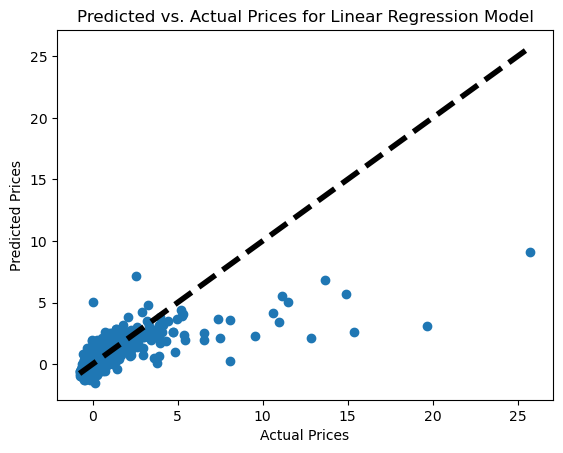

In [71]:
# Predicted vs Actual values
import matplotlib.pyplot as plt

plt.scatter(y_test_1, y_pred_lrm_1)
plt.title('Predicted vs. Actual Prices for Linear Regression Model')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'k--', lw=4)
plt.show()

#### 3.1.1.2. Cross-Validation Model

In [72]:
# Cross-validation
from sklearn.model_selection import cross_val_score

mse_lrm_cv_1 = cross_val_score(model_lrm_1, data_1.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                             data_1['PRICE'], scoring='neg_mean_squared_error', cv=5)
r2_lrm_cv_1 = cross_val_score(model_lrm_1, data_1.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                            data_1['PRICE'], scoring='r2', cv=5)
mae_lrm_cv_1 = cross_val_score(model_lrm_1, data_1.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                               data_1['PRICE'], scoring='neg_mean_absolute_error', cv=5)
rmse_lrm_cv_1 = np.sqrt(-mse_lrm_cv_1)

# Evaluate the Model
avg_rmse_lrm_cv_1 = rmse_lrm_cv_1.mean()
std_rmse_lrm_cv_1 = rmse_lrm_cv_1.std()
avg_r2_lrm_cv_1 = r2_lrm_cv_1.mean()
avg_mae_lrm_cv_1 = mae_lrm_cv_1.mean()


In [73]:
print(f"RMSE for Linear Regression Model (LRM) with Cross-Validation: {avg_rmse_lrm_cv_1}")
print(f"MAE for Linear Regression Model (LRM) with Cross-Validation: {avg_mae_lrm_cv_1}")
print(f"R2 Score for Linear Regression Model (LRM) with Cross-Validation: {avg_r2_lrm_cv_1}")
print(f"Standard deviation for Linear Regression Model (LRM): {std_rmse_lrm_cv_1}")

RMSE for Linear Regression Model (LRM) with Cross-Validation: 0.6480113849543399
MAE for Linear Regression Model (LRM) with Cross-Validation: -0.3140811124495782
R2 Score for Linear Regression Model (LRM) with Cross-Validation: 0.15957708080087551
Standard deviation for Linear Regression Model (LRM): 0.505260693317954


#### 3.1.1.3. Modification of Linear Regression into a Ridge Regression

In [74]:
scaler = StandardScaler()
x_train_scaled_1 = scaler.fit_transform(X_train_1)
x_test_scaled_1 = scaler.transform(X_test_1)

# Stating the model for Ridge Regression
ridge_model_1 = Ridge(alpha=1.0)

ridge_model_1.fit(x_train_scaled_1, y_train_1)
ridge_pred_1 = ridge_model_1.predict(x_test_scaled_1)

In [75]:
# Calculate metrics
test_mse_ridge_1 = mean_squared_error(y_test_1, ridge_pred_1)
test_rmse_ridge_1 = np.sqrt(test_mse_ridge_1)
test_mae_ridge_1 = mean_absolute_error(y_test_1, ridge_pred_1)
test_r2_ridge_1 = r2_score(y_test_1, ridge_pred_1)

print(f"Mean Squared Error: {test_mse_ridge_1}")
print(f"Root Mean Squared Error (RMSE): {test_rmse_ridge_1}")
print(f"Mean Absolute Error (MAE): {test_rmse_ridge_1}")
print(f"R² Score: {test_r2_ridge_1}")

Mean Squared Error: 0.42334367225246244
Root Mean Squared Error (RMSE): 0.6506486549993494
Mean Absolute Error (MAE): 0.6506486549993494
R² Score: 0.5282818132814728


#### 3.1.1.4. Cross-Validation Model (Ridge Regression)

In [76]:
# Cross-validation
from sklearn.model_selection import cross_val_score

mse_ridge_cv_1 = cross_val_score(ridge_model_1, data_1.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                             data_1['PRICE'], scoring='neg_mean_squared_error', cv=5)
r2_ridge_cv_1 = cross_val_score(ridge_model_1, data_1.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                            data_1['PRICE'], scoring='r2', cv=5)
mae_ridge_cv_1 = cross_val_score(ridge_model_1, data_1.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                               data_1['PRICE'], scoring='neg_mean_absolute_error', cv=5)
rmse_ridge_cv_1 = np.sqrt(-mse_ridge_cv_1)


# Evaluate the Model
avg_rmse_ridge_cv_1 = rmse_ridge_cv_1.mean()
std_rmse_ridge_cv_1 = rmse_ridge_cv_1.std()
avg_r2_ridge_cv_1 = r2_ridge_cv_1.mean()
avg_mae_ridge_cv_1 = mae_ridge_cv_1.mean()


In [77]:
print(f"RMSE for Linear Regression Model (LRM) with Cross-Validation: {avg_rmse_ridge_cv_1}")
print(f"R2 Score for Linear Regression Model (LRM) with Cross-Validation: {avg_r2_ridge_cv_1}")
print(f"R2 Score for Mean Absolute Error (MAE) with Cross-Validation: {avg_mae_ridge_cv_1}")
print(f"Standard deviation for Linear Regression Model (LRM): {std_rmse_ridge_cv_1}")

RMSE for Linear Regression Model (LRM) with Cross-Validation: 0.6479715388718272
R2 Score for Linear Regression Model (LRM) with Cross-Validation: 0.15979722968708854
R2 Score for Mean Absolute Error (MAE) with Cross-Validation: -0.31404156258566673
Standard deviation for Linear Regression Model (LRM): 0.5053118117200268


#### 3.1.1.5. Hyperparameter Tuning using GridSearch(Ridge Regression)

In [78]:
# Setup the hyperparameter grid
param_grid_1 = {'alpha': [0.1, 1, 10, 100, 1000]}  # alpha is the regularization strength

# Setup the GridSearchCV object
ridge_grid_search_1 = GridSearchCV(estimator=ridge_model_1, param_grid=param_grid_1, scoring='neg_mean_squared_error', cv=5, verbose=1)

# Train the model with grid search
ridge_grid_search_1.fit(X_train_1, y_train_1)

# Best model after grid search
ridge_best_model_1 = ridge_grid_search_1.best_estimator_

# Predict on the testing set using the best model
y_pred_ridge_best_1 = ridge_best_model_1.predict(X_test_1)



Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [79]:
# Evaluating Model
train_r2_ridge_grid_1 = ridge_best_model_1.score(X_train_1, y_train_1)
test_r2_ridge_grid_1 = r2_score(y_test_1, y_pred_ridge_best_1)
test_mse_ridge_grid_1 = mean_squared_error(y_test_1, y_pred_ridge_best_1)
test_rmse_ridge_grid_1 = test_mse_ridge_grid_1 ** 0.5
test_mae_ridge_grid_1 = mean_absolute_error(y_test_1, y_pred_ridge_best_1)

In [80]:
print("Best Alpha:", ridge_grid_search_1.best_params_)
print("Best RMSE:", test_rmse_ridge_grid_1)
print("Train R^2:", train_r2_ridge_grid_1)
print("Test R^2:", test_r2_ridge_grid_1)
print("Test MAE:", test_mae_ridge_grid_1)

Best Alpha: {'alpha': 100}
Best RMSE: 0.65048258938907
Train R^2: 0.469209837066375
Test R^2: 0.5285225766214168
Test MAE: 0.28719097151919776


#### 3.1.1.6. Linear Regression Model Comparison

In [81]:
# Displaying the comparison through a table

linear_comparison_1 = {
    'Model': ['Linear Regression', 'Linear Regression with CV', 'Ridge Regression', 'Ridge Regression with CV', 'Ridge Regression with GridSearch'],
    'Model Object': [model_lrm_1, model_lrm_1, ridge_model_1, ridge_model_1, ridge_best_model_1],
    'RMSE': [test_rmse_lrm_1, avg_rmse_lrm_cv_1, test_rmse_ridge_1, avg_rmse_ridge_cv_1, test_rmse_ridge_grid_1],
    'MAE': [test_mae_lrm_1, avg_mae_lrm_cv_1, test_mae_ridge_1, avg_mae_ridge_cv_1, test_mae_ridge_grid_1],
    'R-Squared Score': [test_r2_lrm_1, avg_r2_lrm_cv_1, test_r2_ridge_1, avg_r2_ridge_cv_1, test_r2_ridge_grid_1]
}

linreg_comparison_1 = pd.DataFrame(linear_comparison_1)

linreg_comparison_1.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
4,Ridge Regression with GridSearch,Ridge(alpha=100),0.650483,0.287191,0.528523
2,Ridge Regression,Ridge(),0.650649,0.291545,0.528282
0,Linear Regression,LinearRegression(),0.650652,0.291592,0.528276
3,Ridge Regression with CV,Ridge(),0.647972,-0.314042,0.159797
1,Linear Regression with CV,LinearRegression(),0.648011,-0.314081,0.159577


In [82]:
# # Sort the DataFrame by 'R-Squared Score' in descending order
# linreg_comparison_1 = linreg_comparison_1.sort_values('R-Squared Score', ascending=False)

# # Define a list of colors, one for each model
# colors_linreg_1 = ['navy', 'lightgreen', 'salmon', 'purple', 'orange']

# # Create a figure and a set of subplots
# fig_linreg_1, ax_linreg_1 = plt.subplots(figsize=(10, 6))

# # Plot R-Squared Score as bar graph with different colors
# rmse_bars_linreg_1 = linreg_comparison_1.plot(
#     kind='bar',
#     x='Model',
#     y='R-Squared Score',
#     color=colors_linreg_1,  # Apply different colors
#     ax=ax_linreg_1,
#     label='R-Squared Score',
#     width=0.75
# )

# # Setting titles and labels
# ax_linreg_1.set_ylabel('R-Squared Score', color='black')  # Updated label
# ax_linreg_1.set_title('Linear Regression Model Performance Comparison')

# # Rotate x-axis labels
# ax_linreg_1.set_xticklabels(ax_linreg_1.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# # Legend configuration
# lines_linreg_1, labels_linreg_1 = ax_linreg_1.get_legend_handles_labels()
# ax_linreg_1.legend(lines_linreg_1, labels_linreg_1)

# # Show the plot
# plt.show()

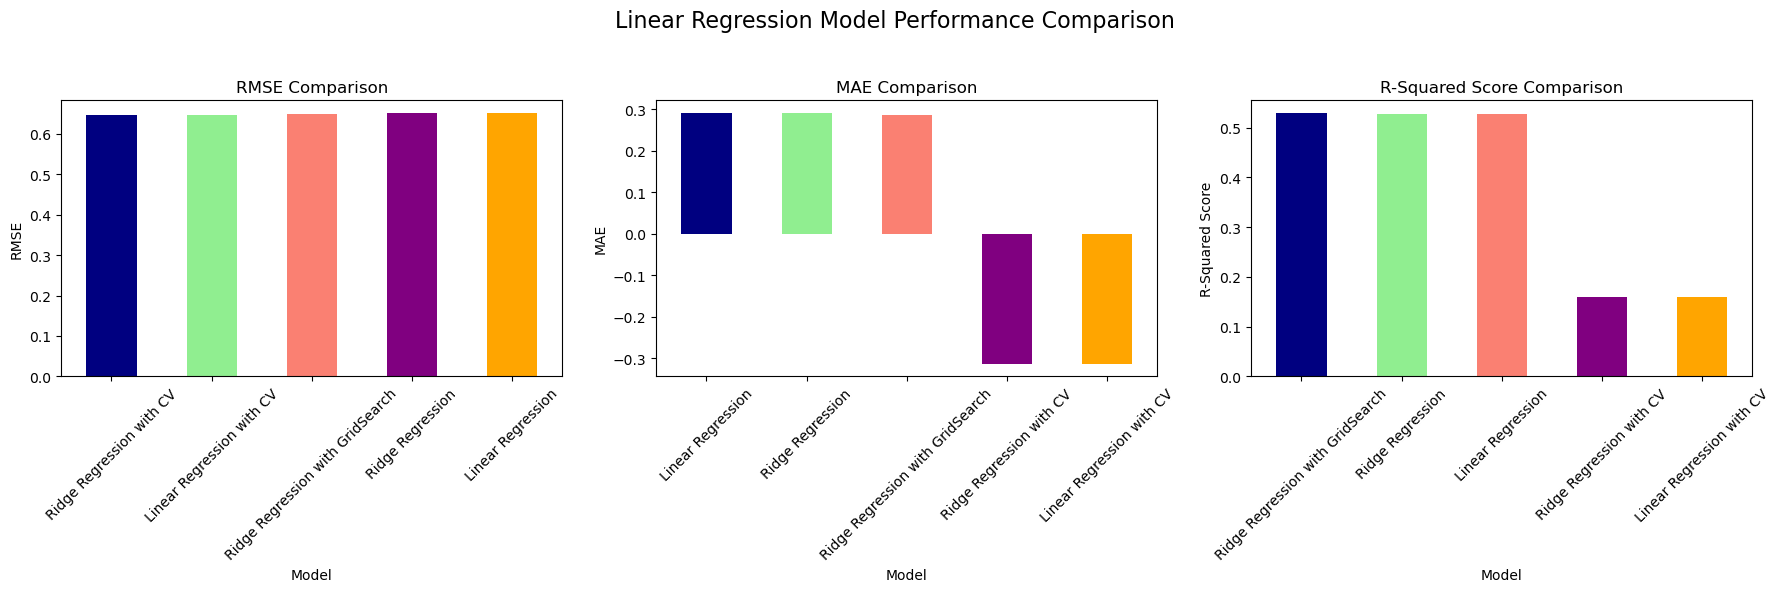

In [83]:
# Define a list of colors, one for each model
colors_linreg_1 = ['navy', 'lightgreen', 'salmon', 'purple', 'orange']

# Create a figure with 3 subplots, one for each score, laid out horizontally
fig_linreg_1, ax_linreg_1 = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the figure size as needed

# Plot RMSE
linreg_comparison_1.sort_values('RMSE', ascending=True).plot(
    kind='bar',
    x='Model',
    y='RMSE',
    ax=ax_linreg_1[0],
    color=colors_linreg_1,
    legend=False,
    title='RMSE Comparison'
)
ax_linreg_1[0].set_ylabel('RMSE')
ax_linreg_1[0].set_xticklabels(ax_linreg_1[0].get_xticklabels(), rotation=45)

# Plot MAE
linreg_comparison_1.sort_values('MAE', ascending=False).plot(
    kind='bar',
    x='Model',
    y='MAE',
    ax=ax_linreg_1[1],
    color=colors_linreg_1,
    legend=False,
    title='MAE Comparison'
)
ax_linreg_1[1].set_ylabel('MAE')
ax_linreg_1[1].set_xticklabels(ax_linreg_1[1].get_xticklabels(), rotation=45)

# Plot R-Squared Score
linreg_comparison_1.sort_values('R-Squared Score', ascending=False).plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    ax=ax_linreg_1[2],
    color=colors_linreg_1,
    legend=False,
    title='R-Squared Score Comparison'
)
ax_linreg_1[2].set_ylabel('R-Squared Score')
ax_linreg_1[2].set_xticklabels(ax_linreg_1[2].get_xticklabels(), rotation=45)

# Set overall plot title
fig_linreg_1.suptitle('Linear Regression Model Performance Comparison', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect parameters as needed for the title to fit

# Show the plot
plt.show()

#### 3.1.1.7. Choosing Best Model

In [84]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
sorted_linreg_model_1 = linreg_comparison_1.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_linreg_model_name_1 = sorted_linreg_model_1.iloc[0]['Model']
best_linreg_model_1 = sorted_linreg_model_1.iloc[0]['Model Object']
best_linreg_r2_score_1 = sorted_linreg_model_1.iloc[0]['R-Squared Score']
best_linreg_rmse_1 = sorted_linreg_model_1.iloc[0]['RMSE']
best_linreg_mae_1 = sorted_linreg_model_1.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_linreg_1 = best_linreg_model_name_1

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_linreg_1)
print("R-Squared Score is:", best_linreg_r2_score_1)
print("RMSE Score is:", best_linreg_rmse_1)
print("MAE Score is:", best_linreg_mae_1)

The best model based on R-Squared Score is: Ridge Regression with GridSearch
R-Squared Score is: 0.5285225766214168
RMSE Score is: 0.65048258938907
MAE Score is: 0.28719097151919776


### 3.1.2. XGBoost Model (XGB)

#### 3.1.2.1. Baseline Model

In [85]:
# Uploading XGBoost library
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the model
model_xgb_1 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10000, learning_rate=0.01, random_state=42)

# Train the model on the training data
model_xgb_1.fit(X_train_1, y_train_1)

# Predict on the testing set
y_pred_xgb_1 = model_xgb_1.predict(X_test_1)

# Evaluate Model
train_r2_xgb_1 = model_xgb_1.score(X_train_1, y_train_1)
test_r2_xgb1_1 = r2_score(y_test_1,y_pred_xgb_1)
test_rmse_xgb_1 = np.sqrt(mean_squared_error(y_test_1, y_pred_xgb_1))
test_mae_xgb_1 = mean_absolute_error(y_test_1, y_pred_xgb_1)  # Calculate MAE


In [86]:
# Printing the results of the XGBoost Model
print(f"R2 Score on Training set for XGBoost Model (LRM): {train_r2_xgb_1}")
print(f"R2 Score on Test set for XGBoost Model (LRM): {test_r2_xgb1_1}")
print(f"RMSE on Test set for XGBoost Model (LRM): {test_rmse_xgb_1}")
print(f"MAE on Test set for XGBoost Model (LRM): {test_mae_xgb_1}")


R2 Score on Training set for XGBoost Model (LRM): 0.9985616288194867
R2 Score on Test set for XGBoost Model (LRM): 0.6455343420860917
RMSE on Test set for XGBoost Model (LRM): 0.564017148806335
MAE on Test set for XGBoost Model (LRM): 0.1283527721779123


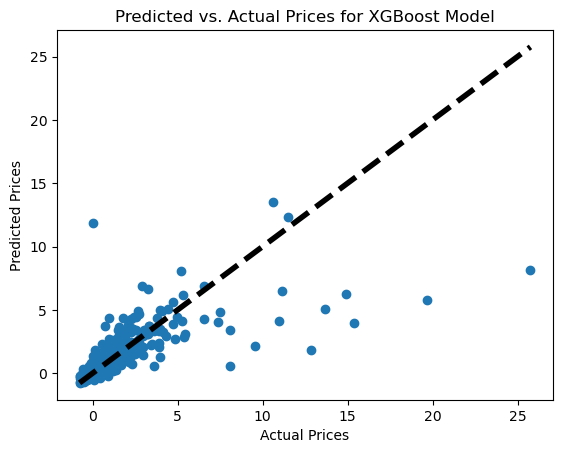

In [87]:
# Predicted vs Actual values
import matplotlib.pyplot as plt

plt.scatter(y_test_1, y_pred_xgb_1)
plt.title('Predicted vs. Actual Prices for XGBoost Model')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'k--', lw=4)
plt.show()


##### Cross-Validation

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import numpy as np
import xgboost as xgb

# Define the model
model_xgb_cv_1 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10000, learning_rate=0.01, random_state=42)

# Define a custom RMSE scorer
rmse_scorer_xgb_cv_1 = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Perform cross-validation using RMSE
train_rmse_xgb_cv_1 = cross_val_score(model_xgb_cv_1, X_train_1, y_train_1, cv=5, scoring=rmse_scorer_xgb_cv_1)

# Perform cross-validation using R^2
train_r2_xgb_cv_1 = cross_val_score(model_xgb_cv_1, X_train_1, y_train_1, cv=5, scoring='r2')


In [89]:
# Print cross-validation results
print("Training Cross-Validated RMSE scores:", -train_rmse_xgb_cv_1.mean())
print("Training Cross-Validated R^2 scores:", train_r2_xgb_cv_1.mean())


Training Cross-Validated RMSE scores: 0.5940472593095635
Training Cross-Validated R^2 scores: 0.5134338320035641


In [90]:
# Train the model on the entire training dataset for final evaluation
model_xgb_cv_1.fit(X_train_1, y_train_1)

# Predict on the testing set
y_pred_xgb_cv_1 = model_xgb_cv_1.predict(X_test_1)

# Evaluate the model on the testing set
test_mse_xgb_cv_1 = mean_squared_error(y_test_1, y_pred_xgb_cv_1)
test_rmse_xgb_cv_1 = np.sqrt(test_mse_xgb_cv_1)
test_r2_xgb_cv_1 = r2_score(y_test_1, y_pred_xgb_cv_1)


In [91]:
# Print the test evaluation results
print(f"Test MSE: {test_mse_xgb_cv_1}")
print(f"Test RMSE: {test_rmse_xgb_cv_1}")
print(f"Test R² Score: {test_r2_xgb_cv_1}")

Test MSE: 0.3181153441476275
Test RMSE: 0.564017148806335
Test R² Score: 0.6455343420860917


#### 3.1.2.2. GridSearch

In [92]:
# Variety of the XGBoost model

# Uploading library
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Define the parameter grid for the XGBoost Model with GridSearch
param_grid_xgbgs_1 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
}

# Setup GridSearchCV
xgbgs_reg_1 = XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search_xgbgs_1 = GridSearchCV(estimator=xgbgs_reg_1, param_grid=param_grid_xgbgs_1, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit GridSearchCV
grid_search_xgbgs_1.fit(X_train_1, y_train_1)

# Best hyperparameters and model
print("Best parameters:", grid_search_xgbgs_1.best_params_)
xgbgs_best_model_1 = grid_search_xgbgs_1.best_estimator_

# Predictions and evaluation on the training set
y_train_pred_xgbgs_1 = xgbgs_best_model_1.predict(X_train_1)
train_rmse_xgbgs_1 = np.sqrt(mean_squared_error(y_train_1, y_train_pred_xgbgs_1))
train_r2_xgbgs_1 = r2_score(y_train_1, y_train_pred_xgbgs_1)

# Predictions and evaluation on the test set
y_test_pred_xgbgs_1 = xgbgs_best_model_1.predict(X_test_1)
test_rmse_xgbgs_1 = np.sqrt(mean_squared_error(y_test_1, y_test_pred_xgbgs_1))
test_r2_xgbgs_1 = r2_score(y_test_1, y_test_pred_xgbgs_1)
test_mae_xgbgs_1 = mean_absolute_error(y_test_1, y_test_pred_xgbgs_1)  # Calculate MAE



Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END 

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=200,

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200,

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=100,

In [93]:
# Prediction Results for XGBoost Model with GridSearch
print(f"RMSE on Training set for XGBoost GridSearch Model: {train_rmse_xgbgs_1}")
print(f"R2 Score on Training set for XGBoost GridSearch Model: {train_r2_xgbgs_1}")
print(f"RMSE on Test set for XGBoost GridSearch Model: {test_rmse_xgbgs_1}")
print(f"RMSE on Test set for XGBoost GridSearch Model: {test_mae_xgbgs_1}")
print(f"R2 Score on Test set for XGBoost GridSearch Model: {test_r2_xgbgs_1}")

RMSE on Training set for XGBoost GridSearch Model: 0.20375355838603534
R2 Score on Training set for XGBoost GridSearch Model: 0.9602326547467142
RMSE on Test set for XGBoost GridSearch Model: 0.5608699357350191
RMSE on Test set for XGBoost GridSearch Model: 0.17249603211623876
R2 Score on Test set for XGBoost GridSearch Model: 0.649479138770334


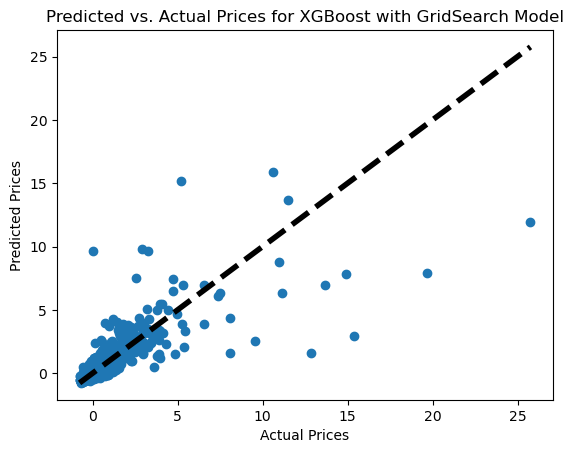

In [94]:
# Predicted vs Actual values
import matplotlib.pyplot as plt

plt.scatter(y_test_1, y_test_pred_xgbgs_1)
plt.title('Predicted vs. Actual Prices for XGBoost with GridSearch Model')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'k--', lw=4)
plt.show()


#### 3.1.2.3. RandomizedSearch

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np

# Define the parameter grid
param_grid_xgbrs_1 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 0.8],
    'subsample': [0.7, 0.8]
}

# Initialize the XGBRegressor
xgbrs_reg_1 = XGBRegressor(objective='reg:squarederror')

# Setup RandomizedSearchCV
random_search_xgbrs_1 = RandomizedSearchCV(xgbrs_reg_1, param_distributions=param_grid_xgbrs_1, n_iter=10,
                                   scoring='neg_mean_squared_error', cv=5, verbose=2, random_state=42)

random_search_xgbrs_1.fit(X_train_1, y_train_1)

# Best parameters and model
xgbrs_best_params_1 = random_search_xgbrs_1.best_params_
xgbrs_best_model_1 = random_search_xgbrs_1.best_estimator_

print(f"Best Parameters: {xgbrs_best_params_1}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END co

In [96]:
# Predictions on training set
y_train_pred_xgbrs_1 = xgbrs_best_model_1.predict(X_train_1)

# Predictions on test set
y_test_pred_xgbrs_1 = xgbrs_best_model_1.predict(X_test_1)

# Calculate MAE for training and test sets
train_mae_xgbrs_1 = mean_absolute_error(y_train_1, y_train_pred_xgbrs_1)
test_mae_xgbrs_1 = mean_absolute_error(y_test_1, y_test_pred_xgbrs_1)

# Calculate RMSE for training and test sets
train_rmse_xgbrs_1 = np.sqrt(mean_squared_error(y_train_1, y_train_pred_xgbrs_1))
test_rmse_xgbrs_1 = np.sqrt(mean_squared_error(y_test_1, y_test_pred_xgbrs_1))

# Calculate R-squared for training and test sets
train_r2_xgbrs_1 = r2_score(y_train_1, y_train_pred_xgbrs_1)
test_r2_xgbrs_1 = r2_score(y_test_1, y_test_pred_xgbrs_1)

print(f"Training RMSE: {train_rmse_xgbrs_1}, Test RMSE: {test_rmse_xgbrs_1}")
print(f"Training MAE: {train_mae_xgbrs_1}, Test MAE: {test_mae_xgbrs_1}")
print(f"Training R^2: {train_r2_xgbrs_1}, Test R^2: {test_r2_xgbrs_1}")

Training RMSE: 0.16777047432292347, Test RMSE: 0.56442899863859
Training MAE: 0.10431661115526127, Test MAE: 0.16498162946255568
Training R^2: 0.9730383007230974, Test R^2: 0.6450164857678562


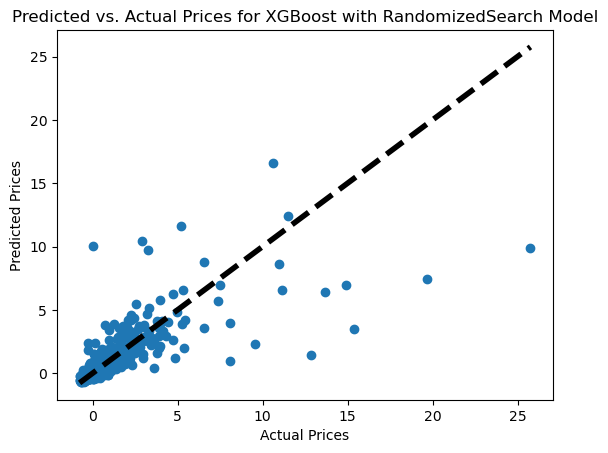

In [97]:
# Predicted vs Actual values
import matplotlib.pyplot as plt

plt.scatter(y_test_1, y_test_pred_xgbrs_1)
plt.title('Predicted vs. Actual Prices for XGBoost with RandomizedSearch Model')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'k--', lw=4)
plt.show()


#### 3.1.2.4. XGBoost Model Comparison

In [98]:
# Displaying the comparison through a table

xgb_comparison_1 = {
    'Model': ['XGBoost Baseline Model', 'XGBoost with GridSearch', 'XGBoost with RandomizedSearch'],
    'Model Object': [model_xgb_1, xgbgs_best_model_1, xgbrs_best_model_1],
    'RMSE': [test_rmse_xgb_cv_1, test_rmse_xgbgs_1, test_rmse_xgbrs_1],
    'MAE': [test_mae_xgb_1, test_mae_xgbgs_1, test_mae_xgbrs_1],
    'R-Squared Score': [test_r2_xgb_cv_1, test_r2_xgbgs_1, test_r2_xgbrs_1]
}

xgb_comparison_1 = pd.DataFrame(xgb_comparison_1)

xgb_comparison_1.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
1,XGBoost with GridSearch,"XGBRegressor(base_score=None, booster=None, ca...",0.560870,0.172496,0.649479
0,XGBoost Baseline Model,"XGBRegressor(base_score=None, booster=None, ca...",0.564017,0.128353,0.645534
2,XGBoost with RandomizedSearch,"XGBRegressor(base_score=None, booster=None, ca...",0.564429,0.164982,0.645016


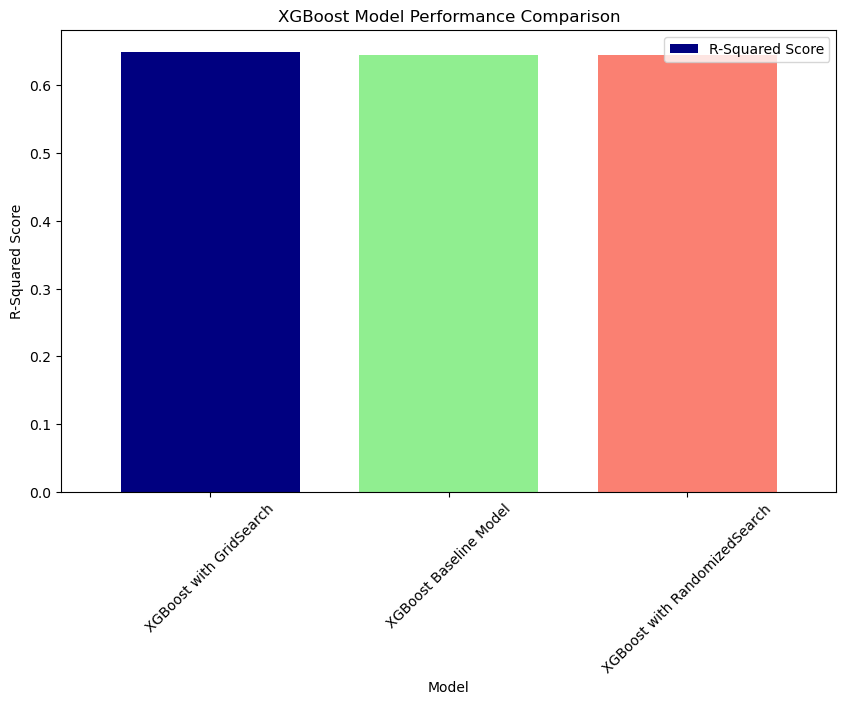

In [99]:
# Sort the DataFrame by 'R-Squared Score' in descending order
xgb_comparison_1 = xgb_comparison_1.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_xgb_1 = ['navy', 'lightgreen', 'salmon']

# Create a figure and a set of subplots
fig_xgb_1, ax_xgb_1 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
rmse_bars_xgb_1 = xgb_comparison_1.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_xgb_1,  # Apply different colors
    ax=ax_xgb_1,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_xgb_1.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_xgb_1.set_title('XGBoost Model Performance Comparison')

# Rotate x-axis labels
ax_xgb_1.set_xticklabels(ax_xgb_1.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_xgb_1, labels_xgb_1 = ax_xgb_1.get_legend_handles_labels()
ax_xgb_1.legend(lines_xgb_1, labels_xgb_1)

# Show the plot
plt.show()

#### 3.1.2.5. Choosing the Best XGBoost Model

In [100]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
xgb_comparison_1 = xgb_comparison_1.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_xgb_model_name_1 = xgb_comparison_1.iloc[0]['Model']
best_xgb_model_1 = xgb_comparison_1.iloc[0]['Model Object']
best_xgb_r2_score_1 = xgb_comparison_1.iloc[0]['R-Squared Score']
best_xgb_mae_1 = xgb_comparison_1.iloc[0]['MAE']
best_xgb_rmse_1 = xgb_comparison_1.iloc[0]['RMSE']

# Extract the model name with the highest R-Squared Score
best_xgb_1 = best_xgb_model_name_1

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_xgb_1)
print("R-Squared Score:", best_xgb_r2_score_1)
print("RMSE:", best_xgb_rmse_1)
print("MAE:", best_xgb_mae_1)

The best model based on R-Squared Score is: XGBoost with GridSearch
R-Squared Score: 0.649479138770334
RMSE: 0.5608699357350191
MAE: 0.17249603211623876


### 3.1.3. RandomForest Model (RF)

#### 3.1.3.1. Baseline Model

In [101]:
# Library needed for Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Initialize the Random Forest Regressor
rf_model_1 = RandomForestRegressor(n_estimators=150, random_state=32)  # You can adjust the number of trees with `n_estimators`

# Train the model
train_rf_pred_1 = rf_model_1.fit(X_train_1, y_train_1)

# Predict on the test set
test_rf_pred_1 = rf_model_1.predict(X_test_1)


In [102]:
# Calculate evaluation metrics
test_mse_rf_1 = mean_squared_error(y_test_1, test_rf_pred_1)
test_rmse_rf_1 = np.sqrt(test_mse_rf_1)
test_mae_rf_1 = mean_absolute_error(y_test_1, test_rf_pred_1)
test_r2_rf_1 = r2_score(y_test_1, test_rf_pred_1)

print(f"Mean Squared Error: {test_mse_rf_1}")
print(f"Root Mean Squared Error: {test_rmse_rf_1}")
print(f"Root Mean Squared Error: {test_mae_rf_1}")
print(f"R² Score: {test_r2_rf_1}")

Mean Squared Error: 0.26353832457179743
Root Mean Squared Error: 0.5133598392665689
Root Mean Squared Error: 0.13317143438308962
R² Score: 0.7063477530291021


#### 3.1.3.2. Cross-Validation Model

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import numpy as np

# Custom scorer for RMSE
def rmse_score_rfcv_1(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer_rfcv_1 = make_scorer(rmse_score_rfcv_1, greater_is_better=False)

# Cross-validate the model using RMSE
train_rmse_rf_cv_1 = cross_val_score(rf_model_1, X_train_1, y_train_1, cv=5, scoring=rmse_scorer_rfcv_1)

# Cross-validate the model using Mean Absolute Error
train_mae_rf_cv_1 = cross_val_score(rf_model_1, X_train_1, y_train_1, cv=5, scoring='neg_mean_absolute_error')

# Cross-validate the model using R^2
train_r2_rf_cv_1 = cross_val_score(rf_model_1, X_train_1, y_train_1, cv=5, scoring='r2')


In [104]:
# Print cross-validation results
print("CV RMSE scores:", -train_rmse_rf_cv_1)  # Negate RMSE scores because make_scorer(mse, greater_is_better=False) makes them negative
print("CV RMSE average score:", -np.mean(train_rmse_rf_cv_1))

print("CV R^2 scores:", -train_mae_rf_cv_1)
print("CV R^2 average score:", np.mean(train_mae_rf_cv_1))

print("CV R^2 scores:", train_r2_rf_cv_1)
print("CV R^2 average score:", np.mean(train_r2_rf_cv_1))

CV RMSE scores: [0.43088013 0.56845751 0.35997849 0.73994109 0.49339107]
CV RMSE average score: 0.5185296575350155
CV R^2 scores: [0.14076017 0.14165114 0.12408209 0.14694782 0.13356547]
CV R^2 average score: -0.13740134018102873
CV R^2 scores: [0.74366288 0.80751922 0.81428342 0.67627392 0.42790518]
CV R^2 average score: 0.6939289242454953


#### 3.1.3.3. Hyperparameter Tuning

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid
param_grid_rfgs_1 = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'bootstrap': [True, False]  # Method for sampling data points (with or without replacement)
}

# Initialize the RandomForestRegressor
rfgs_model_1 = RandomForestRegressor(random_state=32)

# Setup GridSearchCV
grid_search_rf_1 = GridSearchCV(estimator=rfgs_model_1, param_grid=param_grid_rfgs_1, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search_rf_1.fit(X_train_1, y_train_1)

# Get the best estimator
best_rfgs_model_1 = grid_search_rf_1.best_estimator_

# Predict on the test set with the best model
test_rfgs_pred_1 = best_rfgs_model_1.predict(X_test_1)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
691 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ahska\anaconda3\Lib\site-pack

In [106]:
# Calculate evaluation metrics
test_mse_rfgs_1 = mean_squared_error(y_test_1, test_rfgs_pred_1)
test_rmse_rfgs_1 = np.sqrt(test_mse_rfgs_1)
test_mae_rfgs_1 = mean_absolute_error(y_test_1, test_rfgs_pred_1)
test_r2_rfgs_1 = r2_score(y_test_1, test_rfgs_pred_1)

# Print the results
print("Best model parameters:", grid_search_rf_1.best_params_)
print(f"Test MSE: {test_mse_rfgs_1}")
print(f"Test RMSE: {test_rmse_rfgs_1}")
print(f"Test MAE: {test_mae_rfgs_1}")
print(f"Test R² Score: {test_r2_rfgs_1}")

Best model parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test MSE: 0.25200215215856886
Test RMSE: 0.501998159517113
Test MAE: 0.11130527462725663
Test R² Score: 0.7192021375141388


#### 3.1.3.4. RandomForest Model Comparison

In [107]:
# Displaying the comparison through a table

rf_comparison_1 = {
    'Model': ['Random Forest Baseline Model', 'Random Forest with GridSearch'],
    'Model Object': [rf_model_1, best_rfgs_model_1],
    'RMSE': [test_rmse_rf_1, test_rmse_rfgs_1],
    'MAE': [test_mae_rf_1, test_mae_rfgs_1],
    'R-Squared Score': [test_r2_rf_1, test_r2_rfgs_1]
}

rf_comparison_1 = pd.DataFrame(rf_comparison_1)

rf_comparison_1.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
1,Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",0.501998,0.111305,0.719202
0,Random Forest Baseline Model,"(DecisionTreeRegressor(max_features=1.0, rando...",0.513360,0.133171,0.706348


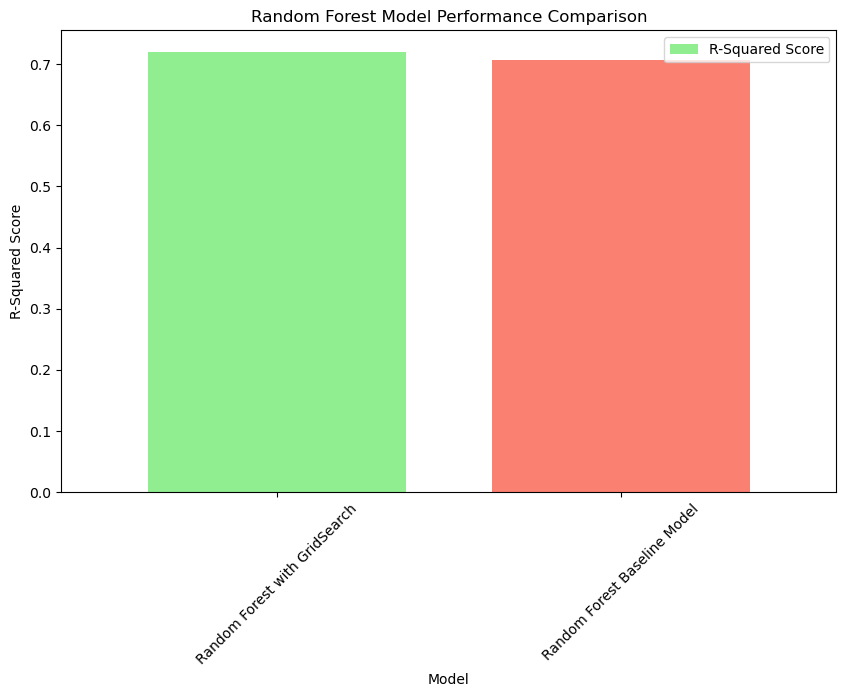

In [108]:
# Sort the DataFrame by 'R-Squared Score' in descending order
rf_comparison_1 = rf_comparison_1.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_rf_1 = ['lightgreen', 'salmon']

# Create a figure and a set of subplots
fig_rf_1, ax_rf_1 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_rf_1 = rf_comparison_1.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_rf_1,  # Apply different colors
    ax=ax_rf_1,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_rf_1.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_rf_1.set_title('Random Forest Model Performance Comparison')

# Rotate x-axis labels
ax_rf_1.set_xticklabels(ax_rf_1.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_rf_1, labels_rf_1 = ax_rf_1.get_legend_handles_labels()
ax_rf_1.legend(lines_rf_1, labels_rf_1)

# Show the plot
plt.show()

#### 3.1.3.5. Choosing the Best Model

In [109]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
rf_comparison_1 = rf_comparison_1.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_rf_model_name_1 = rf_comparison_1.iloc[0]['Model']
best_rf_model_1 = rf_comparison_1.iloc[0]['Model Object']
best_rf_r2_score_1 = rf_comparison_1.iloc[0]['R-Squared Score']
best_rf_rmse_1 = rf_comparison_1.iloc[0]['RMSE']
best_rf_mae_1 = rf_comparison_1.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_rf_1 = best_rf_model_name_1

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_rf_1)
print("The highest R-Squared Score is:", best_rf_r2_score_1)
print("The best RMSE is:", best_rf_rmse_1)
print("The best MAE is:", best_rf_mae_1)

The best model based on R-Squared Score is: Random Forest with GridSearch
The highest R-Squared Score is: 0.7192021375141388
The best RMSE is: 0.501998159517113
The best MAE is: 0.11130527462725663


### 3.1.4. Regression Model Comparison

In [110]:
# Displaying the comparison through a table

reg_comparison_1 = {
    'Model': [best_linreg_model_name_1, best_xgb_model_name_1, best_rf_model_name_1],
    'Model Object': [best_linreg_model_1, best_xgb_model_1, best_rf_model_1],
    'RMSE': [best_linreg_rmse_1, best_xgb_rmse_1, best_rf_rmse_1],
    'MAE': [best_linreg_mae_1, best_xgb_mae_1, best_rf_mae_1],
    'R-Squared Score': [best_linreg_r2_score_1, best_xgb_r2_score_1, best_rf_r2_score_1]
}

reg_comparison_1 = pd.DataFrame(reg_comparison_1)

reg_comparison_1.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
2,Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",0.501998,0.111305,0.719202
1,XGBoost with GridSearch,"XGBRegressor(base_score=None, booster=None, ca...",0.560870,0.172496,0.649479
0,Ridge Regression with GridSearch,Ridge(alpha=100),0.650483,0.287191,0.528523


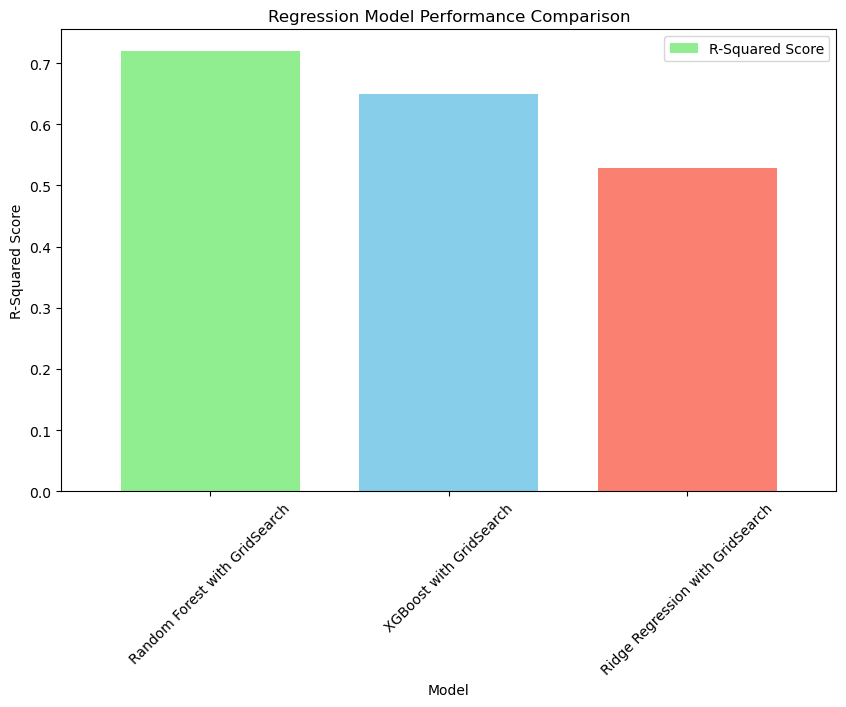

In [111]:
# Sort the DataFrame by 'R-Squared Score' in descending order
reg_comparison_1 = reg_comparison_1.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_reg_1 = ['lightgreen', 'skyblue', 'salmon']

# Create a figure and a set of subplots
fig_reg_1, ax_reg_1 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_reg_1 = reg_comparison_1.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_reg_1,  # Apply different colors
    ax=ax_reg_1,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_reg_1.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_reg_1.set_title('Regression Model Performance Comparison')

# Rotate x-axis labels
ax_reg_1.set_xticklabels(ax_reg_1.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_reg_1, labels_reg_1 = ax_reg_1.get_legend_handles_labels()
ax_reg_1.legend(lines_reg_1, labels_reg_1)

# Show the plot
plt.show()

### 3.1.5. Feature Importance from Best Regression Models

In [112]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
reg_comparison_1 = reg_comparison_1.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_reg_model_name_1 = reg_comparison_1.iloc[0]['Model']
best_reg_model_1 = reg_comparison_1.iloc[0]['Model Object']
best_reg_r2_score_1 = reg_comparison_1.iloc[0]['R-Squared Score']
best_reg_rmse_1 = reg_comparison_1.iloc[0]['RMSE']
best_reg_mae_1 = reg_comparison_1.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_reg_1 = best_reg_model_name_1

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_reg_1)
print("The highest R-Squared Score is:", best_reg_r2_score_1)
print("The best RMSE is:", best_reg_rmse_1)
print("The best MAE is:", best_reg_mae_1)

The best model based on R-Squared Score is: Random Forest with GridSearch
The highest R-Squared Score is: 0.7192021375141388
The best RMSE is: 0.501998159517113
The best MAE is: 0.11130527462725663


In [113]:
# We choose the model with the highest R-Squared

# Feature importance
best_reg_feature_importances_1 = best_reg_model_1.feature_importances_
best_reg_features_1 = pd.DataFrame({'Feature': X_train_1.columns, 'Importance': best_reg_feature_importances_1})
best_reg_features_1.sort_values(by='Importance', ascending=False, inplace=True)
print(best_reg_features_1)

                             Feature  Importance
2                        SQUARE FEET    0.365130
1                              BATHS    0.117876
5          bus_station_accessibility    0.112634
9      transit_station_accessibility    0.082706
11              school_accessibility    0.082604
0                               BEDS    0.059578
12                park_accessibility    0.054206
10           preschool_accessibility    0.051996
3                                AGE    0.044851
13            hospital_accessibility    0.018212
4              airport_accessibility    0.005150
7   light_rail_station_accessibility    0.004330
8        train_station_accessibility    0.000458
6       ferry_terminal_accessibility    0.000270


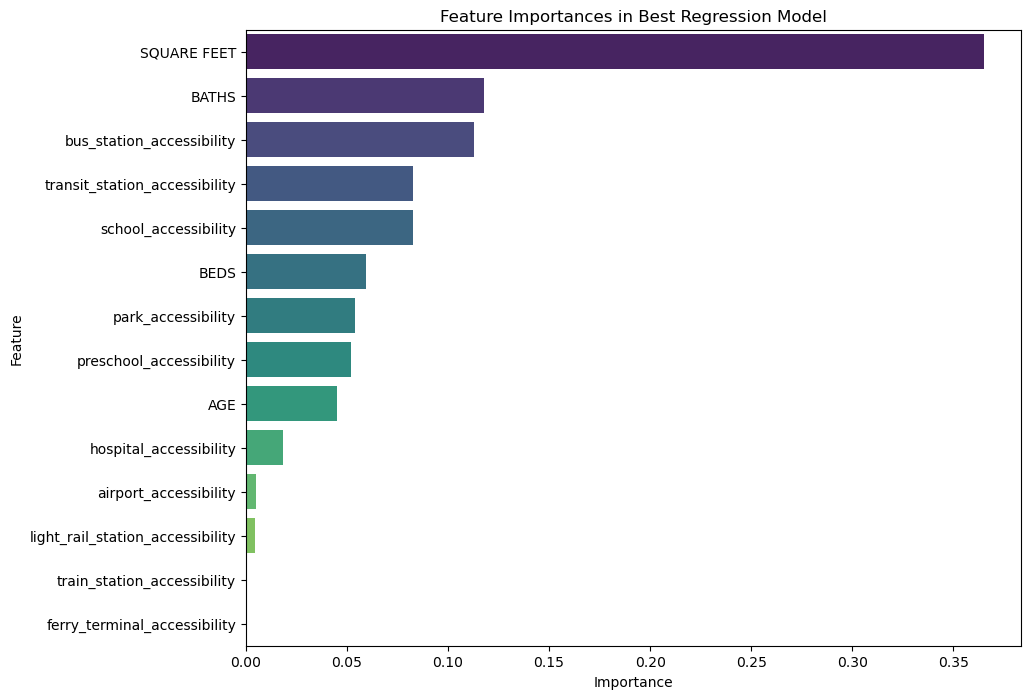

In [114]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=best_reg_features_1, palette='viridis')
plt.title('Feature Importances in Best Regression Model')
plt.show()

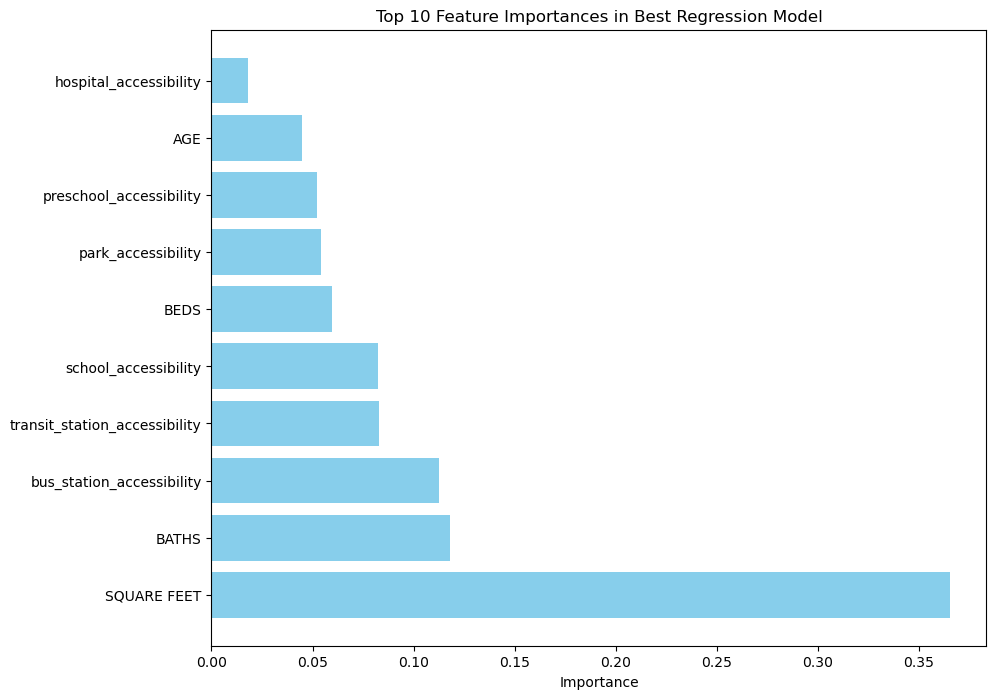

In [115]:
# Display only the top N features for clarity
top_n = 10
plt.figure(figsize=(10, 8))
plt.barh(best_reg_features_1['Feature'][:top_n], best_reg_features_1['Importance'][:top_n], color='skyblue')
plt.xlabel('Importance')
plt.title(f'Top {top_n} Feature Importances in Best Regression Model')
plt.show()


### 3.1.6. Neural Network Model

#### 3.1.6.1. All Features

In [116]:
# Library needed for Neural Network
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import tensorflow as tf
import random as python_random
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

In [117]:
np.random.seed(99)
python_random.seed(99)
tf.random.set_seed(99)

##### Baseline Model

In [118]:
# Initialize the neural network model
nn_model_1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_1.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),  # Additional smaller dense layer
    Dense(1)  # Output layer for regression
])


# Compile the model
nn_model_1.compile(optimizer=Adam(learning_rate=0.005), loss='mse')  # Using Mean Squared Error for regression

In [119]:
# Train the model
nn_history_1 = nn_model_1.fit(X_train_1, y_train_1, epochs=150, validation_split=0.1, batch_size=32)

Epoch 1/150

329/329 [==============================] - 4s 4ms/step - loss: 0.6461 - val_loss: 0.2578
Epoch 2/150
329/329 [==============================] - 1s 3ms/step - loss: 0.6343 - val_loss: 1.1055
Epoch 3/150
329/329 [==============================] - 1s 3ms/step - loss: 0.5113 - val_loss: 0.1412
Epoch 4/150
329/329 [==============================] - 1s 3ms/step - loss: 0.5481 - val_loss: 0.1407
Epoch 5/150
329/329 [==============================] - 1s 3ms/step - loss: 0.3976 - val_loss: 0.3834
Epoch 6/150
329/329 [==============================] - 2s 5ms/step - loss: 0.4351 - val_loss: 0.1615
Epoch 7/150
329/329 [==============================] - 1s 3ms/step - loss: 0.5664 - val_loss: 0.1939
Epoch 8/150
329/329 [==============================] - 1s 4ms/step - loss: 0.6056 - val_loss: 0.2252
Epoch 9/150
329/329 [==============================] - 1s 3ms/step - loss: 0.5047 - val_loss: 0.1967
Epoch 10/150
329/329 [==============================] - 1s 3ms/step - loss: 0.5796 - val_l

In [120]:
# Evaluate the model on the test set
test_loss_nn_1 = nn_model_1.evaluate(X_test_1, y_test_1)
print(f'Baseline Neural Network Test Loss: {test_loss_nn_1}')

# Optionally, predict and calculate R² Score
from sklearn.metrics import r2_score
test_pred_nn_1 = nn_model_1.predict(X_test_1)
test_mse_nn_1 = mean_squared_error(y_test_1, test_pred_nn_1)
test_rmse_nn_1 = np.sqrt(test_mse_nn_1)
print(f'RMSE Score: {test_rmse_nn_1}')
test_mae_nn_1 = mean_absolute_error(y_test_1, test_pred_nn_1)
print(f'MAE Score: {test_mae_nn_1}')
test_r2_nn_1 = r2_score(y_test_1, test_pred_nn_1.flatten())
print(f'R2 Score: {test_r2_nn_1}')

157/157 [==============================] - 1s 2ms/step - loss: 0.3737
Baseline Neural Network Test Loss: 0.37368980050086975
157/157 [==============================] - 1s 1ms/step
RMSE Score: 0.6113017859400426
MAE Score: 0.1991615719883852
R2 Score: 0.5836094382100512


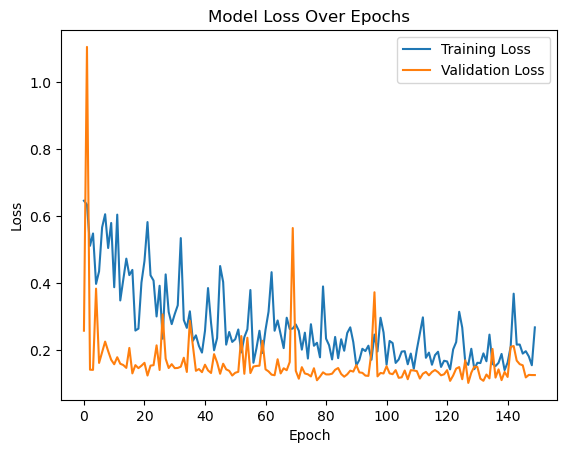

In [121]:
# Library needed to display Loss Function
import matplotlib.pyplot as plt

# Corrected access to the 'history' data stored in the History object
loss_nn_1 = nn_history_1.history['loss']
val_loss_nn_1 = nn_history_1.history['val_loss']

# Plot the loss and validation loss
plt.plot(loss_nn_1, label='Training Loss')
plt.plot(val_loss_nn_1, label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Baseline Neural Network with Early Stopping

In [122]:
# Making adjustment towards the Neural Network model to seek any improvements

# Library needed for Early Stopping of Neural Network Model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Adjusted model architecture
nn_early_model_1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_1.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

nn_early_model_1.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback
nn_early_stopping_1 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training with early stopping
nn_early_history_1 = nn_early_model_1.fit(X_train_1, y_train_1, validation_split=0.1, epochs=150, batch_size=32, callbacks=[nn_early_stopping_1], verbose=1)

# Evaluate the model
test_loss_nn_early_1 = nn_early_model_1.evaluate(X_test_1, y_test_1, verbose=0)



Epoch 1/150
329/329 [==============================] - 4s 4ms/step - loss: 0.6532 - val_loss: 0.2154
Epoch 2/150
329/329 [==============================] - 1s 3ms/step - loss: 0.5401 - val_loss: 0.1617
Epoch 3/150
329/329 [==============================] - 1s 4ms/step - loss: 0.4755 - val_loss: 0.1662
Epoch 4/150
329/329 [==============================] - 2s 7ms/step - loss: 0.5347 - val_loss: 0.1317
Epoch 5/150
329/329 [==============================] - 1s 3ms/step - loss: 0.4446 - val_loss: 0.1315
Epoch 6/150
329/329 [==============================] - 1s 3ms/step - loss: 0.4294 - val_loss: 0.1653
Epoch 7/150
329/329 [==============================] - 1s 3ms/step - loss: 0.3555 - val_loss: 0.1461
Epoch 8/150
329/329 [==============================] - 5s 14ms/step - loss: 0.3931 - val_loss: 0.1384
Epoch 9/150
329/329 [==============================] - 1s 3ms/step - loss: 0.3597 - val_loss: 0.1389
Epoch 10/150
329/329 [==============================] - 1s 4ms/step - loss: 0.4703 - val_

In [123]:
# Calculating the R2 for the Neural Network Model 2
test_pred_nn_early_1 = nn_early_model_1.predict(X_test_1)

test_mse_nn_early_1 = mean_squared_error(y_test_1, test_pred_nn_early_1)
test_rmse_nn_early_1 = np.sqrt(test_mse_nn_early_1)
print(f'RMSE Score: {test_rmse_nn_early_1}')
test_mae_nn_early_1 = mean_absolute_error(y_test_1, test_pred_nn_early_1)
print(f'RMSE Score: {test_mae_nn_early_1}')
test_r2_nn_early_1 = r2_score(y_test_1, test_pred_nn_early_1.flatten())  # use flatten() if your output has extra dimensions

print("Early Stopping Neural Network Model R2 Score:", test_r2_nn_early_1)

157/157 [==============================] - 0s 1ms/step
RMSE Score: 0.5453235116152761
RMSE Score: 0.21003338207286942
Early Stopping Neural Network Model R2 Score: 0.6686415934498752


##### Hyperparameter Tuning

In [124]:
from kerastuner import HyperModel
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

class NeuralNetworkHyperModel_1(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
        
    def build(self, hp):
        nnht_model_1 = Sequential()
        nnht_model_1.add(Dense(
            units=hp.Int('units_1', min_value=32, max_value=512, step=32),
            activation='relu', 
            input_shape=self.input_shape
        ))
        nnht_model_1.add(Dense(
            units=hp.Int('units_2', min_value=32, max_value=256, step=32),
            activation='relu'
        ))
        nnht_model_1.add(Dense(1))  # Output layer for regression
        
        nnht_model_1.compile(
            optimizer=Adam(
                learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
            ),
            loss='mse'
        )
        return nnht_model_1


C:\Users\ahska\AppData\Local\Temp\ipykernel_8996\1221919809.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


In [130]:
from kerastuner.tuners import RandomSearch

nnht_input_shape_1 = (X_train_1.shape[1],)
nnht_hypermodel_1 = NeuralNetworkHyperModel_1(input_shape=nnht_input_shape_1)

nnht_tuner_1 = RandomSearch(
    nnht_hypermodel_1,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='nnht_1c',
    project_name='nn_hypertuning_keras_1c'
)

nnht_tuner_1.search(X_train_1, y_train_1, epochs=50, validation_split=0.1)


Trial 20 Complete [00h 02m 08s]
val_loss: 0.10433777794241905

Best val_loss So Far: 0.10433777794241905
Total elapsed time: 00h 43m 03s


In [131]:
nnht_best_model_1 = nnht_tuner_1.get_best_models(num_models=1)[0]

# Evaluate the best model
test_loss_nnht_1 = nnht_best_model_1.evaluate(X_test_1, y_test_1)
print(f'Best Neural Network Test Loss: {test_loss_nnht_1}')

# Predict and calculate R² Score
test_pred_nnht_1 = nnht_best_model_1.predict(X_test_1)
test_rmse_nnht_1 = np.sqrt(mean_squared_error(y_test_1, test_pred_nnht_1))
test_mae_nnht_1 = mean_absolute_error(y_test_1, test_pred_nnht_1)
test_r2_nnht_1 = r2_score(y_test_1, test_pred_nnht_1.flatten())

print(f'RMSE: {test_rmse_nnht_1}')
print(f'MAE: {test_mae_nnht_1}')
print(f'R2 Score: {test_r2_nnht_1}')


157/157 [==============================] - 1s 3ms/step - loss: 0.2660
Best Neural Network Test Loss: 0.2660333514213562
157/157 [==============================] - 0s 2ms/step
RMSE: 0.5157842536484135
MAE: 0.16810743769642303
R2 Score: 0.7035675751405462


##### Hyper Model Neural Network with Early Stopping

In [132]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
nnht_early_stopping_1 = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the lowest validation loss
)

In [133]:
# Setup your tuner
nnht_early_tuner_1 = RandomSearch(
    nnht_hypermodel_1,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='nnht_early_1c',
    project_name='nn_hypertuning_earlystopping_keras_1c'
)

In [134]:
# Start the search and include early stopping
nnht_early_tuner_1.search(
    X_train_1, 
    y_train_1, 
    epochs=100, 
    validation_split=0.1, 
    callbacks=[nnht_early_stopping_1]
)

Trial 20 Complete [00h 00m 45s]
val_loss: 0.11050425842404366

Best val_loss So Far: 0.11050425842404366
Total elapsed time: 00h 11m 36s


In [135]:
# Retrieve and evaluate the best model
nnht_early_best_model_1 = nnht_early_tuner_1.get_best_models(num_models=1)[0]
test_loss_nnht_early_1 = nnht_early_best_model_1.evaluate(X_test_1, y_test_1)
test_pred_nnht_early_1 = nnht_early_best_model_1.predict(X_test_1)
test_rmse_nnht_early_1 = np.sqrt(mean_squared_error(y_test_1, test_pred_nnht_early_1))
test_mae_nnht_early_1 = mean_absolute_error(y_test_1, test_pred_nnht_early_1)
test_r2_nnht_early_1 = r2_score(y_test_1, test_pred_nnht_early_1.flatten())

# Print performance metrics
print(f'Best Neural Network Test Loss: {test_loss_nnht_early_1}')
print(f'RMSE: {test_rmse_nnht_early_1}')
print(f'MAE: {test_mae_nnht_early_1}')
print(f'R2 Score: {test_r2_nnht_early_1}')

157/157 [==============================] - 0s 1ms/step
Best Neural Network Test Loss: 0.2894170582294464
RMSE: 0.537974984477894
MAE: 0.17381933249461856
R2 Score: 0.6775118869555883


##### Comparison

In [136]:
# Displaying the comparison through a table

nn_comparison_1 = {
    'Model': ['Neural Network Baseline Model', 'Neural Network Baseline Model with Early Stopping', 'Neural Network Hyper Model', 'Neural Network Hyper Model with Early Stopping'],
    'Model Object': [nn_model_1, nn_early_model_1, nnht_best_model_1, nnht_early_best_model_1],
    'RMSE': [test_rmse_nn_1, test_rmse_nn_early_1, test_rmse_nnht_1, test_rmse_nnht_early_1],
    'MAE': [test_mae_nn_1, test_mae_nn_early_1, test_mae_nnht_1, test_mae_nnht_early_1],
    'R-Squared Score': [test_r2_nn_1, test_r2_nn_early_1, test_r2_nnht_1, test_r2_nnht_early_1]
}

nn_comparison_1 = pd.DataFrame(nn_comparison_1)

nn_comparison_1.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
2,Neural Network Hyper Model,<keras.src.engine.sequential.Sequential object...,0.515784,0.168107,0.703568
3,Neural Network Hyper Model with Early Stopping,<keras.src.engine.sequential.Sequential object...,0.537975,0.173819,0.677512
1,Neural Network Baseline Model with Early Stopping,<keras.src.engine.sequential.Sequential object...,0.545324,0.210033,0.668642
0,Neural Network Baseline Model,<keras.src.engine.sequential.Sequential object...,0.611302,0.199162,0.583609


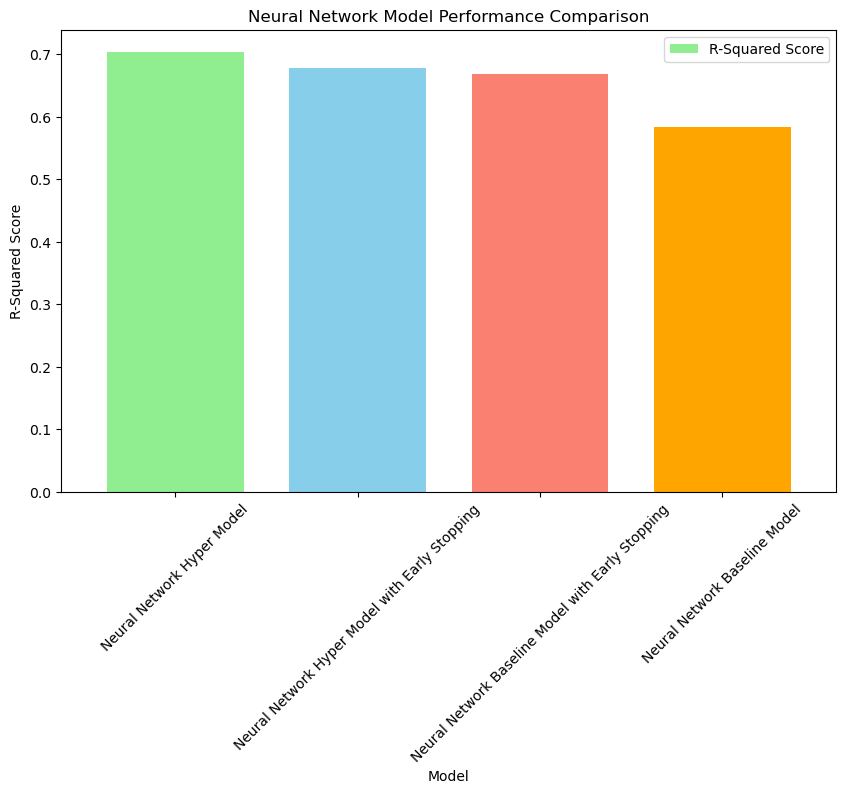

In [137]:
# Sort the DataFrame by 'R-Squared Score' in descending order
nn_comparison_1 = nn_comparison_1.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_nn_1 = ['lightgreen', 'skyblue', 'salmon', 'orange']

# Create a figure and a set of subplots
fig_nn_1, ax_nn_1 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_nn_1 = nn_comparison_1.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_nn_1,  # Apply different colors
    ax=ax_nn_1,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_nn_1.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_nn_1.set_title('Neural Network Model Performance Comparison')

# Rotate x-axis labels
ax_nn_1.set_xticklabels(ax_nn_1.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_nn_1, labels_nn_1 = ax_nn_1.get_legend_handles_labels()
ax_nn_1.legend(lines_nn_1, labels_nn_1)

# Show the plot
plt.show()

In [138]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
nn_comparison_1 = nn_comparison_1.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_nn_model_name_1 = nn_comparison_1.iloc[0]['Model']
best_nn_model_1 = nn_comparison_1.iloc[0]['Model Object']
best_nn_r2_score_1 = nn_comparison_1.iloc[0]['R-Squared Score']
best_nn_rmse_1 = nn_comparison_1.iloc[0]['RMSE']
best_nn_mae_1 = nn_comparison_1.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_nn_1 = best_nn_model_name_1

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_nn_1)
print("The highest R-Squared Score is:", best_nn_r2_score_1)
print("The best RMSE is:", best_nn_rmse_1)
print("The best MAE is:", best_nn_mae_1)

The best model based on R-Squared Score is: Neural Network Hyper Model
The highest R-Squared Score is: 0.7035675751405462
The best RMSE is: 0.5157842536484135
The best MAE is: 0.16810743769642303


#### 3.1.6.2. Important Features

##### Features Filtering

In [139]:
# Select features above the mean importance
best_reg_mean_importance_1 = best_reg_features_1['Importance'].mean()
best_reg_selected_features_1 = best_reg_features_1[best_reg_features_1['Importance'] > best_reg_mean_importance_1]['Feature'].values


In [140]:
# Print selected_features
best_reg_selected_features_1

array(['SQUARE FEET', 'BATHS', 'bus_station_accessibility',
       'transit_station_accessibility', 'school_accessibility'],
      dtype=object)

In [141]:
# Reduce train and test sets to selected features
X_train_selected_1 = X_train_1[best_reg_selected_features_1]
X_test_selected_1 = X_test_1[best_reg_selected_features_1]

##### Expanded Features Filtering

In [142]:
# Filter out 'SQUARE FEET' from the DataFrame
best_reg_filtered_features_1 = best_reg_features_1[best_reg_features_1['Feature'] != 'SQUARE FEET']

# Calculate the average importance of the remaining features
best_reg_filtered_mean_importance_1 = best_reg_filtered_features_1['Importance'].mean()

# Select features above the mean importance
best_reg_filtered_selected_features_1 = best_reg_filtered_features_1[best_reg_filtered_features_1['Importance'] > best_reg_filtered_mean_importance_1]['Feature'].values


In [143]:
# Assuming best_reg_filtered_selected_features_1 is a numpy array
best_reg_filtered_selected_features_1 = np.append(best_reg_filtered_selected_features_1, "SQUARE FEET")

# Print the updated list of selected features
print(best_reg_filtered_selected_features_1)

['BATHS' 'bus_station_accessibility' 'transit_station_accessibility'
 'school_accessibility' 'BEDS' 'park_accessibility'
 'preschool_accessibility' 'SQUARE FEET']


In [144]:
# Reduce train and test sets to selected features
X_train_filtered_selected_1 = X_train_1[best_reg_filtered_selected_features_1]
X_test_filtered_selected_1 = X_test_1[best_reg_filtered_selected_features_1]

##### Baseline Model

In [145]:
# Initialize the neural network model
nn_filter_model_1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_filtered_selected_1.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),  # Additional smaller dense layer
    Dense(1)  # Output layer for regression
])

# Compile the model
nn_filter_model_1.compile(optimizer=Adam(learning_rate=0.001), loss='mse')  # Using Mean Squared Error for regression


In [146]:
# Train the model
nn_filter_history_1 = nn_filter_model_1.fit(X_train_filtered_selected_1, y_train_1, epochs=100, validation_split=0.1, batch_size=32)


Epoch 1/100
329/329 [==============================] - 2s 2ms/step - loss: 0.5630 - val_loss: 0.3180
Epoch 2/100
329/329 [==============================] - 1s 2ms/step - loss: 0.4987 - val_loss: 0.2059
Epoch 3/100
329/329 [==============================] - 1s 2ms/step - loss: 0.3962 - val_loss: 0.1500
Epoch 4/100
329/329 [==============================] - 1s 2ms/step - loss: 0.4582 - val_loss: 0.1489
Epoch 5/100
329/329 [==============================] - 1s 2ms/step - loss: 0.2853 - val_loss: 0.1493
Epoch 6/100
329/329 [==============================] - 1s 2ms/step - loss: 0.2902 - val_loss: 0.1511
Epoch 7/100
329/329 [==============================] - 1s 2ms/step - loss: 0.2517 - val_loss: 0.1648
Epoch 8/100
329/329 [==============================] - 1s 2ms/step - loss: 0.3431 - val_loss: 0.1575
Epoch 9/100
329/329 [==============================] - 1s 2ms/step - loss: 0.2776 - val_loss: 0.1435
Epoch 10/100
329/329 [==============================] - 1s 2ms/step - loss: 0.2552 - val_lo

In [147]:
# Evaluate the model on the test set
test_loss_nn_filter_1 = nn_filter_model_1.evaluate(X_test_filtered_selected_1, y_test_1)
print(f'Baseline Neural Network (Selected Features) Test Loss: {test_loss_nn_filter_1}')

# Optionally, predict and calculate R² Score
from sklearn.metrics import r2_score
test_pred_nn_filter_1 = nn_filter_model_1.predict(X_test_filtered_selected_1)
test_mse_nn_filter_1 = mean_squared_error(y_test_1, test_pred_nn_filter_1)
test_rmse_nn_filter_1 = np.sqrt(test_mse_nn_filter_1)
print(f'RMSE Score: {test_rmse_nn_filter_1}')
test_mae_nn_filter_1 = mean_absolute_error(y_test_1, test_pred_nn_filter_1)
print(f'MAE Score: {test_mae_nn_filter_1}')
test_r2_nn_filter_1 = r2_score(y_test_1, test_pred_nn_filter_1.flatten())
print(f'R2 Score: {test_r2_nn_filter_1}')

157/157 [==============================] - 0s 2ms/step - loss: 0.3203
Baseline Neural Network (Selected Features) Test Loss: 0.32027003169059753
157/157 [==============================] - 0s 2ms/step
RMSE Score: 0.5659240009466557
MAE Score: 0.18157373374134017
R2 Score: 0.6431335066575847


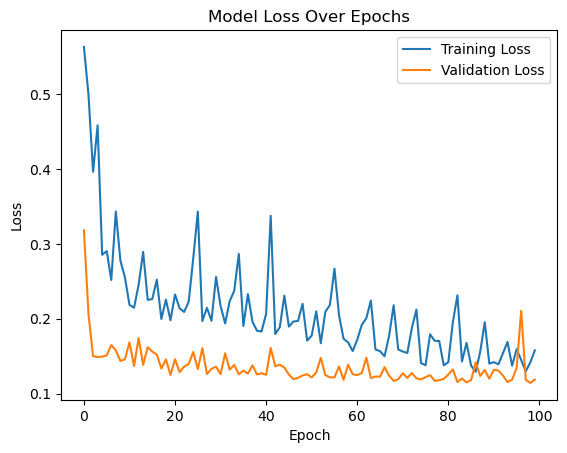

In [148]:
# Library needed to display Loss Function
import matplotlib.pyplot as plt

# Corrected access to the 'history' data stored in the History object
loss_nn_filter_1 = nn_filter_history_1.history['loss']
val_loss_nn_filter_1 = nn_filter_history_1.history['val_loss']

# Plot the loss and validation loss
plt.plot(loss_nn_filter_1, label='Training Loss')
plt.plot(val_loss_nn_filter_1, label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Neural Network Baseline Model with Early Stopping

In [149]:
# Making adjustment towards the Neural Network model to seek any improvements

# Library needed for Early Stopping of Neural Network Model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Setting random seeds to reduce the chance of variability in results
np.random.seed(123)
python_random.seed(123)
tf.random.set_seed(1234)

# Adjusted model architecture
nn_filter_early_model_1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_filtered_selected_1.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

nn_filter_early_model_1.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Early stopping callback
nn_filter_early_stopping_1 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training with early stopping
nn_filter_early_history_1 = nn_filter_early_model_1.fit(X_train_filtered_selected_1, y_train_1, validation_split=0.1, epochs=100, batch_size=32, callbacks=[nn_filter_early_stopping_1], verbose=1)

# Evaluate the model
test_loss_nn_filter_early_1 = nn_filter_early_model_1.evaluate(X_test_filtered_selected_1, y_test_1, verbose=0)


Epoch 1/100
329/329 [==============================] - 3s 5ms/step - loss: 0.8364 - val_loss: 0.2071
Epoch 2/100
329/329 [==============================] - 1s 3ms/step - loss: 0.7140 - val_loss: 0.1994
Epoch 3/100
329/329 [==============================] - 1s 3ms/step - loss: 0.6491 - val_loss: 0.2040
Epoch 4/100
329/329 [==============================] - 1s 3ms/step - loss: 0.6376 - val_loss: 0.2207
Epoch 5/100
329/329 [==============================] - 1s 3ms/step - loss: 0.5916 - val_loss: 0.2249
Epoch 6/100
329/329 [==============================] - 1s 3ms/step - loss: 0.5613 - val_loss: 0.2069
Epoch 7/100
329/329 [==============================] - 1s 3ms/step - loss: 0.5534 - val_loss: 0.2110
Epoch 8/100
329/329 [==============================] - 1s 3ms/step - loss: 0.5335 - val_loss: 0.2146
Epoch 9/100
329/329 [==============================] - 1s 3ms/step - loss: 0.5204 - val_loss: 0.2143
Epoch 10/100
329/329 [==============================] - 1s 3ms/step - loss: 0.5073 - val_lo

In [150]:
# Calculating the R2 for the Neural Network Model 2
test_pred_nn_filter_early_1 = nn_filter_early_model_1.predict(X_test_filtered_selected_1)

test_mse_nn_filter_early_1 = mean_squared_error(y_test_1, test_pred_nn_filter_early_1)
test_rmse_nn_filter_early_1 = np.sqrt(test_mse_nn_filter_early_1)
print(f'RMSE Score: {test_rmse_nn_filter_early_1}')
test_mae_nn_filter_early_1 = mean_absolute_error(y_test_1, test_pred_nn_filter_early_1)
print(f'RMSE Score: {test_mae_nn_filter_early_1}')
test_r2_nn_filter_early_1 = r2_score(y_test_1, test_pred_nn_filter_early_1.flatten())  # use flatten() if your output has extra dimensions

print("Early Stopping Neural Network Model R2 Score:", test_r2_nn_filter_early_1)

157/157 [==============================] - 0s 2ms/step
RMSE Score: 0.5301577643085004
RMSE Score: 0.20497260195629388
Early Stopping Neural Network Model R2 Score: 0.6868158316957671


##### Hyperparameter Tuning

In [151]:
from kerastuner import HyperModel
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

class NeuralNetworkHyperModel_filter_1(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
        
    def build(self, hp):
        nnht_filter_model_1 = Sequential()
        nnht_filter_model_1.add(Dense(
            units=hp.Int('units_1', min_value=32, max_value=512, step=32),
            activation='relu', 
            input_shape=self.input_shape
        ))
        nnht_filter_model_1.add(Dense(
            units=hp.Int('units_2', min_value=32, max_value=256, step=32),
            activation='relu'
        ))
        nnht_filter_model_1.add(Dense(1))  # Output layer for regression
        
        nnht_filter_model_1.compile(
            optimizer=Adam(
                learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
            ),
            loss='mse'
        )
        return nnht_filter_model_1


In [152]:
# Check the shape of your input data
print("Shape of X_train_1:", X_train_1.shape)


Shape of X_train_1: (11664, 14)


In [153]:
from kerastuner.tuners import RandomSearch

nnht_filter_input_shape_1 = (X_train_filtered_selected_1.shape[1],)
nnht_filter_hypermodel_1 = NeuralNetworkHyperModel_filter_1(input_shape=nnht_filter_input_shape_1)

nnht_filter_tuner_1 = RandomSearch(
    nnht_filter_hypermodel_1,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='nnht_filter_1c',
    project_name='nn_filter_hypertuning_keras_1c'
)

nnht_filter_tuner_1.search(X_train_filtered_selected_1, y_train_1, epochs=100, validation_split=0.1)


Trial 20 Complete [00h 02m 02s]
val_loss: 0.1078432947397232

Best val_loss So Far: 0.10355587676167488
Total elapsed time: 00h 59m 11s


In [154]:
nnht_filter_best_model_1 = nnht_filter_tuner_1.get_best_models(num_models=1)[0]

# Evaluate the best model
test_loss_nnht_filter_1 = nnht_filter_best_model_1.evaluate(X_test_filtered_selected_1, y_test_1)
print(f'Best Neural Network Test Loss: {test_loss_nnht_1}')

# Predict and calculate R² Score
test_pred_nnht_filter_1 = nnht_filter_best_model_1.predict(X_test_filtered_selected_1)
test_rmse_nnht_filter_1 = np.sqrt(mean_squared_error(y_test_1, test_pred_nnht_filter_1))
test_mae_nnht_filter_1 = mean_absolute_error(y_test_1, test_pred_nnht_filter_1)
test_r2_nnht_filter_1 = r2_score(y_test_1, test_pred_nnht_filter_1.flatten())

print(f'RMSE: {test_rmse_nnht_filter_1}')
print(f'MAE: {test_mae_nnht_filter_1}')
print(f'R2 Score: {test_r2_nnht_filter_1}')


157/157 [==============================] - 0s 1ms/step - loss: 0.3318
Best Neural Network Test Loss: 0.2660333514213562
157/157 [==============================] - 0s 1ms/step
RMSE: 0.5759818406469146
MAE: 0.17823096153570733
R2 Score: 0.6303360239312032


##### Hyper Model with Early Stopping 

In [155]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
nnht_filter_early_stopping_1 = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the lowest validation loss
)

In [156]:
# Setup your tuner
nnht_filter_early_tuner_1 = RandomSearch(
    nnht_filter_hypermodel_1,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='nnht_filter_early_1c',
    project_name='nn_filter_hypertuning_earlystopping_keras_1c'
)

In [157]:
# Start the search and include early stopping
nnht_filter_early_tuner_1.search(
    X_train_filtered_selected_1, 
    y_train_1, 
    epochs=100, 
    validation_split=0.1, 
    callbacks=[nnht_filter_early_stopping_1]
)

Trial 20 Complete [00h 00m 46s]
val_loss: 0.127106461673975

Best val_loss So Far: 0.11403611302375793
Total elapsed time: 00h 15m 42s


In [158]:
# Retrieve and evaluate the best model
nnht_filter_early_best_model_1 = nnht_filter_early_tuner_1.get_best_models(num_models=1)[0]
test_loss_nnht_filter_early_1 = nnht_filter_early_best_model_1.evaluate(X_test_filtered_selected_1, y_test_1)
test_pred_nnht_filter_early_1 = nnht_filter_early_best_model_1.predict(X_test_filtered_selected_1)
test_rmse_nnht_filter_early_1 = np.sqrt(mean_squared_error(y_test_1, test_pred_nnht_filter_early_1))
test_mae_nnht_filter_early_1 = mean_absolute_error(y_test_1, test_pred_nnht_filter_early_1)
test_r2_nnht_filter_early_1 = r2_score(y_test_1, test_pred_nnht_filter_early_1.flatten())

# Print performance metrics
print(f'Best Neural Network Test Loss: {test_loss_nnht_filter_early_1}')
print(f'RMSE: {test_rmse_nnht_filter_early_1}')
print(f'MAE: {test_mae_nnht_filter_early_1}')
print(f'R2 Score: {test_r2_nnht_filter_early_1}')

157/157 [==============================] - 0s 2ms/step
Best Neural Network Test Loss: 0.31467849016189575
RMSE: 0.5609621586673526
MAE: 0.17956516535580314
R2 Score: 0.6493638581419111


##### Comparison

In [159]:
# Displaying the comparison through a table

nn_filter_comparison_1 = {
    'Model': ['Neural Network (Filtered Features) Baseline Model', 'Neural Network (Filtered Features) Baseline Model with Early Stopping', 'Neural Network (Filtered Features) Hyper Model', 'Neural Network (Filtered Features) Hyper Model with Early Stopping'],
    'Model Object': [nn_filter_model_1, nn_filter_early_model_1, nnht_filter_best_model_1, nnht_filter_early_best_model_1],
    'RMSE': [test_rmse_nn_filter_1, test_rmse_nn_filter_early_1, test_rmse_nnht_filter_1, test_rmse_nnht_filter_early_1],
    'MAE': [test_mae_nn_filter_1, test_mae_nn_filter_early_1, test_mae_nnht_filter_1, test_mae_nnht_filter_early_1],
    'R-Squared Score': [test_r2_nn_filter_1, test_r2_nn_filter_early_1, test_r2_nnht_filter_1, test_r2_nnht_filter_early_1]
}

nn_filter_comparison_1 = pd.DataFrame(nn_filter_comparison_1)

nn_filter_comparison_1.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
1,Neural Network (Filtered Features) Baseline Mo...,<keras.src.engine.sequential.Sequential object...,0.530158,0.204973,0.686816
3,Neural Network (Filtered Features) Hyper Model...,<keras.src.engine.sequential.Sequential object...,0.560962,0.179565,0.649364
0,Neural Network (Filtered Features) Baseline Model,<keras.src.engine.sequential.Sequential object...,0.565924,0.181574,0.643134
2,Neural Network (Filtered Features) Hyper Model,<keras.src.engine.sequential.Sequential object...,0.575982,0.178231,0.630336


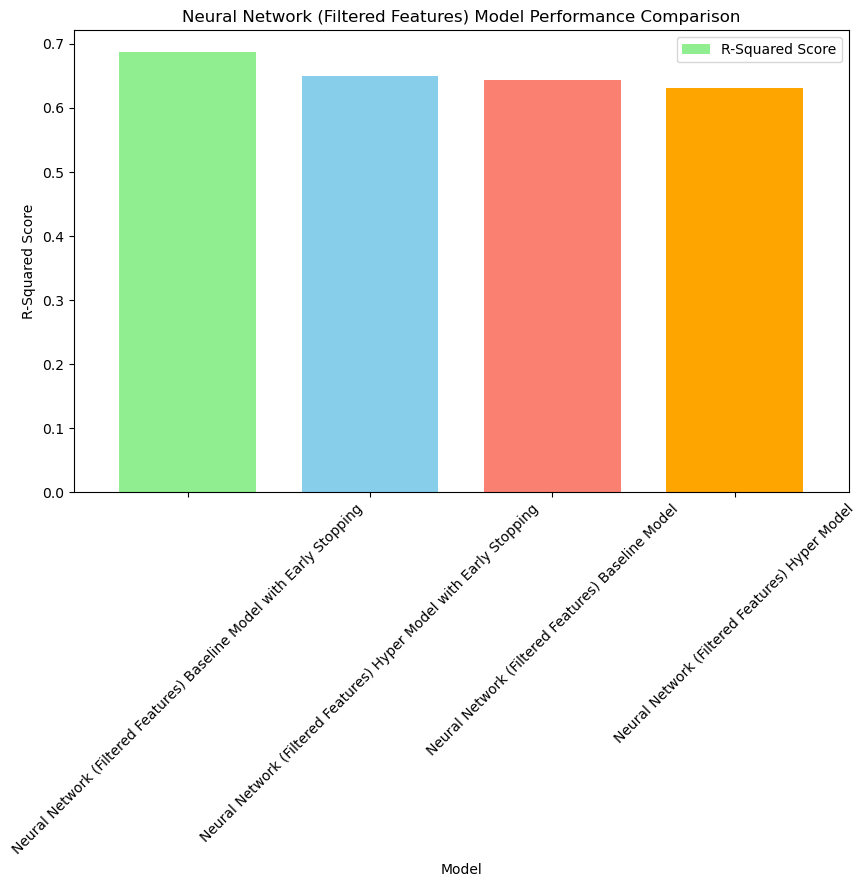

In [160]:
# Sort the DataFrame by 'R-Squared Score' in descending order
nn_filter_comparison_1 = nn_filter_comparison_1.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_nn_filter_1 = ['lightgreen', 'skyblue', 'salmon', 'orange']

# Create a figure and a set of subplots
fig_nn_filter_1, ax_nn_filter_1 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_nn_filter_1 = nn_filter_comparison_1.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_nn_filter_1,  # Apply different colors
    ax=ax_nn_filter_1,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_nn_filter_1.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_nn_filter_1.set_title('Neural Network (Filtered Features) Model Performance Comparison')

# Rotate x-axis labels
ax_nn_filter_1.set_xticklabels(ax_nn_filter_1.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_nn_filter_1, labels_nn_filter_1 = ax_nn_filter_1.get_legend_handles_labels()
ax_nn_filter_1.legend(lines_nn_filter_1, labels_nn_filter_1)

# Show the plot
plt.show()

In [161]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
nn_filter_comparison_1 = nn_filter_comparison_1.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_nn_filter_model_name_1 = nn_filter_comparison_1.iloc[0]['Model']
best_nn_filter_model_1 = nn_filter_comparison_1.iloc[0]['Model Object']
best_nn_filter_r2_score_1 = nn_filter_comparison_1.iloc[0]['R-Squared Score']
best_nn_filter_rmse_1 = nn_filter_comparison_1.iloc[0]['RMSE']
best_nn_filter_mae_1 = nn_filter_comparison_1.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_nn_filter_1 = best_nn_filter_model_name_1

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_nn_filter_1)
print("The highest R-Squared Score is:", best_nn_filter_r2_score_1)
print("The best RMSE is:", best_nn_filter_rmse_1)
print("The best MAE is:", best_nn_filter_mae_1)

The best model based on R-Squared Score is: Neural Network (Filtered Features) Baseline Model with Early Stopping
The highest R-Squared Score is: 0.6868158316957671
The best RMSE is: 0.5301577643085004
The best MAE is: 0.20497260195629388


#### 3.1.6.3. Neural Network Model Comparison

In [162]:
# Displaying the comparison through a table

nn_all_comparison_1 = {
    'Model': [best_nn_model_name_1, best_nn_filter_model_name_1],
    'Model Object': [best_nn_model_1, best_nn_filter_model_1],
    'RMSE': [best_nn_rmse_1, best_nn_filter_rmse_1],
    'MAE': [best_nn_mae_1, best_nn_filter_mae_1],
    'R-Squared Score': [best_nn_r2_score_1, best_nn_filter_r2_score_1]
}

nn_all_comparison_1 = pd.DataFrame(nn_all_comparison_1)

nn_all_comparison_1.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
0,Neural Network Hyper Model,<keras.src.engine.sequential.Sequential object...,0.515784,0.168107,0.703568
1,Neural Network (Filtered Features) Baseline Mo...,<keras.src.engine.sequential.Sequential object...,0.530158,0.204973,0.686816


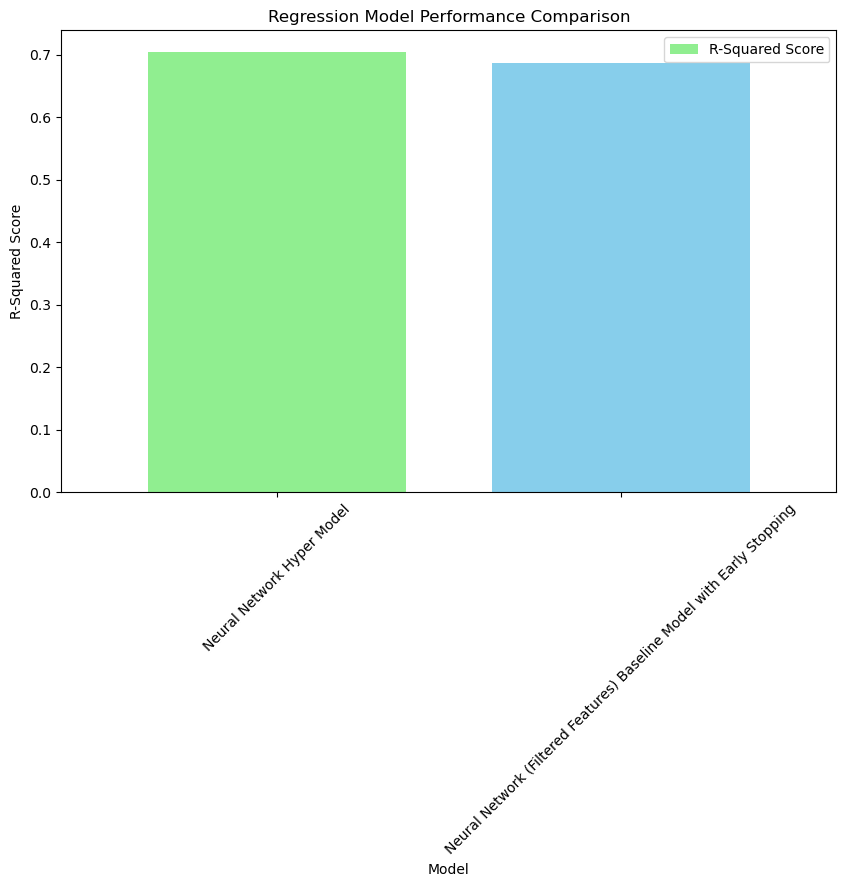

In [163]:
# Sort the DataFrame by 'R-Squared Score' in descending order
nn_all_comparison_1 = nn_all_comparison_1.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_nn_all_1 = ['lightgreen', 'skyblue', 'salmon']

# Create a figure and a set of subplots
fig_nn_all_1, ax_nn_all_1 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_nn_all_1 = nn_all_comparison_1.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_nn_all_1,  # Apply different colors
    ax=ax_nn_all_1,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_nn_all_1.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_nn_all_1.set_title('Regression Model Performance Comparison')

# Rotate x-axis labels
ax_nn_all_1.set_xticklabels(ax_nn_all_1.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_nn_all_1, labels_nn_all_1 = ax_nn_all_1.get_legend_handles_labels()
ax_nn_all_1.legend(lines_nn_all_1, labels_nn_all_1)

# Show the plot
plt.show()

In [164]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
nn_all_comparison_1 = nn_all_comparison_1.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_nn_all_model_name_1 = nn_all_comparison_1.iloc[0]['Model']
best_nn_all_model_1 = nn_all_comparison_1.iloc[0]['Model Object']
best_nn_all_r2_score_1 = nn_all_comparison_1.iloc[0]['R-Squared Score']
best_nn_all_rmse_1 = nn_all_comparison_1.iloc[0]['RMSE']
best_nn_all_mae_1 = nn_all_comparison_1.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_nn_all_1 = best_nn_all_model_name_1

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_nn_all_1)
print("The highest R-Squared Score is:", best_nn_all_r2_score_1)
print("The best RMSE is:", best_nn_all_rmse_1)
print("The best MAE is:", best_nn_all_mae_1)

The best model based on R-Squared Score is: Neural Network Hyper Model
The highest R-Squared Score is: 0.7035675751405462
The best RMSE is: 0.5157842536484135
The best MAE is: 0.16810743769642303


#### 3.1.6.4. Neural Network Feature Importance

In [165]:
# # Check the model input expectation
# print("Model input shape:", best_nn_all_model_1.input_shape)
# print("Background data shape:", best_nn_all_background_1.shape)

In [166]:
# import shap

# # Create a background dataset (can be a small random sample of the training set)
# background = X_train_1.iloc[:100].values  # Adjust the slice size as needed

# # KernelExplainer works with any model, as it uses a model-agnostic approach
# explainer = shap.KernelExplainer(nnht_best_model_1.predict, shap.sample(X_train_1, 100))  # Using a sample of the training data as background
# shap_values = explainer.shap_values(X_test_1[:100], nsamples=100)  # You can adjust the number of samples

# # Summary plot for the subset of features
# shap.summary_plot(shap_values, X_test_1[:100], feature_names=X_test_1.columns[:100])

In [167]:
# # Summary plot for the subset of features
# shap.summary_plot(shap_values, X_test_1[:100], feature_names=X_test_1.columns[:100])

### 3.1.7. All Model Comparison

In [168]:
# Displaying the comparison through a table

model_comparison_1 = {
    'Model': [best_reg_model_name_1, best_nn_all_model_name_1],
    'Model Object': [best_reg_model_1, best_nn_all_model_1],
    'RMSE': [best_reg_rmse_1, best_nn_all_rmse_1],
    'MAE': [best_reg_mae_1, best_nn_all_mae_1],
    'R-Squared Score': [best_reg_r2_score_1, best_nn_all_r2_score_1]
}

model_comparison_1 = pd.DataFrame(model_comparison_1)

model_comparison_1.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
0,Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",0.501998,0.111305,0.719202
1,Neural Network Hyper Model,<keras.src.engine.sequential.Sequential object...,0.515784,0.168107,0.703568


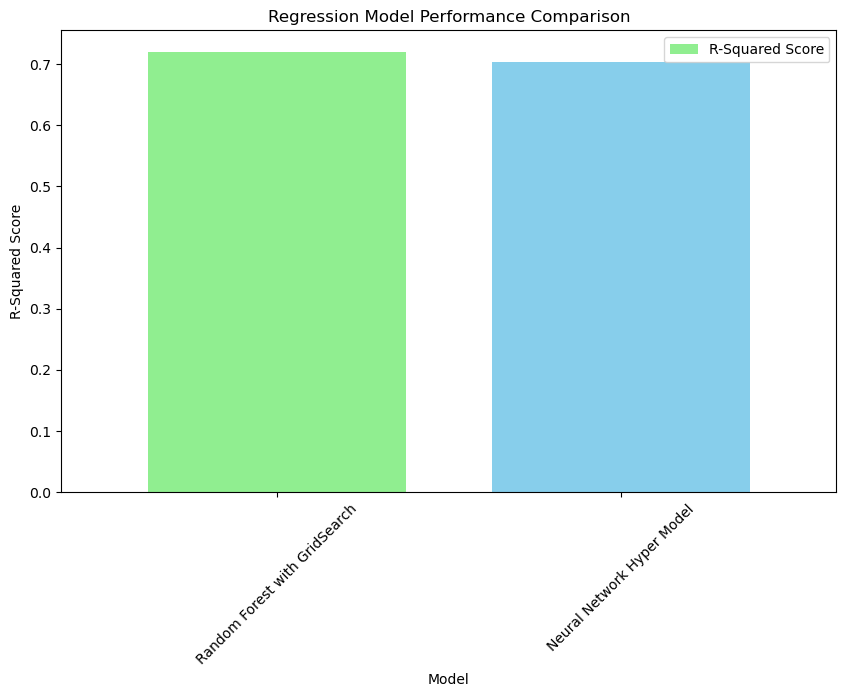

In [169]:
# Sort the DataFrame by 'R-Squared Score' in descending order
model_comparison_1 = model_comparison_1.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_model_1 = ['lightgreen', 'skyblue', 'salmon']

# Create a figure and a set of subplots
fig_model_1, ax_model_1 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_model_1 = model_comparison_1.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_model_1,  # Apply different colors
    ax=ax_model_1,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_model_1.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_model_1.set_title('Regression Model Performance Comparison')

# Rotate x-axis labels
ax_model_1.set_xticklabels(ax_model_1.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_model_1, labels_model_1 = ax_model_1.get_legend_handles_labels()
ax_model_1.legend(lines_model_1, labels_model_1)

# Show the plot
plt.show()

In [170]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
model_comparison_1 = model_comparison_1.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_model_name_1 = model_comparison_1.iloc[0]['Model']
best_model_1 = model_comparison_1.iloc[0]['Model Object']
best_r2_score_1 = model_comparison_1.iloc[0]['R-Squared Score']
best_rmse_1 = model_comparison_1.iloc[0]['RMSE']
best_mae_1 = model_comparison_1.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_model_name__1 = best_model_name_1

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_model_name__1)
print("The highest R-Squared Score is:", best_r2_score_1)
print("The best RMSE is:", best_rmse_1)
print("The best MAE is:", best_mae_1)

The best model based on R-Squared Score is: Random Forest with GridSearch
The highest R-Squared Score is: 0.7192021375141388
The best RMSE is: 0.501998159517113
The best MAE is: 0.11130527462725663


## 3.2. Version 2

### 3.2.1. Linear Regression Model (LRM)

#### 3.2.1.1. Baseline Model

In [171]:
# RMSE Analysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define the model
model_lrm_2 = LinearRegression()

# Train the model
model_lrm_2.fit(X_train_2, y_train_2)

# Predict on the testing set
y_pred_lrm_2 = model_lrm_2.predict(X_test_2)

# Evaluating Model
train_r2_lrm_2 = model_lrm_2.score(X_train_2, y_train_2)
test_r2_lrm_2 = r2_score(y_test_2,y_pred_lrm_2)
test_mse_lrm_2 = mean_squared_error(y_test_2, y_pred_lrm_2)
test_rmse_lrm_2 = test_mse_lrm_2 ** 0.5
test_mae_lrm_2 = mean_absolute_error(y_test_2, y_pred_lrm_2)


In [172]:
# Evaluate the model
print(f"R-Squared score on Training set for Linear Regression Model (LRM): {train_r2_lrm_2}")
print(f"R-Squared score on test set for Linear Regression Model (LRM): {test_r2_lrm_2}")
print(f"Mean Absolute Error (MAE) for the Linear Regression Model (LRM): {test_mae_lrm_2}")
print(f"Root Mean Squared Error (RMSE) for the Linear Regression Model (LRM): {test_rmse_lrm_2}")

R-Squared score on Training set for Linear Regression Model (LRM): 0.4694238669477735
R-Squared score on test set for Linear Regression Model (LRM): 0.5282764911152034
Mean Absolute Error (MAE) for the Linear Regression Model (LRM): 0.29159204765867236
Root Mean Squared Error (RMSE) for the Linear Regression Model (LRM): 0.6506523254647406


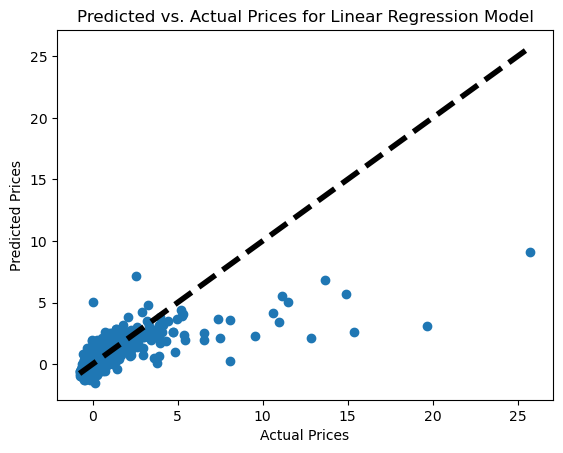

In [173]:
# Predicted vs Actual values
import matplotlib.pyplot as plt

plt.scatter(y_test_2, y_pred_lrm_2)
plt.title('Predicted vs. Actual Prices for Linear Regression Model')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], 'k--', lw=4)
plt.show()

#### 3.2.1.2. Cross-Validation Model

In [174]:
# Cross-validation
from sklearn.model_selection import cross_val_score

mse_lrm_cv_2 = cross_val_score(model_lrm_2, data_2.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                             data_2['PRICE'], scoring='neg_mean_squared_error', cv=5)
r2_lrm_cv_2 = cross_val_score(model_lrm_2, data_2.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                            data_2['PRICE'], scoring='r2', cv=5)
mae_lrm_cv_2 = cross_val_score(model_lrm_2, data_2.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                               data_2['PRICE'], scoring='neg_mean_absolute_error', cv=5)
rmse_lrm_cv_2 = np.sqrt(-mse_lrm_cv_2)

# Evaluate the Model
avg_rmse_lrm_cv_2 = rmse_lrm_cv_2.mean()
std_rmse_lrm_cv_2 = rmse_lrm_cv_2.std()
avg_r2_lrm_cv_2 = r2_lrm_cv_2.mean()
avg_mae_lrm_cv_2 = mae_lrm_cv_2.mean()


In [175]:
print(f"RMSE for Linear Regression Model (LRM) with Cross-Validation: {avg_rmse_lrm_cv_2}")
print(f"MAE for Linear Regression Model (LRM) with Cross-Validation: {avg_mae_lrm_cv_2}")
print(f"R2 Score for Linear Regression Model (LRM) with Cross-Validation: {avg_r2_lrm_cv_2}")
print(f"Standard deviation for Linear Regression Model (LRM): {std_rmse_lrm_cv_2}")

RMSE for Linear Regression Model (LRM) with Cross-Validation: 0.6480113849543397
MAE for Linear Regression Model (LRM) with Cross-Validation: -0.31408111244957837
R2 Score for Linear Regression Model (LRM) with Cross-Validation: 0.15957708080087613
Standard deviation for Linear Regression Model (LRM): 0.5052606933179548


#### 3.2.1.3. Modification of Linear Regression into a Ridge Regression

In [176]:
scaler = StandardScaler()
x_train_scaled_2 = scaler.fit_transform(X_train_2)
x_test_scaled_2 = scaler.transform(X_test_2)

# Stating the model for Ridge Regression
ridge_model_2 = Ridge(alpha=1.0)

ridge_model_2.fit(x_train_scaled_2, y_train_2)
ridge_pred_2 = ridge_model_2.predict(x_test_scaled_2)

In [177]:
# Calculate metrics
test_mse_ridge_2 = mean_squared_error(y_test_2, ridge_pred_2)
test_rmse_ridge_2 = np.sqrt(test_mse_ridge_2)
test_mae_ridge_2 = mean_absolute_error(y_test_2, ridge_pred_2)
test_r2_ridge_2 = r2_score(y_test_2, ridge_pred_2)

print(f"Mean Squared Error: {test_mse_ridge_2}")
print(f"Root Mean Squared Error (RMSE): {test_rmse_ridge_2}")
print(f"Mean Absolute Error (MAE): {test_rmse_ridge_2}")
print(f"R² Score: {test_r2_ridge_2}")

Mean Squared Error: 0.42334367225246244
Root Mean Squared Error (RMSE): 0.6506486549993494
Mean Absolute Error (MAE): 0.6506486549993494
R² Score: 0.5282818132814728


#### 3.2.1.4. Cross-Validation Model (Ridge Regression)

In [178]:
# Cross-validation
from sklearn.model_selection import cross_val_score

mse_ridge_cv_2 = cross_val_score(ridge_model_2, data_2.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                             data_2['PRICE'], scoring='neg_mean_squared_error', cv=5)
r2_ridge_cv_2 = cross_val_score(ridge_model_2, data_2.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                            data_2['PRICE'], scoring='r2', cv=5)
mae_ridge_cv_2 = cross_val_score(ridge_model_2, data_2.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                               data_2['PRICE'], scoring='neg_mean_absolute_error', cv=5)
rmse_ridge_cv_2 = np.sqrt(-mse_ridge_cv_2)


# Evaluate the Model
avg_rmse_ridge_cv_2 = rmse_ridge_cv_2.mean()
std_rmse_ridge_cv_2 = rmse_ridge_cv_2.std()
avg_r2_ridge_cv_2 = r2_ridge_cv_2.mean()
avg_mae_ridge_cv_2 = mae_ridge_cv_2.mean()


In [179]:
print(f"RMSE for Linear Regression Model (LRM) with Cross-Validation: {avg_rmse_ridge_cv_2}")
print(f"R2 Score for Linear Regression Model (LRM) with Cross-Validation: {avg_r2_ridge_cv_2}")
print(f"R2 Score for Mean Absolute Error (MAE) with Cross-Validation: {avg_mae_ridge_cv_2}")
print(f"Standard deviation for Linear Regression Model (LRM): {std_rmse_ridge_cv_2}")

RMSE for Linear Regression Model (LRM) with Cross-Validation: 0.6481084881187295
R2 Score for Linear Regression Model (LRM) with Cross-Validation: 0.15943306081723133
R2 Score for Mean Absolute Error (MAE) with Cross-Validation: -0.3143472552788437
Standard deviation for Linear Regression Model (LRM): 0.5054142902500735


#### 3.2.1.5. Hyperparameter Tuning using GridSearch(Ridge Regression)

In [180]:
# Setup the hyperparameter grid
param_grid_2 = {'alpha': [0.1, 1, 10, 100, 1000]}  # alpha is the regularization strength

# Setup the GridSearchCV object
ridge_grid_search_2 = GridSearchCV(estimator=ridge_model_2, param_grid=param_grid_2, scoring='neg_mean_squared_error', cv=5, verbose=1)

# Train the model with grid search
ridge_grid_search_2.fit(X_train_2, y_train_2)

# Best model after grid search
ridge_best_model_2 = ridge_grid_search_2.best_estimator_

# Predict on the testing set using the best model
y_pred_ridge_best_2 = ridge_best_model_2.predict(X_test_2)



Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [181]:
# Evaluating Model
train_r2_ridge_grid_2 = ridge_best_model_2.score(X_train_2, y_train_2)
test_r2_ridge_grid_2 = r2_score(y_test_2, y_pred_ridge_best_2)
test_mse_ridge_grid_2 = mean_squared_error(y_test_2, y_pred_ridge_best_2)
test_rmse_ridge_grid_2 = test_mse_ridge_grid_2 ** 0.5
test_mae_ridge_grid_2 = mean_absolute_error(y_test_2, y_pred_ridge_best_2)

In [182]:
print("Best Alpha:", ridge_grid_search_2.best_params_)
print("Best RMSE:", test_rmse_ridge_grid_2)
print("Train R^2:", train_r2_ridge_grid_2)
print("Test R^2:", test_r2_ridge_grid_2)
print("Test MAE:", test_mae_ridge_grid_2)

Best Alpha: {'alpha': 1000}
Best RMSE: 0.6512061546321792
Train R^2: 0.4685873215861126
Test R^2: 0.5274730960713728
Test MAE: 0.28852090620595305


#### 3.2.1.6. Linear Regression Model Comparison

In [183]:
# Displaying the comparison through a table

linear_comparison_2 = {
    'Model': ['V2 Linear Regression', 'V2 Linear Regression with CV', 'V2 Ridge Regression', 'V2 Ridge Regression with CV', 'V2 Ridge Regression with GridSearch'],
    'Model Object': [model_lrm_2, model_lrm_2, ridge_model_2, ridge_model_2, ridge_best_model_2],
    'RMSE': [test_rmse_lrm_2, avg_rmse_lrm_cv_2, test_rmse_ridge_2, avg_rmse_ridge_cv_2, test_rmse_ridge_grid_2],
    'MAE': [test_mae_lrm_2, avg_mae_lrm_cv_2, test_mae_ridge_2, avg_mae_ridge_cv_2, test_mae_ridge_grid_2],
    'R-Squared Score': [test_r2_lrm_2, avg_r2_lrm_cv_2, test_r2_ridge_1, avg_r2_ridge_cv_2, test_r2_ridge_grid_2]
}

linreg_comparison_2 = pd.DataFrame(linear_comparison_2)

linreg_comparison_2.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
2,V2 Ridge Regression,Ridge(),0.650649,0.291545,0.528282
0,V2 Linear Regression,LinearRegression(),0.650652,0.291592,0.528276
4,V2 Ridge Regression with GridSearch,Ridge(alpha=1000),0.651206,0.288521,0.527473
1,V2 Linear Regression with CV,LinearRegression(),0.648011,-0.314081,0.159577
3,V2 Ridge Regression with CV,Ridge(),0.648108,-0.314347,0.159433


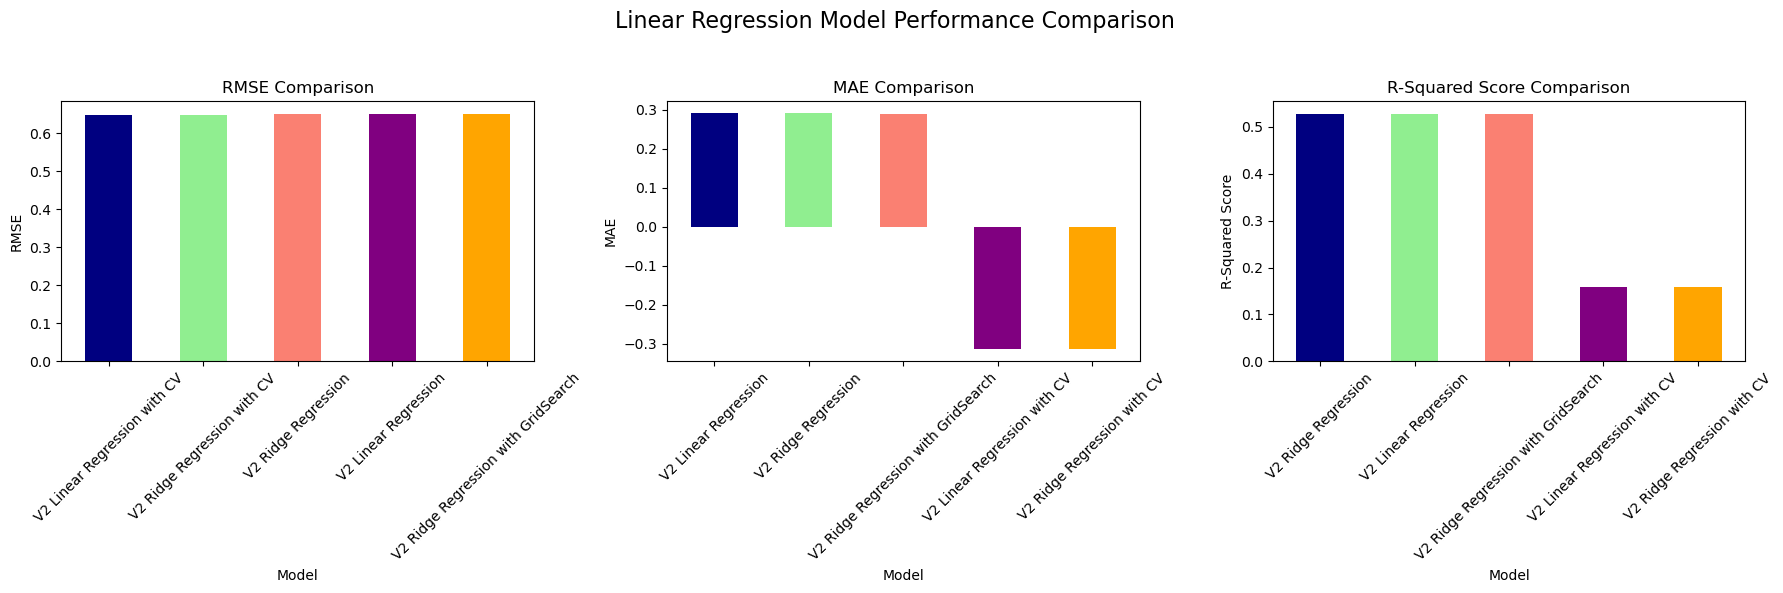

In [184]:
# Define a list of colors, one for each model
colors_linreg_2 = ['navy', 'lightgreen', 'salmon', 'purple', 'orange']

# Create a figure with 3 subplots, one for each score, laid out horizontally
fig_linreg_2, ax_linreg_2 = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the figure size as needed

# Plot RMSE
linreg_comparison_2.sort_values('RMSE', ascending=True).plot(
    kind='bar',
    x='Model',
    y='RMSE',
    ax=ax_linreg_2[0],
    color=colors_linreg_2,
    legend=False,
    title='RMSE Comparison'
)
ax_linreg_2[0].set_ylabel('RMSE')
ax_linreg_2[0].set_xticklabels(ax_linreg_2[0].get_xticklabels(), rotation=45)

# Plot MAE
linreg_comparison_2.sort_values('MAE', ascending=False).plot(
    kind='bar',
    x='Model',
    y='MAE',
    ax=ax_linreg_2[1],
    color=colors_linreg_2,
    legend=False,
    title='MAE Comparison'
)
ax_linreg_2[1].set_ylabel('MAE')
ax_linreg_2[1].set_xticklabels(ax_linreg_2[1].get_xticklabels(), rotation=45)

# Plot R-Squared Score
linreg_comparison_2.sort_values('R-Squared Score', ascending=False).plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    ax=ax_linreg_2[2],
    color=colors_linreg_2,
    legend=False,
    title='R-Squared Score Comparison'
)
ax_linreg_2[2].set_ylabel('R-Squared Score')
ax_linreg_2[2].set_xticklabels(ax_linreg_2[2].get_xticklabels(), rotation=45)

# Set overall plot title
fig_linreg_2.suptitle('Linear Regression Model Performance Comparison', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect parameters as needed for the title to fit

# Show the plot
plt.show()

#### 3.2.1.7. Choosing Best Model

In [185]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
sorted_linreg_model_2 = linreg_comparison_2.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_linreg_model_name_2 = sorted_linreg_model_2.iloc[0]['Model']
best_linreg_model_2 = sorted_linreg_model_2.iloc[0]['Model Object']
best_linreg_r2_score_2 = sorted_linreg_model_2.iloc[0]['R-Squared Score']
best_linreg_rmse_2 = sorted_linreg_model_2.iloc[0]['RMSE']
best_linreg_mae_2 = sorted_linreg_model_2.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_linreg_2 = best_linreg_model_name_2

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_linreg_2)
print("R-Squared Score is:", best_linreg_r2_score_2)
print("RMSE Score is:", best_linreg_rmse_2)
print("MAE Score is:", best_linreg_mae_2)

The best model based on R-Squared Score is: V2 Ridge Regression
R-Squared Score is: 0.5282818132814728
RMSE Score is: 0.6506486549993494
MAE Score is: 0.29154458065327654


### 3.2.2. XGBoost Model (XGB)

#### 3.2.2.1. Baseline Model

In [186]:
# Uploading XGBoost library
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the model
model_xgb_2 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10000, learning_rate=0.01, random_state=42)

# Train the model on the training data
model_xgb_2.fit(X_train_2, y_train_2)

# Predict on the testing set
y_pred_xgb_2 = model_xgb_2.predict(X_test_2)

# Evaluate Model
train_r2_xgb_2 = model_xgb_2.score(X_train_2, y_train_2)
test_r2_xgb1_2 = r2_score(y_test_1,y_pred_xgb_2)
test_rmse_xgb_2 = np.sqrt(mean_squared_error(y_test_2, y_pred_xgb_2))
test_mae_xgb_2 = mean_absolute_error(y_test_2, y_pred_xgb_2)  # Calculate MAE


In [187]:
# Printing the results of the XGBoost Model
print(f"R2 Score on Training set for XGBoost Model (LRM): {train_r2_xgb_2}")
print(f"R2 Score on Test set for XGBoost Model (LRM): {test_r2_xgb1_2}")
print(f"RMSE on Test set for XGBoost Model (LRM): {test_rmse_xgb_2}")
print(f"MAE on Test set for XGBoost Model (LRM): {test_mae_xgb_2}")


R2 Score on Training set for XGBoost Model (LRM): 0.9986234309852169
R2 Score on Test set for XGBoost Model (LRM): 0.6450408123850925
RMSE on Test set for XGBoost Model (LRM): 0.5644096584679892
MAE on Test set for XGBoost Model (LRM): 0.12831342760172265


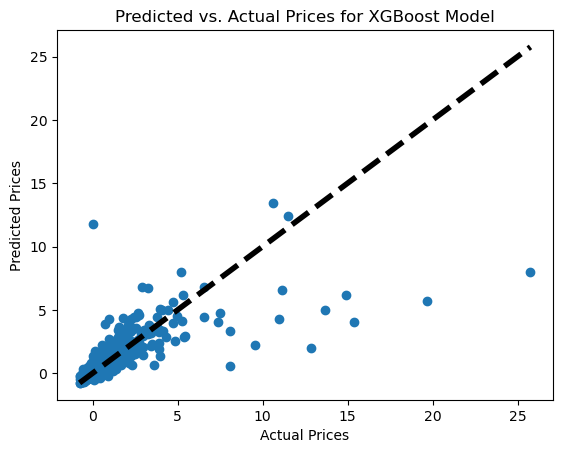

In [188]:
# Predicted vs Actual values
import matplotlib.pyplot as plt

plt.scatter(y_test_2, y_pred_xgb_2)
plt.title('Predicted vs. Actual Prices for XGBoost Model')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], 'k--', lw=4)
plt.show()


##### Cross-Validation

In [189]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import numpy as np
import xgboost as xgb

# Define the model
model_xgb_cv_2 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10000, learning_rate=0.01, random_state=42)

# Define a custom RMSE scorer
rmse_scorer_xgb_cv_2 = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Perform cross-validation using RMSE
train_rmse_xgb_cv_2 = cross_val_score(model_xgb_cv_2, X_train_2, y_train_2, cv=5, scoring=rmse_scorer_xgb_cv_2)

# Perform cross-validation using R^2
train_r2_xgb_cv_2 = cross_val_score(model_xgb_cv_2, X_train_2, y_train_2, cv=5, scoring='r2')


In [190]:
# Print cross-validation results
print("Training Cross-Validated RMSE scores:", -train_rmse_xgb_cv_2.mean())
print("Training Cross-Validated R^2 scores:", train_r2_xgb_cv_2.mean())


Training Cross-Validated RMSE scores: 0.5939509130624843
Training Cross-Validated R^2 scores: 0.513536213494435


In [191]:
# Train the model on the entire training dataset for final evaluation
model_xgb_cv_2.fit(X_train_2, y_train_2)

# Predict on the testing set
y_pred_xgb_cv_2 = model_xgb_cv_2.predict(X_test_2)

# Evaluate the model on the testing set
test_mse_xgb_cv_2 = mean_squared_error(y_test_2, y_pred_xgb_cv_2)
test_rmse_xgb_cv_2 = np.sqrt(test_mse_xgb_cv_2)
test_r2_xgb_cv_2 = r2_score(y_test_2, y_pred_xgb_cv_2)


In [192]:
# Print the test evaluation results
print(f"Test MSE: {test_mse_xgb_cv_2}")
print(f"Test RMSE: {test_rmse_xgb_cv_2}")
print(f"Test R² Score: {test_r2_xgb_cv_2}")

Test MSE: 0.31855826257195224
Test RMSE: 0.5644096584679892
Test R² Score: 0.6450408123850925


#### 3.2.2.2. GridSearch

In [193]:
# Variety of the XGBoost model

# Uploading library
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Define the parameter grid for the XGBoost Model with GridSearch
param_grid_xgbgs_2 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
}

# Setup GridSearchCV
xgbgs_reg_2 = XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search_xgbgs_2 = GridSearchCV(estimator=xgbgs_reg_2, param_grid=param_grid_xgbgs_2, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit GridSearchCV
grid_search_xgbgs_2.fit(X_train_2, y_train_2)

# Best hyperparameters and model
print("Best parameters:", grid_search_xgbgs_2.best_params_)
xgbgs_best_model_2 = grid_search_xgbgs_2.best_estimator_

# Predictions and evaluation on the training set
y_train_pred_xgbgs_2 = xgbgs_best_model_2.predict(X_train_2)
train_rmse_xgbgs_2 = np.sqrt(mean_squared_error(y_train_2, y_train_pred_xgbgs_2))
train_r2_xgbgs_2 = r2_score(y_train_2, y_train_pred_xgbgs_2)

# Predictions and evaluation on the test set
y_test_pred_xgbgs_2 = xgbgs_best_model_2.predict(X_test_2)
test_rmse_xgbgs_2 = np.sqrt(mean_squared_error(y_test_2, y_test_pred_xgbgs_2))
test_r2_xgbgs_2 = r2_score(y_test_2, y_test_pred_xgbgs_2)
test_mae_xgbgs_2 = mean_absolute_error(y_test_2, y_test_pred_xgbgs_2)  # Calculate MAE



Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END 

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=200,

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200,

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=100,

In [194]:
# Prediction Results for XGBoost Model with GridSearch
print(f"RMSE on Training set for XGBoost GridSearch Model: {train_rmse_xgbgs_2}")
print(f"R2 Score on Training set for XGBoost GridSearch Model: {train_r2_xgbgs_2}")
print(f"RMSE on Test set for XGBoost GridSearch Model: {test_rmse_xgbgs_2}")
print(f"RMSE on Test set for XGBoost GridSearch Model: {test_mae_xgbgs_2}")
print(f"R2 Score on Test set for XGBoost GridSearch Model: {test_r2_xgbgs_2}")

RMSE on Training set for XGBoost GridSearch Model: 0.2039636518803502
R2 Score on Training set for XGBoost GridSearch Model: 0.9601506029974927
RMSE on Test set for XGBoost GridSearch Model: 0.5638917368634556
RMSE on Test set for XGBoost GridSearch Model: 0.17278487103631657
R2 Score on Test set for XGBoost GridSearch Model: 0.645691958870017


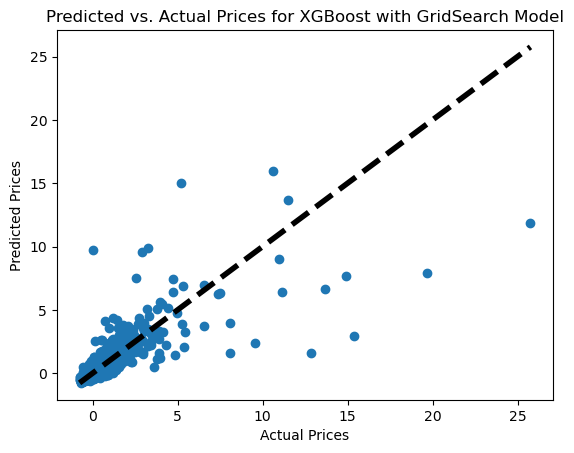

In [195]:
# Predicted vs Actual values
import matplotlib.pyplot as plt

plt.scatter(y_test_2, y_test_pred_xgbgs_2)
plt.title('Predicted vs. Actual Prices for XGBoost with GridSearch Model')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], 'k--', lw=4)
plt.show()


#### 3.2.2.3. RandomizedSearch

In [196]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np

# Define the parameter grid
param_grid_xgbrs_2 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 0.8],
    'subsample': [0.7, 0.8]
}

# Initialize the XGBRegressor
xgbrs_reg_2 = XGBRegressor(objective='reg:squarederror')

# Setup RandomizedSearchCV
random_search_xgbrs_2 = RandomizedSearchCV(xgbrs_reg_2, param_distributions=param_grid_xgbrs_2, n_iter=10,
                                   scoring='neg_mean_squared_error', cv=5, verbose=2, random_state=42)

random_search_xgbrs_2.fit(X_train_2, y_train_2)

# Best parameters and model
xgbrs_best_params_2= random_search_xgbrs_2.best_params_
xgbrs_best_model_2 = random_search_xgbrs_2.best_estimator_

print(f"Best Parameters: {xgbrs_best_params_2}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END co

In [197]:
# Predictions on training set
y_train_pred_xgbrs_2 = xgbrs_best_model_2.predict(X_train_2)

# Predictions on test set
y_test_pred_xgbrs_2 = xgbrs_best_model_2.predict(X_test_2)

# Calculate MAE for training and test sets
train_mae_xgbrs_2 = mean_absolute_error(y_train_2, y_train_pred_xgbrs_2)
test_mae_xgbrs_2 = mean_absolute_error(y_test_2, y_test_pred_xgbrs_2)

# Calculate RMSE for training and test sets
train_rmse_xgbrs_2 = np.sqrt(mean_squared_error(y_train_2, y_train_pred_xgbrs_2))
test_rmse_xgbrs_2 = np.sqrt(mean_squared_error(y_test_2, y_test_pred_xgbrs_2))

# Calculate R-squared for training and test sets
train_r2_xgbrs_2 = r2_score(y_train_2, y_train_pred_xgbrs_2)
test_r2_xgbrs_2 = r2_score(y_test_2, y_test_pred_xgbrs_2)

print(f"Training RMSE: {train_rmse_xgbrs_2}, Test RMSE: {test_rmse_xgbrs_2}")
print(f"Training MAE: {train_mae_xgbrs_2}, Test MAE: {test_mae_xgbrs_2}")
print(f"Training R^2: {train_r2_xgbrs_2}, Test R^2: {test_r2_xgbrs_2}")

Training RMSE: 0.16777047432292347, Test RMSE: 0.56442899863859
Training MAE: 0.10431661115526127, Test MAE: 0.16498162946255568
Training R^2: 0.9730383007230974, Test R^2: 0.6450164857678562


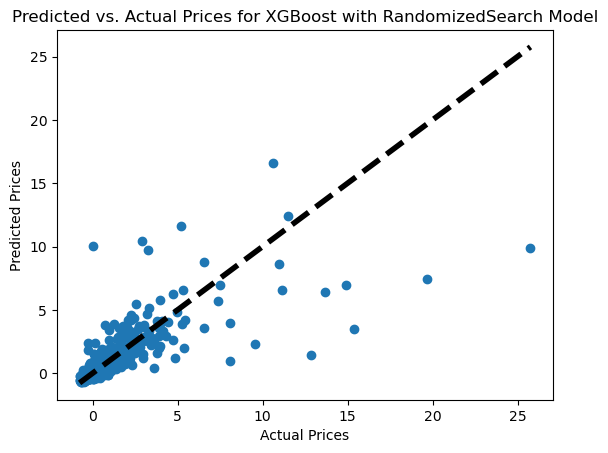

In [198]:
# Predicted vs Actual values
import matplotlib.pyplot as plt

plt.scatter(y_test_2, y_test_pred_xgbrs_2)
plt.title('Predicted vs. Actual Prices for XGBoost with RandomizedSearch Model')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], 'k--', lw=4)
plt.show()


#### 3.2.2.4. XGBoost Model Comparison

In [199]:
# Displaying the comparison through a table

xgb_comparison_2 = {
    'Model': ['V2 XGBoost Baseline Model', 'V2 XGBoost with GridSearch', 'V2 XGBoost with RandomizedSearch'],
    'Model Object': [model_xgb_2, xgbgs_best_model_2, xgbrs_best_model_2],
    'RMSE': [test_rmse_xgb_cv_2, test_rmse_xgbgs_2, test_rmse_xgbrs_2],
    'MAE': [test_mae_xgb_2, test_mae_xgbgs_2, test_mae_xgbrs_2],
    'R-Squared Score': [test_r2_xgb_cv_2, test_r2_xgbgs_2, test_r2_xgbrs_2]
}

xgb_comparison_2 = pd.DataFrame(xgb_comparison_2)

xgb_comparison_2.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
1,V2 XGBoost with GridSearch,"XGBRegressor(base_score=None, booster=None, ca...",0.563892,0.172785,0.645692
0,V2 XGBoost Baseline Model,"XGBRegressor(base_score=None, booster=None, ca...",0.564410,0.128313,0.645041
2,V2 XGBoost with RandomizedSearch,"XGBRegressor(base_score=None, booster=None, ca...",0.564429,0.164982,0.645016


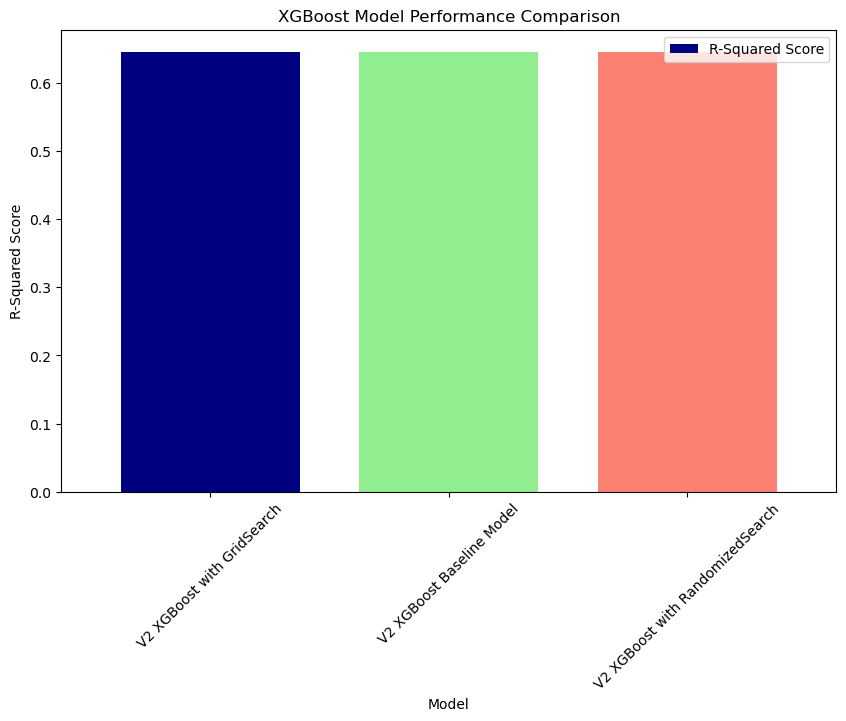

In [200]:
# Sort the DataFrame by 'R-Squared Score' in descending order
xgb_comparison_2 = xgb_comparison_2.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_xgb_2 = ['navy', 'lightgreen', 'salmon']

# Create a figure and a set of subplots
fig_xgb_2, ax_xgb_2 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
rmse_bars_xgb_2 = xgb_comparison_2.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_xgb_2,  # Apply different colors
    ax=ax_xgb_2,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_xgb_2.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_xgb_2.set_title('XGBoost Model Performance Comparison')

# Rotate x-axis labels
ax_xgb_2.set_xticklabels(ax_xgb_2.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_xgb_2, labels_xgb_2 = ax_xgb_2.get_legend_handles_labels()
ax_xgb_2.legend(lines_xgb_2, labels_xgb_2)

# Show the plot
plt.show()

#### 3.2.2.5. Choosing the Best XGBoost Model

In [201]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
xgb_comparison_2 = xgb_comparison_2.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_xgb_model_name_2 = xgb_comparison_2.iloc[0]['Model']
best_xgb_model_2 = xgb_comparison_2.iloc[0]['Model Object']
best_xgb_r2_score_2 = xgb_comparison_2.iloc[0]['R-Squared Score']
best_xgb_mae_2 = xgb_comparison_2.iloc[0]['MAE']
best_xgb_rmse_2 = xgb_comparison_2.iloc[0]['RMSE']

# Extract the model name with the highest R-Squared Score
best_xgb_2 = best_xgb_model_name_2

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_xgb_2)
print("R-Squared Score:", best_xgb_r2_score_2)
print("RMSE:", best_xgb_rmse_2)
print("MAE:", best_xgb_mae_2)

The best model based on R-Squared Score is: V2 XGBoost with GridSearch
R-Squared Score: 0.645691958870017
RMSE: 0.5638917368634556
MAE: 0.17278487103631657


### 3.2.3. RandomForest Model (RF)

#### 3.2.3.1. Baseline Model

In [202]:
# Library needed for Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Initialize the Random Forest Regressor
rf_model_2 = RandomForestRegressor(n_estimators=150, random_state=32)  # You can adjust the number of trees with `n_estimators`

# Train the model
train_rf_pred_2 = rf_model_2.fit(X_train_2, y_train_2)

# Predict on the test set
test_rf_pred_2 = rf_model_2.predict(X_test_2)


In [203]:
# Calculate evaluation metrics
test_mse_rf_2 = mean_squared_error(y_test_2, test_rf_pred_2)
test_rmse_rf_2 = np.sqrt(test_mse_rf_2)
test_mae_rf_2 = mean_absolute_error(y_test_2, test_rf_pred_2)
test_r2_rf_2 = r2_score(y_test_2, test_rf_pred_2)

print(f"Mean Squared Error: {test_mse_rf_2}")
print(f"Root Mean Squared Error: {test_rmse_rf_2}")
print(f"Root Mean Squared Error: {test_mae_rf_2}")
print(f"R² Score: {test_r2_rf_2}")

Mean Squared Error: 0.25926632353768175
Root Mean Squared Error: 0.5091820141537619
Root Mean Squared Error: 0.13268285907458735
R² Score: 0.711107905863679


#### 3.2.3.2. Cross-Validation Model

In [204]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import numpy as np

# Custom scorer for RMSE
def rmse_score_rfcv_2(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer_rfcv_2 = make_scorer(rmse_score_rfcv_2, greater_is_better=False)

# Cross-validate the model using RMSE
train_rmse_rf_cv_2 = cross_val_score(rf_model_2, X_train_2, y_train_2, cv=5, scoring=rmse_scorer_rfcv_2)

# Cross-validate the model using Mean Absolute Error
train_mae_rf_cv_2 = cross_val_score(rf_model_2, X_train_2, y_train_2, cv=5, scoring='neg_mean_absolute_error')

# Cross-validate the model using R^2
train_r2_rf_cv_2 = cross_val_score(rf_model_2, X_train_2, y_train_2, cv=5, scoring='r2')


In [205]:
# Print cross-validation results
print("CV RMSE scores:", -train_rmse_rf_cv_2)  # Negate RMSE scores because make_scorer(mse, greater_is_better=False) makes them negative
print("CV RMSE average score:", -np.mean(train_rmse_rf_cv_2))

print("CV R^2 scores:", -train_mae_rf_cv_2)
print("CV R^2 average score:", np.mean(train_mae_rf_cv_2))

print("CV R^2 scores:", train_r2_rf_cv_2)
print("CV R^2 average score:", np.mean(train_r2_rf_cv_2))

CV RMSE scores: [0.42665505 0.5747885  0.36340402 0.7286133  0.4969477 ]
CV RMSE average score: 0.5180817127571242
CV R^2 scores: [0.14142763 0.14260839 0.12447045 0.14663819 0.13432223]
CV R^2 average score: -0.13789337795583606
CV R^2 scores: [0.74866536 0.80320798 0.81073207 0.68610992 0.41962752]
CV R^2 average score: 0.6936685693734377


#### 3.2.3.3. Hyperparameter Tuning

In [206]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid
param_grid_rfgs_2 = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'bootstrap': [True, False]  # Method for sampling data points (with or without replacement)
}

# Initialize the RandomForestRegressor
rfgs_model_2 = RandomForestRegressor(random_state=32)

# Setup GridSearchCV
grid_search_rf_2 = GridSearchCV(estimator=rfgs_model_2, param_grid=param_grid_rfgs_2, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search_rf_2.fit(X_train_2, y_train_2)

# Get the best estimator
best_rfgs_model_2 = grid_search_rf_2.best_estimator_

# Predict on the test set with the best model
test_rfgs_pred_2 = best_rfgs_model_2.predict(X_test_2)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
416 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ahska\anaconda3\Lib\site-pack

In [207]:
# Calculate evaluation metrics
test_mse_rfgs_2 = mean_squared_error(y_test_2, test_rfgs_pred_2)
test_rmse_rfgs_2 = np.sqrt(test_mse_rfgs_2)
test_mae_rfgs_2 = mean_absolute_error(y_test_2, test_rfgs_pred_2)
test_r2_rfgs_2 = r2_score(y_test_2, test_rfgs_pred_2)

# Print the results
print("Best model parameters:", grid_search_rf_2.best_params_)
print(f"Test MSE: {test_mse_rfgs_2}")
print(f"Test RMSE: {test_rmse_rfgs_2}")
print(f"Test MAE: {test_mae_rfgs_2}")
print(f"Test R² Score: {test_r2_rfgs_2}")


Best model parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test MSE: 0.2490305323987855
Test RMSE: 0.49902959070458486
Test MAE: 0.11146731804645911
Test R² Score: 0.7225133174763751


#### 3.2.3.4. RandomForest Model Comparison

In [208]:
# Displaying the comparison through a table

rf_comparison_2 = {
    'Model': ['V2 Random Forest Baseline Model', 'V2 Random Forest with GridSearch'],
    'Model Object': [rf_model_2, best_rfgs_model_2],
    'RMSE': [test_rmse_rf_2, test_rmse_rfgs_2],
    'MAE': [test_mae_rf_2, test_mae_rfgs_2],
    'R-Squared Score': [test_r2_rf_2, test_r2_rfgs_2]
}

rf_comparison_2 = pd.DataFrame(rf_comparison_2)

rf_comparison_2.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
1,V2 Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",0.499030,0.111467,0.722513
0,V2 Random Forest Baseline Model,"(DecisionTreeRegressor(max_features=1.0, rando...",0.509182,0.132683,0.711108


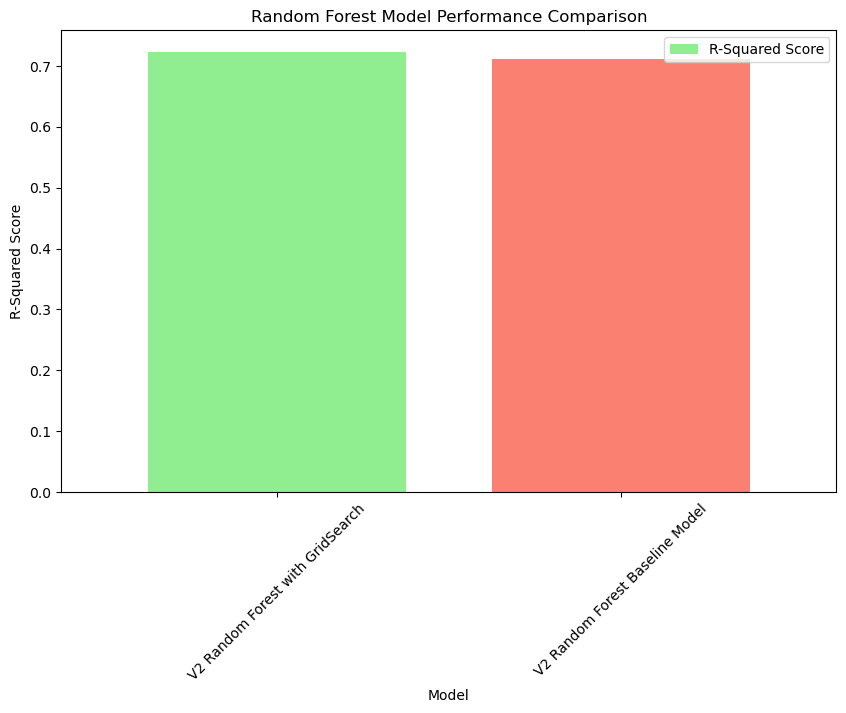

In [209]:
# Sort the DataFrame by 'R-Squared Score' in descending order
rf_comparison_2 = rf_comparison_2.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_rf_2 = ['lightgreen', 'salmon']

# Create a figure and a set of subplots
fig_rf_2, ax_rf_2 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_rf_2 = rf_comparison_2.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_rf_2,  # Apply different colors
    ax=ax_rf_2,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_rf_2.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_rf_2.set_title('Random Forest Model Performance Comparison')

# Rotate x-axis labels
ax_rf_2.set_xticklabels(ax_rf_2.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_rf_2, labels_rf_2 = ax_rf_2.get_legend_handles_labels()
ax_rf_2.legend(lines_rf_2, labels_rf_2)

# Show the plot
plt.show()

#### 3.2.3.5. Choosing the Best Model

In [210]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
rf_comparison_2 = rf_comparison_2.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_rf_model_name_2 = rf_comparison_2.iloc[0]['Model']
best_rf_model_2 = rf_comparison_2.iloc[0]['Model Object']
best_rf_r2_score_2 = rf_comparison_2.iloc[0]['R-Squared Score']
best_rf_rmse_2 = rf_comparison_2.iloc[0]['RMSE']
best_rf_mae_2 = rf_comparison_2.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_rf_2 = best_rf_model_name_2

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_rf_2)
print("The highest R-Squared Score is:", best_rf_r2_score_2)
print("The best RMSE is:", best_rf_rmse_2)
print("The best MAE is:", best_rf_mae_2)

The best model based on R-Squared Score is: V2 Random Forest with GridSearch
The highest R-Squared Score is: 0.7225133174763751
The best RMSE is: 0.49902959070458486
The best MAE is: 0.11146731804645911


### 3.2.4. Regression Model Comparison

In [211]:
# Displaying the comparison through a table

reg_comparison_2 = {
    'Model': [best_linreg_model_name_2, best_xgb_model_name_2, best_rf_model_name_2],
    'Model Object': [best_linreg_model_2, best_xgb_model_2, best_rf_model_2],
    'RMSE': [best_linreg_rmse_2, best_xgb_rmse_2, best_rf_rmse_2],
    'MAE': [best_linreg_mae_2, best_xgb_mae_2, best_rf_mae_2],
    'R-Squared Score': [best_linreg_r2_score_2, best_xgb_r2_score_2, best_rf_r2_score_2]
}

reg_comparison_2 = pd.DataFrame(reg_comparison_2)

reg_comparison_2.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
2,V2 Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",0.499030,0.111467,0.722513
1,V2 XGBoost with GridSearch,"XGBRegressor(base_score=None, booster=None, ca...",0.563892,0.172785,0.645692
0,V2 Ridge Regression,Ridge(),0.650649,0.291545,0.528282


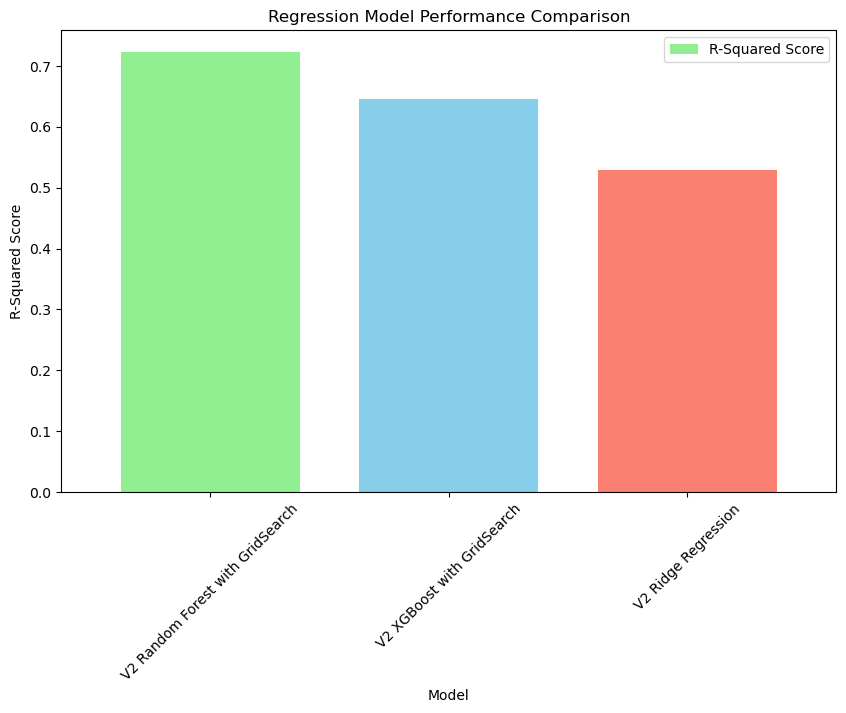

In [212]:
# Sort the DataFrame by 'R-Squared Score' in descending order
reg_comparison_2 = reg_comparison_2.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_reg_2 = ['lightgreen', 'skyblue', 'salmon']

# Create a figure and a set of subplots
fig_reg_2, ax_reg_2 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_reg_2 = reg_comparison_2.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_reg_2,  # Apply different colors
    ax=ax_reg_2,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_reg_2.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_reg_2.set_title('Regression Model Performance Comparison')

# Rotate x-axis labels
ax_reg_2.set_xticklabels(ax_reg_2.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_reg_2, labels_reg_2 = ax_reg_2.get_legend_handles_labels()
ax_reg_2.legend(lines_reg_2, labels_reg_2)

# Show the plot
plt.show()

### 3.2.5. Feature Importance from Best Regression Models

In [213]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
reg_comparison_2 = reg_comparison_2.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_reg_model_name_2 = reg_comparison_2.iloc[0]['Model']
best_reg_model_2 = reg_comparison_2.iloc[0]['Model Object']
best_reg_r2_score_2 = reg_comparison_2.iloc[0]['R-Squared Score']
best_reg_rmse_2 = reg_comparison_2.iloc[0]['RMSE']
best_reg_mae_2 = reg_comparison_2.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_reg_2 = best_reg_model_name_2

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_reg_2)
print("The highest R-Squared Score is:", best_reg_r2_score_2)
print("The best RMSE is:", best_reg_rmse_2)
print("The best MAE is:", best_reg_mae_2)

The best model based on R-Squared Score is: V2 Random Forest with GridSearch
The highest R-Squared Score is: 0.7225133174763751
The best RMSE is: 0.49902959070458486
The best MAE is: 0.11146731804645911


In [214]:
# We choose the model with the highest R-Squared

# Feature importance
best_reg_feature_importances_2 = best_reg_model_2.feature_importances_
best_reg_features_2 = pd.DataFrame({'Feature': X_train_2.columns, 'Importance': best_reg_feature_importances_2})
best_reg_features_2.sort_values(by='Importance', ascending=False, inplace=True)
print(best_reg_features_2)

                             Feature  Importance
2                        SQUARE FEET    0.371246
1                              BATHS    0.121904
5          bus_station_accessibility    0.107240
11              school_accessibility    0.080857
9      transit_station_accessibility    0.079417
0                               BEDS    0.058990
12                park_accessibility    0.055707
10           preschool_accessibility    0.050025
3                                AGE    0.045799
13            hospital_accessibility    0.018816
4              airport_accessibility    0.005020
7   light_rail_station_accessibility    0.004297
8        train_station_accessibility    0.000443
6       ferry_terminal_accessibility    0.000242


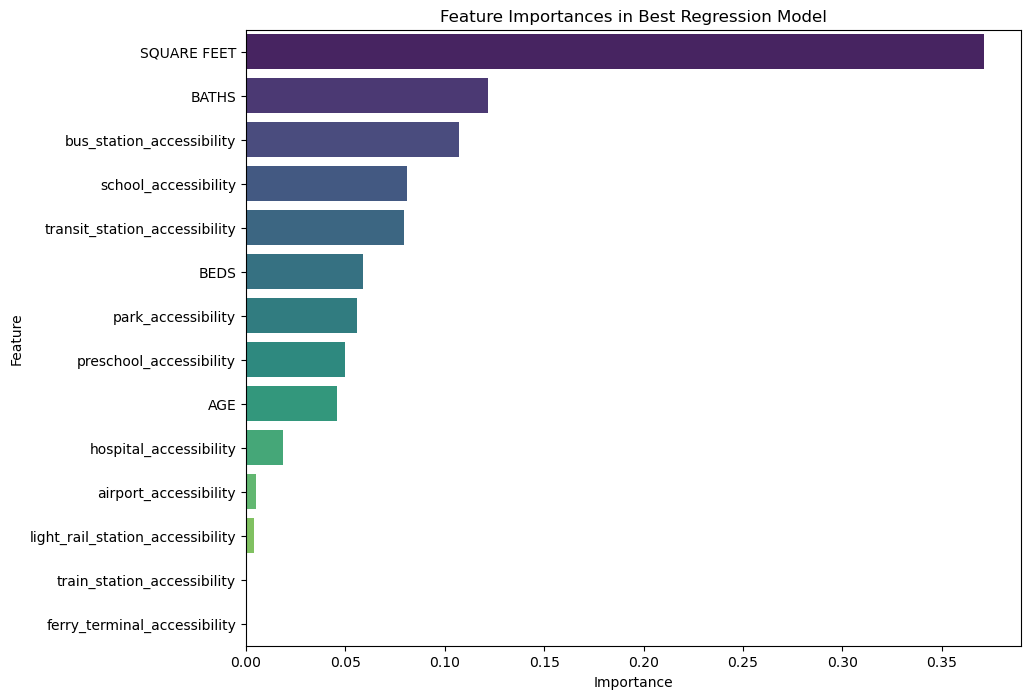

In [215]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=best_reg_features_2, palette='viridis')
plt.title('Feature Importances in Best Regression Model')
plt.show()

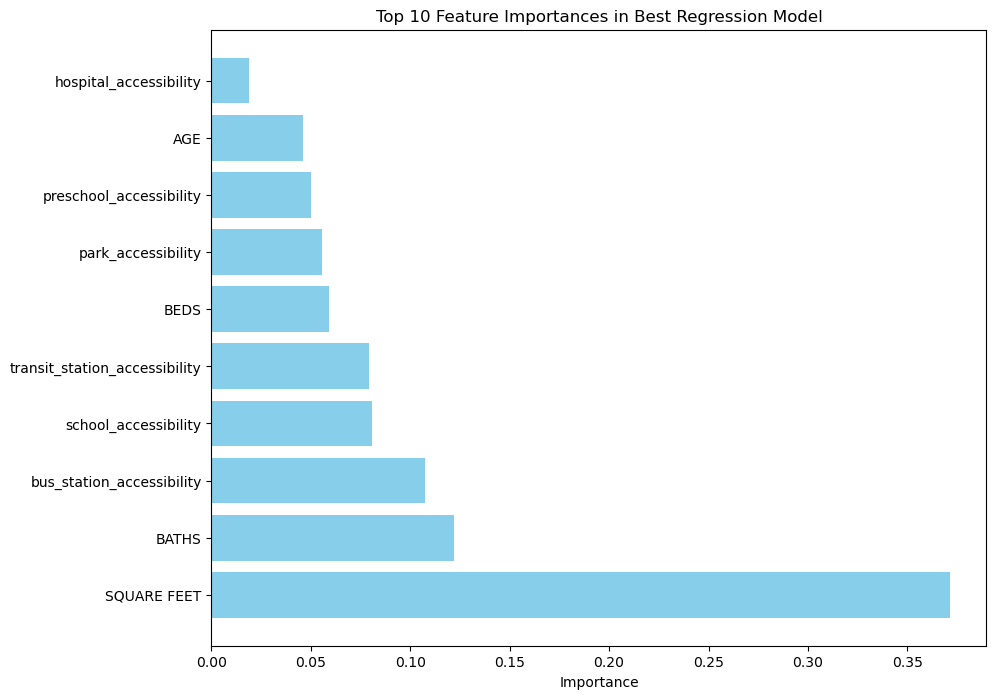

In [216]:
# Display only the top N features for clarity
top_n = 10
plt.figure(figsize=(10, 8))
plt.barh(best_reg_features_2['Feature'][:top_n], best_reg_features_2['Importance'][:top_n], color='skyblue')
plt.xlabel('Importance')
plt.title(f'Top {top_n} Feature Importances in Best Regression Model')
plt.show()


### 3.2.6. Neural Network Model

#### 3.2.6.1. All Features

##### Baseline Model

In [217]:
np.random.seed(99)
python_random.seed(99)
tf.random.set_seed(99)

# Initialize the neural network model
nn_model_2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_2.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),  # Additional smaller dense layer
    Dense(1)  # Output layer for regression
])


# Compile the model
nn_model_2.compile(optimizer=Adam(learning_rate=0.005), loss='mse')  # Using Mean Squared Error for regression

In [218]:
# Train the model
nn_history_2 = nn_model_2.fit(X_train_2, y_train_2, epochs=150, validation_split=0.1, batch_size=32)

Epoch 1/150
329/329 [==============================] - 4s 3ms/step - loss: 93.9122 - val_loss: 35.9942
Epoch 2/150
329/329 [==============================] - 1s 2ms/step - loss: 5.8217 - val_loss: 1.9984
Epoch 3/150
329/329 [==============================] - 1s 2ms/step - loss: 1.4796 - val_loss: 0.9714
Epoch 4/150
329/329 [==============================] - 1s 2ms/step - loss: 1.5596 - val_loss: 5.8612
Epoch 5/150
329/329 [==============================] - 1s 2ms/step - loss: 1.6727 - val_loss: 0.2996
Epoch 6/150
329/329 [==============================] - 1s 2ms/step - loss: 1.0400 - val_loss: 0.2962
Epoch 7/150
329/329 [==============================] - 1s 2ms/step - loss: 1.1335 - val_loss: 0.3634
Epoch 8/150
329/329 [==============================] - 1s 2ms/step - loss: 0.9640 - val_loss: 0.5416
Epoch 9/150
329/329 [==============================] - 1s 2ms/step - loss: 0.8128 - val_loss: 0.1909
Epoch 10/150
329/329 [==============================] - 1s 2ms/step - loss: 0.7772 - val_

In [219]:
# Evaluate the model on the test set
test_loss_nn_2 = nn_model_2.evaluate(X_test_2, y_test_2)
print(f'Baseline Neural Network Test Loss: {test_loss_nn_2}')

# Optionally, predict and calculate R² Score
from sklearn.metrics import r2_score
test_pred_nn_2 = nn_model_2.predict(X_test_2)
test_mse_nn_2 = mean_squared_error(y_test_2, test_pred_nn_2)
test_rmse_nn_2 = np.sqrt(test_mse_nn_2)
print(f'RMSE Score: {test_rmse_nn_2}')
test_mae_nn_2 = mean_absolute_error(y_test_2, test_pred_nn_2)
print(f'MAE Score: {test_mae_nn_2}')
test_r2_nn_2 = r2_score(y_test_2, test_pred_nn_2.flatten())
print(f'R2 Score: {test_r2_nn_2}')

157/157 [==============================] - 0s 1ms/step - loss: 0.8977
Baseline Neural Network Test Loss: 0.8976515531539917
157/157 [==============================] - 0s 1ms/step
RMSE Score: 0.9474446256123076
MAE Score: 0.4056481566019046
R2 Score: -0.00022388444663978824


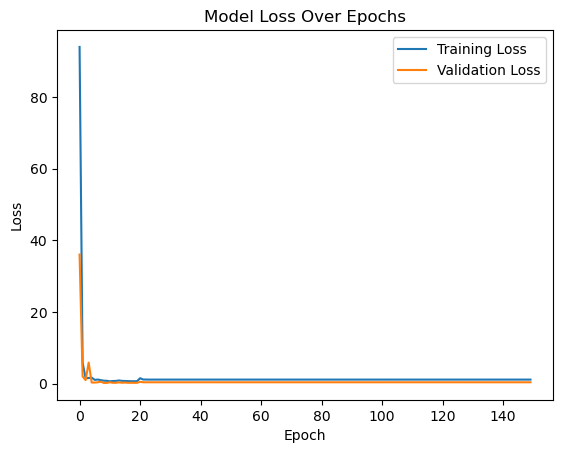

In [220]:
# Library needed to display Loss Function
import matplotlib.pyplot as plt

# Corrected access to the 'history' data stored in the History object
loss_nn_2 = nn_history_2.history['loss']
val_loss_nn_2 = nn_history_2.history['val_loss']

# Plot the loss and validation loss
plt.plot(loss_nn_2, label='Training Loss')
plt.plot(val_loss_nn_2, label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Baseline Neural Network with Early Stopping

In [221]:
# Making adjustment towards the Neural Network model to seek any improvements

# Library needed for Early Stopping of Neural Network Model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Adjusted model architecture
nn_early_model_2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_2.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

nn_early_model_2.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback
nn_early_stopping_2 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training with early stopping
nn_early_history_2 = nn_early_model_2.fit(X_train_2, y_train_2, validation_split=0.1, epochs=150, batch_size=32, callbacks=[nn_early_stopping_2], verbose=1)

# Evaluate the model
test_loss_nn_early_2 = nn_early_model_2.evaluate(X_test_2, y_test_2, verbose=0)


Epoch 1/150
329/329 [==============================] - 2s 3ms/step - loss: 6861.8691 - val_loss: 10.6248
Epoch 2/150
329/329 [==============================] - 1s 2ms/step - loss: 262.7786 - val_loss: 1.0450
Epoch 3/150
329/329 [==============================] - 1s 2ms/step - loss: 63.8557 - val_loss: 0.3828
Epoch 4/150
329/329 [==============================] - 1s 2ms/step - loss: 31.7092 - val_loss: 0.3718
Epoch 5/150
329/329 [==============================] - 1s 2ms/step - loss: 22.8028 - val_loss: 0.3680
Epoch 6/150
329/329 [==============================] - 1s 2ms/step - loss: 15.3329 - val_loss: 0.3765
Epoch 7/150
329/329 [==============================] - 1s 2ms/step - loss: 14.3615 - val_loss: 0.3728
Epoch 8/150
329/329 [==============================] - 1s 2ms/step - loss: 8.9051 - val_loss: 0.3742
Epoch 9/150
329/329 [==============================] - 1s 2ms/step - loss: 6.0884 - val_loss: 0.3745
Epoch 10/150
329/329 [==============================] - 1s 2ms/step - loss: 4.63

In [222]:
# Calculating the R2 for the Neural Network Model 2
test_pred_nn_early_2 = nn_early_model_2.predict(X_test_2)

test_mse_nn_early_2 = mean_squared_error(y_test_2, test_pred_nn_early_2)
test_rmse_nn_early_2 = np.sqrt(test_mse_nn_early_2)
print(f'RMSE Score: {test_rmse_nn_early_2}')
test_mae_nn_early_2 = mean_absolute_error(y_test_2, test_pred_nn_early_2)
print(f'RMSE Score: {test_mae_nn_early_2}')
test_r2_nn_early_2 = r2_score(y_test_2, test_pred_nn_early_2.flatten())  # use flatten() if your output has extra dimensions

print("Early Stopping Neural Network Model R2 Score:", test_r2_nn_early_2)

157/157 [==============================] - 0s 1ms/step
RMSE Score: 0.7180955082667851
RMSE Score: 0.2999755690411417
Early Stopping Neural Network Model R2 Score: 0.4254154181941824


##### Hyperparameter Tuning

In [223]:
from kerastuner import HyperModel
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

np.random.seed(99)
python_random.seed(99)
tf.random.set_seed(99)

class NeuralNetworkHyperModel_2(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
        
    def build(self, hp):
        nnht_model_2 = Sequential()
        nnht_model_2.add(Dense(
            units=hp.Int('units_1', min_value=32, max_value=512, step=32),
            activation='relu', 
            input_shape=self.input_shape
        ))
        nnht_model_2.add(Dense(
            units=hp.Int('units_2', min_value=32, max_value=256, step=32),
            activation='relu'
        ))
        nnht_model_2.add(Dense(1))  # Output layer for regression
        
        nnht_model_2.compile(
            optimizer=Adam(
                learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
            ),
            loss='mse'
        )
        return nnht_model_2


In [224]:
from kerastuner.tuners import RandomSearch

nnht_input_shape_2 = (X_train_2.shape[1],)
nnht_hypermodel_2 = NeuralNetworkHyperModel_2(input_shape=nnht_input_shape_2)

nnht_tuner_2 = RandomSearch(
    nnht_hypermodel_2,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='nnht_2c',
    project_name='nn_hypertuning_keras_2c'
)

nnht_tuner_2.search(X_train_2, y_train_2, epochs=50, validation_split=0.1)


Trial 20 Complete [00h 01m 21s]
val_loss: 0.18647294491529465

Best val_loss So Far: 0.1726779267191887
Total elapsed time: 00h 36m 42s


In [225]:
nnht_best_model_2 = nnht_tuner_2.get_best_models(num_models=1)[0]

# Evaluate the best model
test_loss_nnht_2 = nnht_best_model_2.evaluate(X_test_2, y_test_2)
print(f'Best Neural Network Test Loss: {test_loss_nnht_2}')

# Predict and calculate R² Score
test_pred_nnht_2= nnht_best_model_2.predict(X_test_2)
test_rmse_nnht_2 = np.sqrt(mean_squared_error(y_test_2, test_pred_nnht_2))
test_mae_nnht_2 = mean_absolute_error(y_test_2, test_pred_nnht_2)
test_r2_nnht_2 = r2_score(y_test_2, test_pred_nnht_2.flatten())

print(f'RMSE: {test_rmse_nnht_2}')
print(f'MAE: {test_mae_nnht_2}')
print(f'R2 Score: {test_r2_nnht_2}')


157/157 [==============================] - 0s 1ms/step - loss: 0.3699
Best Neural Network Test Loss: 0.36988264322280884
157/157 [==============================] - 0s 1ms/step
RMSE: 0.608179743994229
MAE: 0.25627659964758376
R2 Score: 0.5878517590297054


##### Hyper Model Neural Network with Early Stopping

In [226]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
nnht_early_stopping_2 = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the lowest validation loss
)

In [227]:
# Setup your tuner
nnht_early_tuner_2 = RandomSearch(
    nnht_hypermodel_2,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='nnht_early_2c',
    project_name='nn_hypertuning_earlystopping_keras_2c'
)

In [228]:
# Start the search and include early stopping
nnht_early_tuner_2.search(
    X_train_2, 
    y_train_2, 
    epochs=100, 
    validation_split=0.1, 
    callbacks=[nnht_early_stopping_2]
)

Trial 20 Complete [00h 00m 44s]
val_loss: 0.1892804354429245

Best val_loss So Far: 0.1741948276758194
Total elapsed time: 00h 13m 55s


In [229]:
# Retrieve and evaluate the best model
nnht_early_best_model_2 = nnht_early_tuner_2.get_best_models(num_models=1)[0]
test_loss_nnht_early_2 = nnht_early_best_model_2.evaluate(X_test_2, y_test_2)
test_pred_nnht_early_2 = nnht_early_best_model_2.predict(X_test_2)
test_rmse_nnht_early_2 = np.sqrt(mean_squared_error(y_test_2, test_pred_nnht_early_2))
test_mae_nnht_early_2 = mean_absolute_error(y_test_2, test_pred_nnht_early_2)
test_r2_nnht_early_2 = r2_score(y_test_2, test_pred_nnht_early_2.flatten())

# Print performance metrics
print(f'Best Neural Network Test Loss: {test_loss_nnht_early_2}')
print(f'RMSE: {test_rmse_nnht_early_2}')
print(f'MAE: {test_mae_nnht_early_2}')
print(f'R2 Score: {test_r2_nnht_early_2}')

157/157 [==============================] - 0s 1ms/step
Best Neural Network Test Loss: 0.4240342676639557
RMSE: 0.6511792233081801
MAE: 0.23497072075269212
R2 Score: 0.5275121789698175


##### Comparison

In [230]:
# Displaying the comparison through a table

nn_comparison_2 = {
    'Model': ['V2 Neural Network Baseline Model', 'V2 Neural Network Baseline Model with Early Stopping', 'V2 Neural Network Hyper Model', 'V2 Neural Network Hyper Model with Early Stopping'],
    'Model Object': [nn_model_2, nn_early_model_2, nnht_best_model_2, nnht_early_best_model_2],
    'RMSE': [test_rmse_nn_2, test_rmse_nn_early_2, test_rmse_nnht_2, test_rmse_nnht_early_2],
    'MAE': [test_mae_nn_2, test_mae_nn_early_2, test_mae_nnht_2, test_mae_nnht_early_2],
    'R-Squared Score': [test_r2_nn_2, test_r2_nn_early_2, test_r2_nnht_2, test_r2_nnht_early_2]
}

nn_comparison_2 = pd.DataFrame(nn_comparison_2)

nn_comparison_2.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
2,V2 Neural Network Hyper Model,<keras.src.engine.sequential.Sequential object...,0.608180,0.256277,0.587852
3,V2 Neural Network Hyper Model with Early Stopping,<keras.src.engine.sequential.Sequential object...,0.651179,0.234971,0.527512
1,V2 Neural Network Baseline Model with Early St...,<keras.src.engine.sequential.Sequential object...,0.718096,0.299976,0.425415
0,V2 Neural Network Baseline Model,<keras.src.engine.sequential.Sequential object...,0.947445,0.405648,-0.000224


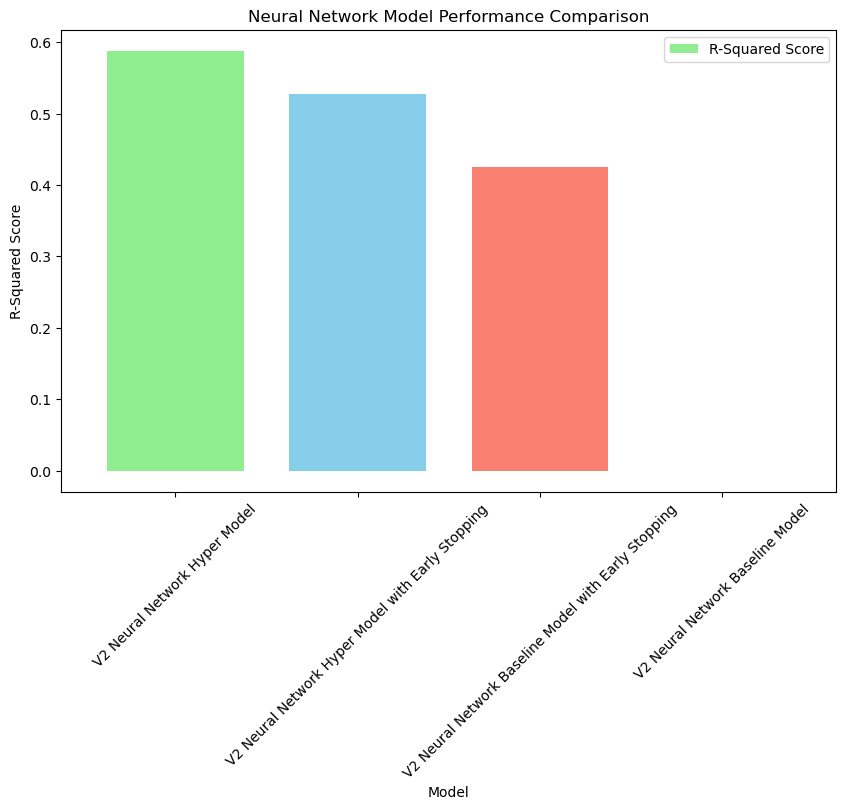

In [231]:
# Sort the DataFrame by 'R-Squared Score' in descending order
nn_comparison_2 = nn_comparison_2.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_nn_2 = ['lightgreen', 'skyblue', 'salmon', 'orange']

# Create a figure and a set of subplots
fig_nn_2, ax_nn_2 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_nn_2 = nn_comparison_2.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_nn_2,  # Apply different colors
    ax=ax_nn_2,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_nn_2.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_nn_2.set_title('Neural Network Model Performance Comparison')

# Rotate x-axis labels
ax_nn_2.set_xticklabels(ax_nn_2.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_nn_2, labels_nn_2 = ax_nn_2.get_legend_handles_labels()
ax_nn_2.legend(lines_nn_2, labels_nn_2)

# Show the plot
plt.show()

In [232]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
nn_comparison_2 = nn_comparison_2.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_nn_model_name_2 = nn_comparison_2.iloc[0]['Model']
best_nn_model_2 = nn_comparison_2.iloc[0]['Model Object']
best_nn_r2_score_2 = nn_comparison_2.iloc[0]['R-Squared Score']
best_nn_rmse_2 = nn_comparison_2.iloc[0]['RMSE']
best_nn_mae_2 = nn_comparison_2.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_nn_2 = best_nn_model_name_2

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_nn_2)
print("The highest R-Squared Score is:", best_nn_r2_score_2)
print("The best RMSE is:", best_nn_rmse_2)
print("The best MAE is:", best_nn_mae_2)

The best model based on R-Squared Score is: V2 Neural Network Hyper Model
The highest R-Squared Score is: 0.5878517590297054
The best RMSE is: 0.608179743994229
The best MAE is: 0.25627659964758376


#### 3.2.6.2. Important Features

##### Features Filtering

In [233]:
# Select features above the mean importance
best_reg_mean_importance_2 = best_reg_features_2['Importance'].mean()
best_reg_selected_features_2 = best_reg_features_2[best_reg_features_2['Importance'] > best_reg_mean_importance_2]['Feature'].values


In [234]:
# Print selected_features
best_reg_selected_features_2


array(['SQUARE FEET', 'BATHS', 'bus_station_accessibility',
       'school_accessibility', 'transit_station_accessibility'],
      dtype=object)

In [235]:
# Reduce train and test sets to selected features
X_train_selected_2 = X_train_2[best_reg_selected_features_2]
X_test_selected_2 = X_test_2[best_reg_selected_features_2]


##### Expanded Features Filtering

In [236]:
# Filter out 'SQUARE FEET' from the DataFrame
best_reg_filtered_features_2 = best_reg_features_2[best_reg_features_2['Feature'] != 'SQUARE FEET']

# Calculate the average importance of the remaining features
best_reg_filtered_mean_importance_2 = best_reg_filtered_features_2['Importance'].mean()

# Select features above the mean importance
best_reg_filtered_selected_features_2 = best_reg_filtered_features_2[best_reg_filtered_features_2['Importance'] > best_reg_filtered_mean_importance_2]['Feature'].values


In [237]:
# Assuming best_reg_filtered_selected_features_1 is a numpy array
best_reg_filtered_selected_features_2 = np.append(best_reg_filtered_selected_features_2, "SQUARE FEET")

# Print the updated list of selected features
print(best_reg_filtered_selected_features_2)

['BATHS' 'bus_station_accessibility' 'school_accessibility'
 'transit_station_accessibility' 'BEDS' 'park_accessibility'
 'preschool_accessibility' 'SQUARE FEET']


In [238]:
# Reduce train and test sets to selected features
X_train_filtered_selected_2 = X_train_2[best_reg_filtered_selected_features_2]
X_test_filtered_selected_2 = X_test_2[best_reg_filtered_selected_features_2]

##### Baseline Model

In [239]:
# Initialize the neural network model
nn_filter_model_2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_filtered_selected_2.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),  # Additional smaller dense layer
    Dense(1)  # Output layer for regression
])

# Compile the model
nn_filter_model_2.compile(optimizer=Adam(learning_rate=0.001), loss='mse')  # Using Mean Squared Error for regression


In [240]:
# Train the model
nn_filter_history_2 = nn_filter_model_2.fit(X_train_filtered_selected_2, y_train_2, epochs=100, validation_split=0.1, batch_size=32)


Epoch 1/100
329/329 [==============================] - 2s 3ms/step - loss: 186.0257 - val_loss: 7.7640
Epoch 2/100
329/329 [==============================] - 1s 2ms/step - loss: 1.6340 - val_loss: 2.3645
Epoch 3/100
329/329 [==============================] - 1s 2ms/step - loss: 1.8282 - val_loss: 2.0388
Epoch 4/100
329/329 [==============================] - 1s 2ms/step - loss: 5.7301 - val_loss: 26.6373
Epoch 5/100
329/329 [==============================] - 1s 2ms/step - loss: 12.9271 - val_loss: 1.0232
Epoch 6/100
329/329 [==============================] - 1s 2ms/step - loss: 2.9827 - val_loss: 1.5018
Epoch 7/100
329/329 [==============================] - 1s 2ms/step - loss: 2.6032 - val_loss: 64.5704
Epoch 8/100
329/329 [==============================] - 1s 2ms/step - loss: 5.7546 - val_loss: 0.9576
Epoch 9/100
329/329 [==============================] - 1s 2ms/step - loss: 2.5723 - val_loss: 0.7867
Epoch 10/100
329/329 [==============================] - 1s 2ms/step - loss: 2.3592 - v

In [241]:
# Evaluate the model on the test set
test_loss_nn_filter_2 = nn_filter_model_2.evaluate(X_test_filtered_selected_2, y_test_2)
print(f'Baseline Neural Network (Selected Features) Test Loss: {test_loss_nn_filter_2}')

# Optionally, predict and calculate R² Score
from sklearn.metrics import r2_score
test_pred_nn_filter_2 = nn_filter_model_2.predict(X_test_filtered_selected_2)
test_mse_nn_filter_2 = mean_squared_error(y_test_2, test_pred_nn_filter_2)
test_rmse_nn_filter_2 = np.sqrt(test_mse_nn_filter_2)
print(f'RMSE Score: {test_rmse_nn_filter_2}')
test_mae_nn_filter_2 = mean_absolute_error(y_test_2, test_pred_nn_filter_2)
print(f'MAE Score: {test_mae_nn_filter_2}')
test_r2_nn_filter_2 = r2_score(y_test_2, test_pred_nn_filter_2.flatten())
print(f'R2 Score: {test_r2_nn_filter_2}')

157/157 [==============================] - 0s 1ms/step - loss: 0.8975
Baseline Neural Network (Selected Features) Test Loss: 0.8974650502204895
157/157 [==============================] - 0s 1ms/step
RMSE Score: 0.9473463530738447
MAE Score: 0.4114813684737038
R2 Score: -1.6401202220128752e-05


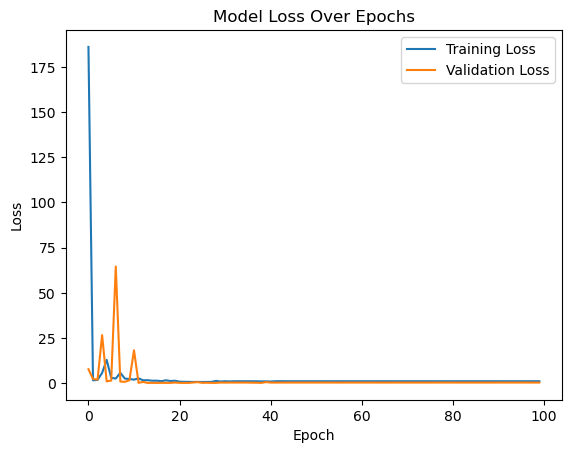

In [242]:
# Library needed to display Loss Function
import matplotlib.pyplot as plt

# Corrected access to the 'history' data stored in the History object
loss_nn_filter_2 = nn_filter_history_2.history['loss']
val_loss_nn_filter_2 = nn_filter_history_2.history['val_loss']

# Plot the loss and validation loss
plt.plot(loss_nn_filter_2, label='Training Loss')
plt.plot(val_loss_nn_filter_2, label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Neural Network Baseline Model with Early Stopping

In [243]:
# Making adjustment towards the Neural Network model to seek any improvements

# Library needed for Early Stopping of Neural Network Model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Setting random seeds to reduce the chance of variability in results
np.random.seed(123)
python_random.seed(123)
tf.random.set_seed(1234)

# Adjusted model architecture
nn_filter_early_model_2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_filtered_selected_2.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

nn_filter_early_model_2.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Early stopping callback
nn_filter_early_stopping_2 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training with early stopping
nn_filter_early_history_2 = nn_filter_early_model_2.fit(X_train_filtered_selected_2, y_train_2, validation_split=0.1, epochs=100, batch_size=32, callbacks=[nn_filter_early_stopping_2], verbose=1)

# Evaluate the model
test_loss_nn_filter_early_2 = nn_filter_early_model_2.evaluate(X_test_filtered_selected_2, y_test_2, verbose=0)


Epoch 1/100
329/329 [==============================] - 2s 3ms/step - loss: 22308.6621 - val_loss: 171.7222
Epoch 2/100
329/329 [==============================] - 1s 2ms/step - loss: 9412.5146 - val_loss: 1005.1261
Epoch 3/100
329/329 [==============================] - 1s 2ms/step - loss: 5013.4531 - val_loss: 1537.4490
Epoch 4/100
329/329 [==============================] - 1s 2ms/step - loss: 3201.3330 - val_loss: 314.0462
Epoch 5/100
329/329 [==============================] - 1s 2ms/step - loss: 2139.6604 - val_loss: 64.6050
Epoch 6/100
329/329 [==============================] - 1s 2ms/step - loss: 1496.3577 - val_loss: 8.3258
Epoch 7/100
329/329 [==============================] - 1s 2ms/step - loss: 1148.7086 - val_loss: 0.6701
Epoch 8/100
329/329 [==============================] - 1s 2ms/step - loss: 775.2094 - val_loss: 1.2713
Epoch 9/100
329/329 [==============================] - 1s 2ms/step - loss: 565.2891 - val_loss: 0.8414
Epoch 10/100
329/329 [==============================] 

In [244]:
# Calculating the R2 for the Neural Network Model 2
test_pred_nn_filter_early_2 = nn_filter_early_model_2.predict(X_test_filtered_selected_2)

test_mse_nn_filter_early_2 = mean_squared_error(y_test_2, test_pred_nn_filter_early_2)
test_rmse_nn_filter_early_2 = np.sqrt(test_mse_nn_filter_early_2)
print(f'RMSE Score: {test_rmse_nn_filter_early_2}')
test_mae_nn_filter_early_2 = mean_absolute_error(y_test_2, test_pred_nn_filter_early_2)
print(f'RMSE Score: {test_mae_nn_filter_early_2}')
test_r2_nn_filter_early_2 = r2_score(y_test_2, test_pred_nn_filter_early_2.flatten())  # use flatten() if your output has extra dimensions

print("Early Stopping Neural Network Model R2 Score:", test_r2_nn_filter_early_2)

157/157 [==============================] - 0s 1ms/step
RMSE Score: 0.9003540215678173
RMSE Score: 0.4249744412840203
Early Stopping Neural Network Model R2 Score: 0.09673295582729391


##### Hyperparameter Tuning

In [245]:
from kerastuner import HyperModel
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

class NeuralNetworkHyperModel_filter_2(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
        
    def build(self, hp):
        nnht_filter_model_2 = Sequential()
        nnht_filter_model_2.add(Dense(
            units=hp.Int('units_1', min_value=32, max_value=512, step=32),
            activation='relu', 
            input_shape=self.input_shape
        ))
        nnht_filter_model_2.add(Dense(
            units=hp.Int('units_2', min_value=32, max_value=256, step=32),
            activation='relu'
        ))
        nnht_filter_model_2.add(Dense(1))  # Output layer for regression
        
        nnht_filter_model_2.compile(
            optimizer=Adam(
                learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
            ),
            loss='mse'
        )
        return nnht_filter_model_2


In [246]:
# Check the shape of your input data
print("Shape of X_train_2:", X_train_2.shape)


Shape of X_train_2: (11664, 14)


In [247]:
from kerastuner.tuners import RandomSearch

nnht_filter_input_shape_2 = (X_train_filtered_selected_2.shape[1],)
nnht_filter_hypermodel_2 = NeuralNetworkHyperModel_filter_2(input_shape=nnht_filter_input_shape_2)

nnht_filter_tuner_2 = RandomSearch(
    nnht_filter_hypermodel_2,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='nnht_filter_2c',
    project_name='nn_filter_hypertuning_keras_2c'
)

nnht_filter_tuner_2.search(X_train_filtered_selected_2, y_train_2, epochs=100, validation_split=0.1)


Trial 20 Complete [00h 03m 06s]
val_loss: 0.16142939776182175

Best val_loss So Far: 0.1456766128540039
Total elapsed time: 01h 07m 51s


In [248]:
nnht_filter_best_model_2 = nnht_filter_tuner_2.get_best_models(num_models=1)[0]

# Evaluate the best model
test_loss_nnht_filter_2 = nnht_filter_best_model_2.evaluate(X_test_filtered_selected_2, y_test_2)
print(f'Best Neural Network Test Loss: {test_loss_nnht_2}')

# Predict and calculate R² Score
test_pred_nnht_filter_2 = nnht_filter_best_model_2.predict(X_test_filtered_selected_2)
test_rmse_nnht_filter_2 = np.sqrt(mean_squared_error(y_test_2, test_pred_nnht_filter_2))
test_mae_nnht_filter_2 = mean_absolute_error(y_test_2, test_pred_nnht_filter_2)
test_r2_nnht_filter_2 = r2_score(y_test_2, test_pred_nnht_filter_2.flatten())

print(f'RMSE: {test_rmse_nnht_filter_2}')
print(f'MAE: {test_mae_nnht_filter_2}')
print(f'R2 Score: {test_r2_nnht_filter_2}')


157/157 [==============================] - 1s 3ms/step - loss: 0.3215
Best Neural Network Test Loss: 0.36988264322280884
157/157 [==============================] - 1s 2ms/step
RMSE: 0.5670402689380399
MAE: 0.2177329307741225
R2 Score: 0.6417243014701659


##### Hyper Model with Early Stopping

In [249]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
nnht_filter_early_stopping_2 = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the lowest validation loss
)

In [250]:
# Setup your tuner
nnht_filter_early_tuner_2 = RandomSearch(
    nnht_filter_hypermodel_2,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='nnht_filter_early_2c',
    project_name='nn_filter_hypertuning_earlystopping_keras_2c'
)

In [251]:
# Start the search and include early stopping
nnht_filter_early_tuner_2.search(
    X_train_filtered_selected_2, 
    y_train_2, 
    epochs=100, 
    validation_split=0.1, 
    callbacks=[nnht_filter_early_stopping_2]
)

Trial 20 Complete [00h 00m 51s]
val_loss: 0.22737106680870056

Best val_loss So Far: 0.1799105480313301
Total elapsed time: 00h 18m 25s


In [252]:
# Retrieve and evaluate the best model
nnht_filter_early_best_model_2 = nnht_filter_early_tuner_2.get_best_models(num_models=1)[0]
test_loss_nnht_filter_early_2 = nnht_filter_early_best_model_2.evaluate(X_test_filtered_selected_2, y_test_2)
test_pred_nnht_filter_early_2 = nnht_filter_early_best_model_2.predict(X_test_filtered_selected_2)
test_rmse_nnht_filter_early_2 = np.sqrt(mean_squared_error(y_test_2, test_pred_nnht_filter_early_2))
test_mae_nnht_filter_early_2 = mean_absolute_error(y_test_2, test_pred_nnht_filter_early_2)
test_r2_nnht_filter_early_2 = r2_score(y_test_2, test_pred_nnht_filter_early_2.flatten())

# Print performance metrics
print(f'Best Neural Network Test Loss: {test_loss_nnht_filter_early_2}')
print(f'RMSE: {test_rmse_nnht_filter_early_2}')
print(f'MAE: {test_mae_nnht_filter_early_2}')
print(f'R2 Score: {test_r2_nnht_filter_early_2}')

157/157 [==============================] - 0s 2ms/step
Best Neural Network Test Loss: 0.4586000442504883
RMSE: 0.6772002732025926
MAE: 0.2487112151684938
R2 Score: 0.4889965914666282


##### Comparison

In [253]:
# Displaying the comparison through a table

nn_filter_comparison_2 = {
    'Model': ['V2 Neural Network (Filtered Features) Baseline Model', 'V2 Neural Network (Filtered Features) Baseline Model with Early Stopping', 'V2 Neural Network (Filtered Features) Hyper Model', 'V2 Neural Network (Filtered Features) Hyper Model with Early Stopping'],
    'Model Object': [nn_filter_model_2, nn_filter_early_model_2, nnht_filter_best_model_2, nnht_filter_early_best_model_2],
    'RMSE': [test_rmse_nn_filter_2, test_rmse_nn_filter_early_2, test_rmse_nnht_filter_2, test_rmse_nnht_filter_early_2],
    'MAE': [test_mae_nn_filter_2, test_mae_nn_filter_early_2, test_mae_nnht_filter_2, test_mae_nnht_filter_early_2],
    'R-Squared Score': [test_r2_nn_filter_2, test_r2_nn_filter_early_2, test_r2_nnht_filter_2, test_r2_nnht_filter_early_2]
}

nn_filter_comparison_2 = pd.DataFrame(nn_filter_comparison_2)

nn_filter_comparison_2.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
2,V2 Neural Network (Filtered Features) Hyper Model,<keras.src.engine.sequential.Sequential object...,0.567040,0.217733,0.641724
3,V2 Neural Network (Filtered Features) Hyper Mo...,<keras.src.engine.sequential.Sequential object...,0.677200,0.248711,0.488997
1,V2 Neural Network (Filtered Features) Baseline...,<keras.src.engine.sequential.Sequential object...,0.900354,0.424974,0.096733
0,V2 Neural Network (Filtered Features) Baseline...,<keras.src.engine.sequential.Sequential object...,0.947346,0.411481,-0.000016


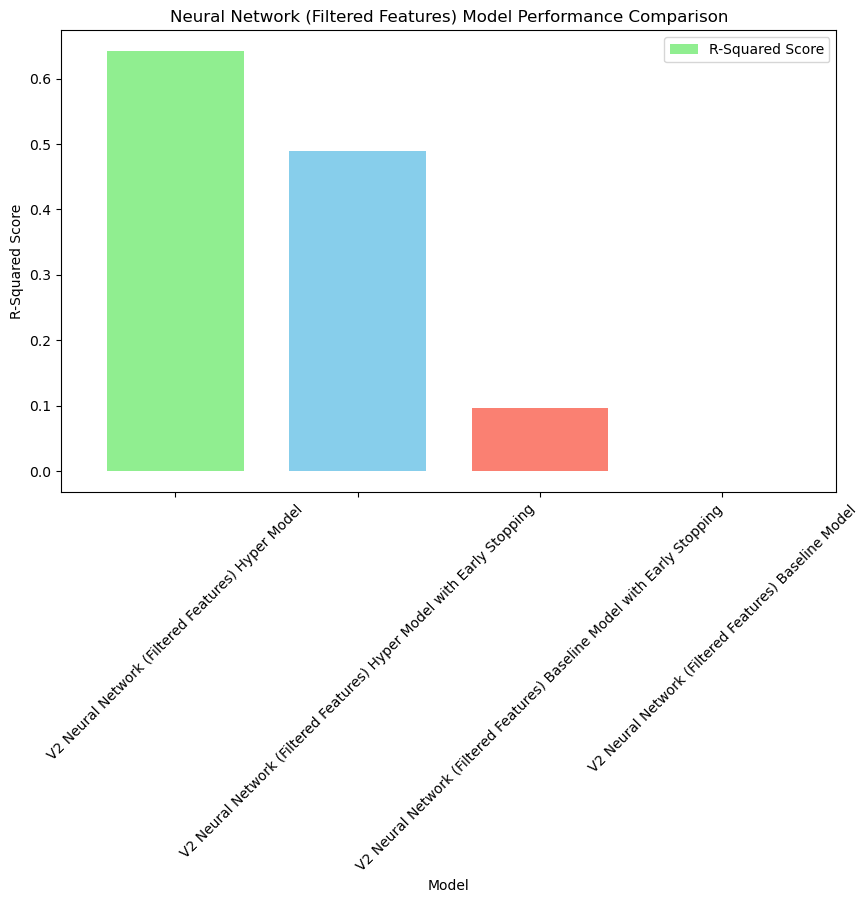

In [254]:
# Sort the DataFrame by 'R-Squared Score' in descending order
nn_filter_comparison_2 = nn_filter_comparison_2.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_nn_filter_2 = ['lightgreen', 'skyblue', 'salmon', 'orange']

# Create a figure and a set of subplots
fig_nn_filter_2, ax_nn_filter_2 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_nn_filter_2 = nn_filter_comparison_2.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_nn_filter_2,  # Apply different colors
    ax=ax_nn_filter_2,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_nn_filter_2.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_nn_filter_2.set_title('Neural Network (Filtered Features) Model Performance Comparison')

# Rotate x-axis labels
ax_nn_filter_2.set_xticklabels(ax_nn_filter_2.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_nn_filter_2, labels_nn_filter_2 = ax_nn_filter_2.get_legend_handles_labels()
ax_nn_filter_2.legend(lines_nn_filter_2, labels_nn_filter_2)

# Show the plot
plt.show()

In [255]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
nn_filter_comparison_2 = nn_filter_comparison_2.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_nn_filter_model_name_2 = nn_filter_comparison_2.iloc[0]['Model']
best_nn_filter_model_2 = nn_filter_comparison_2.iloc[0]['Model Object']
best_nn_filter_r2_score_2 = nn_filter_comparison_2.iloc[0]['R-Squared Score']
best_nn_filter_rmse_2 = nn_filter_comparison_2.iloc[0]['RMSE']
best_nn_filter_mae_2 = nn_filter_comparison_2.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_nn_filter_2 = best_nn_filter_model_name_2

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_nn_filter_2)
print("The highest R-Squared Score is:", best_nn_filter_r2_score_2)
print("The best RMSE is:", best_nn_filter_rmse_2)
print("The best MAE is:", best_nn_filter_mae_2)

The best model based on R-Squared Score is: V2 Neural Network (Filtered Features) Hyper Model
The highest R-Squared Score is: 0.6417243014701659
The best RMSE is: 0.5670402689380399
The best MAE is: 0.2177329307741225


#### 3.2.6.3. Neural Network Model Comparison

In [256]:
# Displaying the comparison through a table

nn_all_comparison_2 = {
    'Model': [best_nn_model_name_2, best_nn_filter_model_name_2],
    'Model Object': [best_nn_model_2, best_nn_filter_model_2],
    'RMSE': [best_nn_rmse_2, best_nn_filter_rmse_2],
    'MAE': [best_nn_mae_2, best_nn_filter_mae_2],
    'R-Squared Score': [best_nn_r2_score_2, best_nn_filter_r2_score_2]
}

nn_all_comparison_2 = pd.DataFrame(nn_all_comparison_2)

nn_all_comparison_2.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
1,V2 Neural Network (Filtered Features) Hyper Model,<keras.src.engine.sequential.Sequential object...,0.56704,0.217733,0.641724
0,V2 Neural Network Hyper Model,<keras.src.engine.sequential.Sequential object...,0.60818,0.256277,0.587852


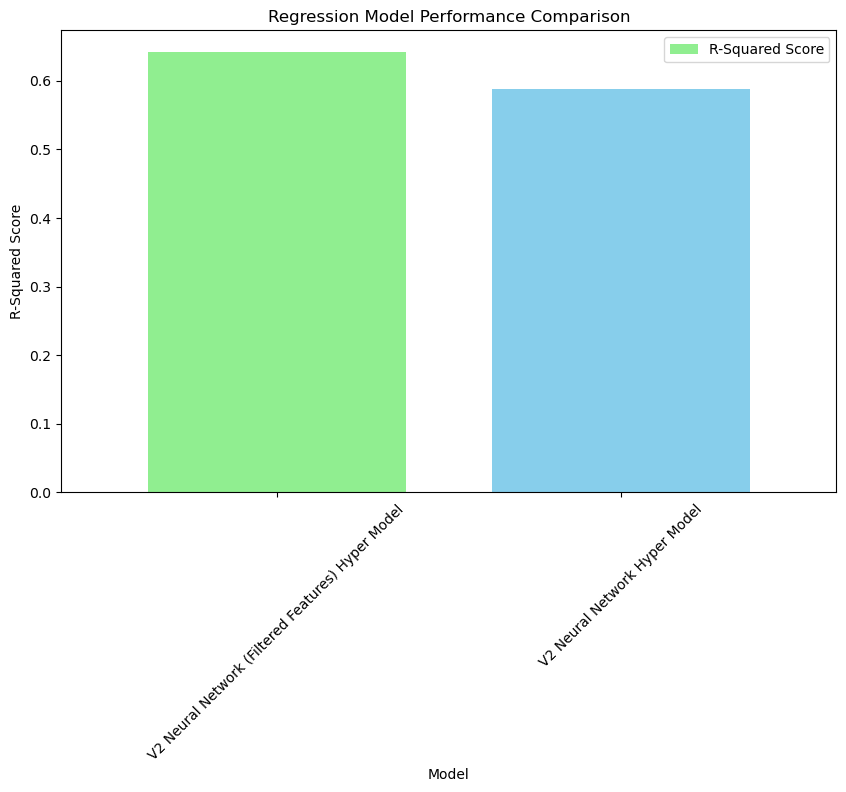

In [257]:
# Sort the DataFrame by 'R-Squared Score' in descending order
nn_all_comparison_2 = nn_all_comparison_2.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_nn_all_2 = ['lightgreen', 'skyblue', 'salmon']

# Create a figure and a set of subplots
fig_nn_all_2, ax_nn_all_2 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_nn_all_2 = nn_all_comparison_2.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_nn_all_2,  # Apply different colors
    ax=ax_nn_all_2,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_nn_all_2.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_nn_all_2.set_title('Regression Model Performance Comparison')

# Rotate x-axis labels
ax_nn_all_2.set_xticklabels(ax_nn_all_2.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_nn_all_2, labels_nn_all_2 = ax_nn_all_2.get_legend_handles_labels()
ax_nn_all_2.legend(lines_nn_all_2, labels_nn_all_2)

# Show the plot
plt.show()

In [258]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
nn_all_comparison_2 = nn_all_comparison_2.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_nn_all_model_name_2 = nn_all_comparison_2.iloc[0]['Model']
best_nn_all_model_2 = nn_all_comparison_2.iloc[0]['Model Object']
best_nn_all_r2_score_2 = nn_all_comparison_2.iloc[0]['R-Squared Score']
best_nn_all_rmse_2 = nn_all_comparison_2.iloc[0]['RMSE']
best_nn_all_mae_2 = nn_all_comparison_2.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_nn_all_2 = best_nn_all_model_name_2

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_nn_all_2)
print("The highest R-Squared Score is:", best_nn_all_r2_score_2)
print("The best RMSE is:", best_nn_all_rmse_2)
print("The best MAE is:", best_nn_all_mae_2)

The best model based on R-Squared Score is: V2 Neural Network (Filtered Features) Hyper Model
The highest R-Squared Score is: 0.6417243014701659
The best RMSE is: 0.5670402689380399
The best MAE is: 0.2177329307741225


#### 3.2.6.4. Neural Network Feature Importance

In [259]:
# # Check the model input expectation
# print("Model input shape:", best_nn_all_model_1.input_shape)
# print("Background data shape:", best_nn_all_background_1.shape)

In [260]:
# import shap

# # Create a background dataset (can be a small random sample of the training set)
# background = X_train_1.iloc[:100].values  # Adjust the slice size as needed

# # KernelExplainer works with any model, as it uses a model-agnostic approach
# explainer = shap.KernelExplainer(nnht_best_model_1.predict, shap.sample(X_train_1, 100))  # Using a sample of the training data as background
# shap_values = explainer.shap_values(X_test_1[:100], nsamples=100)  # You can adjust the number of samples

# # Summary plot for the subset of features
# shap.summary_plot(shap_values, X_test_1[:100], feature_names=X_test_1.columns[:100])

In [261]:
# # Summary plot for the subset of features
# shap.summary_plot(shap_values, X_test_1[:100], feature_names=X_test_1.columns[:100])

### 3.2.7. All Model Comparison

In [262]:
# Displaying the comparison through a table

model_comparison_2 = {
    'Model': [best_reg_model_name_2, best_nn_all_model_name_2],
    'Model Object': [best_reg_model_2, best_nn_all_model_2],
    'RMSE': [best_reg_rmse_2, best_nn_all_rmse_2],
    'MAE': [best_reg_mae_2, best_nn_all_mae_2],
    'R-Squared Score': [best_reg_r2_score_2, best_nn_all_r2_score_2]
}

model_comparison_2 = pd.DataFrame(model_comparison_2)

model_comparison_2.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
0,V2 Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",0.49903,0.111467,0.722513
1,V2 Neural Network (Filtered Features) Hyper Model,<keras.src.engine.sequential.Sequential object...,0.56704,0.217733,0.641724


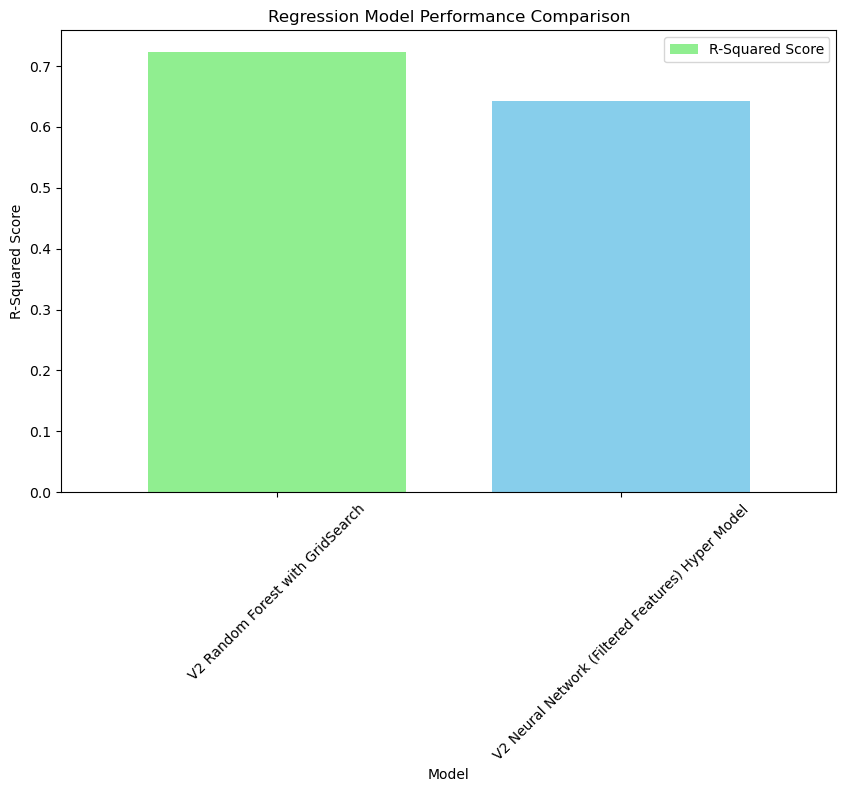

In [263]:
# Sort the DataFrame by 'R-Squared Score' in descending order
model_comparison_2 = model_comparison_2.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_model_2 = ['lightgreen', 'skyblue', 'salmon']

# Create a figure and a set of subplots
fig_model_2, ax_model_2 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_model_2 = model_comparison_2.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_model_2,  # Apply different colors
    ax=ax_model_2,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_model_2.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_model_2.set_title('Regression Model Performance Comparison')

# Rotate x-axis labels
ax_model_2.set_xticklabels(ax_model_2.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_model_2, labels_model_2 = ax_model_2.get_legend_handles_labels()
ax_model_2.legend(lines_model_2, labels_model_2)

# Show the plot
plt.show()

In [264]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
model_comparison_2 = model_comparison_2.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_model_name_2 = model_comparison_2.iloc[0]['Model']
best_model_2 = model_comparison_2.iloc[0]['Model Object']
best_r2_score_2 = model_comparison_2.iloc[0]['R-Squared Score']
best_rmse_2 = model_comparison_2.iloc[0]['RMSE']
best_mae_2 = model_comparison_2.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_model_name__2 = best_model_name_2

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_model_name__2)
print("The highest R-Squared Score is:", best_r2_score_2)
print("The best RMSE is:", best_rmse_2)
print("The best MAE is:", best_mae_2)

The best model based on R-Squared Score is: V2 Random Forest with GridSearch
The highest R-Squared Score is: 0.7225133174763751
The best RMSE is: 0.49902959070458486
The best MAE is: 0.11146731804645911


## 3.3. Version 3

### 3.3.1. Linear Regression Model (LRM)

#### 3.3.1.1. Baseline Model

In [265]:
# RMSE Analysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define the model
model_lrm_3 = LinearRegression()

# Train the model
model_lrm_3.fit(X_train_3, y_train_3)

# Predict on the testing set
y_pred_lrm_3 = model_lrm_3.predict(X_test_3)

# Evaluating Model
train_r2_lrm_3 = model_lrm_3.score(X_train_3, y_train_3)
test_r2_lrm_3 = r2_score(y_test_3,y_pred_lrm_3)
test_mse_lrm_3 = mean_squared_error(y_test_3, y_pred_lrm_3)
test_rmse_lrm_3 = test_mse_lrm_3 ** 0.5
test_mae_lrm_3 = mean_absolute_error(y_test_3, y_pred_lrm_3)


In [266]:
# Evaluate the model
print(f"R-Squared score on Training set for Linear Regression Model (LRM): {train_r2_lrm_3}")
print(f"R-Squared score on test set for Linear Regression Model (LRM): {test_r2_lrm_3}")
print(f"Mean Absolute Error (MAE) for the Linear Regression Model (LRM): {test_mae_lrm_3}")
print(f"Root Mean Squared Error (RMSE) for the Linear Regression Model (LRM): {test_rmse_lrm_3}")


R-Squared score on Training set for Linear Regression Model (LRM): 0.4694238669477734
R-Squared score on test set for Linear Regression Model (LRM): 0.5282764911152034
Mean Absolute Error (MAE) for the Linear Regression Model (LRM): 426703.9975543517
Root Mean Squared Error (RMSE) for the Linear Regression Model (LRM): 952138.2716816397


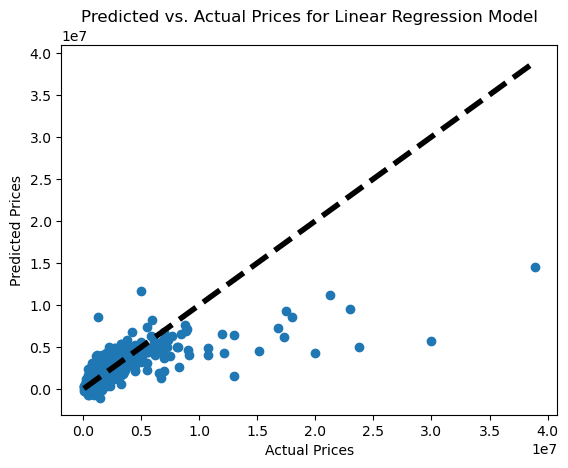

In [267]:
# Predicted vs Actual values
import matplotlib.pyplot as plt

plt.scatter(y_test_3, y_pred_lrm_3)
plt.title('Predicted vs. Actual Prices for Linear Regression Model')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test_3.min(), y_test_3.max()], [y_test_3.min(), y_test_3.max()], 'k--', lw=4)
plt.show()


#### 3.3.1.2. Cross-Validation Model

In [268]:
# Cross-validation
from sklearn.model_selection import cross_val_score

mse_lrm_cv_3 = cross_val_score(model_lrm_3, data_3.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                             data_3['PRICE'], scoring='neg_mean_squared_error', cv=5)
r2_lrm_cv_3 = cross_val_score(model_lrm_3, data_3.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                            data_3['PRICE'], scoring='r2', cv=5)
mae_lrm_cv_3 = cross_val_score(model_lrm_3, data_3.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                               data_3['PRICE'], scoring='neg_mean_absolute_error', cv=5)
rmse_lrm_cv_3 = np.sqrt(-mse_lrm_cv_3)

# Evaluate the Model
avg_rmse_lrm_cv_3 = rmse_lrm_cv_3.mean()
std_rmse_lrm_cv_3 = rmse_lrm_cv_3.std()
avg_r2_lrm_cv_3 = r2_lrm_cv_3.mean()
avg_mae_lrm_cv_3 = mae_lrm_cv_3.mean()


In [269]:
print(f"RMSE for Linear Regression Model (LRM) with Cross-Validation: {avg_rmse_lrm_cv_3}")
print(f"MAE for Linear Regression Model (LRM) with Cross-Validation: {avg_mae_lrm_cv_3}")
print(f"R2 Score for Linear Regression Model (LRM) with Cross-Validation: {avg_r2_lrm_cv_3}")
print(f"Standard deviation for Linear Regression Model (LRM): {std_rmse_lrm_cv_3}")


RMSE for Linear Regression Model (LRM) with Cross-Validation: 948273.6262561564
MAE for Linear Regression Model (LRM) with Cross-Validation: -459613.58450841886
R2 Score for Linear Regression Model (LRM) with Cross-Validation: 0.159577080800878
Standard deviation for Linear Regression Model (LRM): 739378.0433210701


#### 3.3.1.3. Modification of Linear Regression into a Ridge Regression

In [270]:
scaler = StandardScaler()
x_train_scaled_3 = scaler.fit_transform(X_train_3)
x_test_scaled_3 = scaler.transform(X_test_3)

# Stating the model for Ridge Regression
ridge_model_3 = Ridge(alpha=1.0)

ridge_model_3.fit(x_train_scaled_3, y_train_3)
ridge_pred_3 = ridge_model_3.predict(x_test_scaled_3)

In [271]:
# Calculate metrics
test_mse_ridge_3 = mean_squared_error(y_test_3, ridge_pred_3)
test_rmse_ridge_3 = np.sqrt(test_mse_ridge_3)
test_mae_ridge_3 = mean_absolute_error(y_test_3, ridge_pred_3)
test_r2_ridge_3 = r2_score(y_test_3, ridge_pred_3)

print(f"Mean Squared Error: {test_mse_ridge_3}")
print(f"Root Mean Squared Error (RMSE): {test_rmse_ridge_3}")
print(f"Mean Absolute Error (MAE): {test_rmse_ridge_3}")
print(f"R² Score: {test_r2_ridge_3}")

Mean Squared Error: 906557060159.6685
Root Mean Squared Error (RMSE): 952132.9004711834
Mean Absolute Error (MAE): 952132.9004711834
R² Score: 0.528281813281473


#### 3.3.1.4. Cross-Validation Model (Ridge Regression)

In [272]:
# Cross-validation
from sklearn.model_selection import cross_val_score

mse_ridge_cv_3 = cross_val_score(ridge_model_3, data_3.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                             data_3['PRICE'], scoring='neg_mean_squared_error', cv=5)
r2_ridge_cv_3 = cross_val_score(ridge_model_3, data_3.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                            data_3['PRICE'], scoring='r2', cv=5)
mae_ridge_cv_3 = cross_val_score(ridge_model_3, data_3.drop(['PRICE', 'PROPERTY TYPE', 'SALE TYPE', 'SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOT SIZE', 'NEIGHBORHOOD', 'LOCATION', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'lat', 'long'], axis=1),
                               data_3['PRICE'], scoring='neg_mean_absolute_error', cv=5)
rmse_ridge_cv_3 = np.sqrt(-mse_ridge_cv_3)


# Evaluate the Model
avg_rmse_ridge_cv_3 = rmse_ridge_cv_3.mean()
std_rmse_ridge_cv_3 = rmse_ridge_cv_3.std()
avg_r2_ridge_cv_3 = r2_ridge_cv_3.mean()
avg_mae_ridge_cv_3 = mae_ridge_cv_3.mean()


In [273]:
print(f"RMSE for Linear Regression Model (LRM) with Cross-Validation: {avg_rmse_ridge_cv_3}")
print(f"R2 Score for Linear Regression Model (LRM) with Cross-Validation: {avg_r2_ridge_cv_3}")
print(f"R2 Score for Mean Absolute Error (MAE) with Cross-Validation: {avg_mae_ridge_cv_3}")
print(f"Standard deviation for Linear Regression Model (LRM): {std_rmse_ridge_cv_3}")

RMSE for Linear Regression Model (LRM) with Cross-Validation: 948215.3171121568
R2 Score for Linear Regression Model (LRM) with Cross-Validation: 0.1597972296870971
R2 Score for Mean Absolute Error (MAE) with Cross-Validation: -459555.7088387298
Standard deviation for Linear Regression Model (LRM): 739452.8479211546


#### 3.3.1.5. Hyperparameter Tuning using GridSearch (Ridge Regression)

In [274]:
# Setup the hyperparameter grid
param_grid_3 = {'alpha': [0.1, 1, 10, 100, 1000]}  # alpha is the regularization strength

# Setup the GridSearchCV object
ridge_grid_search_3 = GridSearchCV(estimator=ridge_model_3, param_grid=param_grid_3, scoring='neg_mean_squared_error', cv=5, verbose=1)

# Train the model with grid search
ridge_grid_search_3.fit(X_train_3, y_train_3)

# Best model after grid search
ridge_best_model_3 = ridge_grid_search_3.best_estimator_

# Predict on the testing set using the best model
y_pred_ridge_best_3 = ridge_best_model_3.predict(X_test_3)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [275]:
# Evaluating Model
train_r2_ridge_grid_3 = ridge_best_model_3.score(X_train_3, y_train_3)
test_r2_ridge_grid_3 = r2_score(y_test_3, y_pred_ridge_best_3)
test_mse_ridge_grid_3 = mean_squared_error(y_test_3, y_pred_ridge_best_3)
test_rmse_ridge_grid_3 = test_mse_ridge_grid_3 ** 0.5
test_mae_ridge_grid_3 = mean_absolute_error(y_test_3, y_pred_ridge_best_3)

In [276]:
print("Best Alpha:", ridge_grid_search_3.best_params_)
print("Best RMSE:", test_rmse_ridge_grid_3)
print("Train R^2:", train_r2_ridge_grid_3)
print("Test R^2:", test_r2_ridge_grid_3)
print("Test MAE:", test_mae_ridge_grid_3)

Best Alpha: {'alpha': 100}
Best RMSE: 951889.8867802016
Train R^2: 0.46920983706637487
Test R^2: 0.5285225766214166
Test MAE: 420263.6409076796


#### 3.3.1.6. Linear Regression model Comparison

In [277]:
# Displaying the comparison through a table

linear_comparison_3 = {
    'Model': ['V3 Linear Regression', 'V3 Linear Regression with CV', 'V3 Ridge Regression', 'V3 Ridge Regression with CV', 'V3 Ridge Regression with GridSearch'],
    'Model Object': [model_lrm_3, model_lrm_3, ridge_model_3, ridge_model_3, ridge_best_model_3],
    'RMSE': [test_rmse_lrm_3, avg_rmse_lrm_cv_3, test_rmse_ridge_3, avg_rmse_ridge_cv_3, test_rmse_ridge_grid_3],
    'MAE': [test_mae_lrm_3, avg_mae_lrm_cv_3, test_mae_ridge_3, avg_mae_ridge_cv_3, test_mae_ridge_grid_3],
    'R-Squared Score': [test_r2_lrm_3, avg_r2_lrm_cv_3, test_r2_ridge_3, avg_r2_ridge_cv_3, test_r2_ridge_grid_3]
}

linreg_comparison_3 = pd.DataFrame(linear_comparison_3)

linreg_comparison_3.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
4,V3 Ridge Regression with GridSearch,Ridge(alpha=100),951889.886780,420263.640908,0.528523
2,V3 Ridge Regression,Ridge(),952132.900471,426634.536260,0.528282
0,V3 Linear Regression,LinearRegression(),952138.271682,426703.997554,0.528276
3,V3 Ridge Regression with CV,Ridge(),948215.317112,-459555.708839,0.159797
1,V3 Linear Regression with CV,LinearRegression(),948273.626256,-459613.584508,0.159577


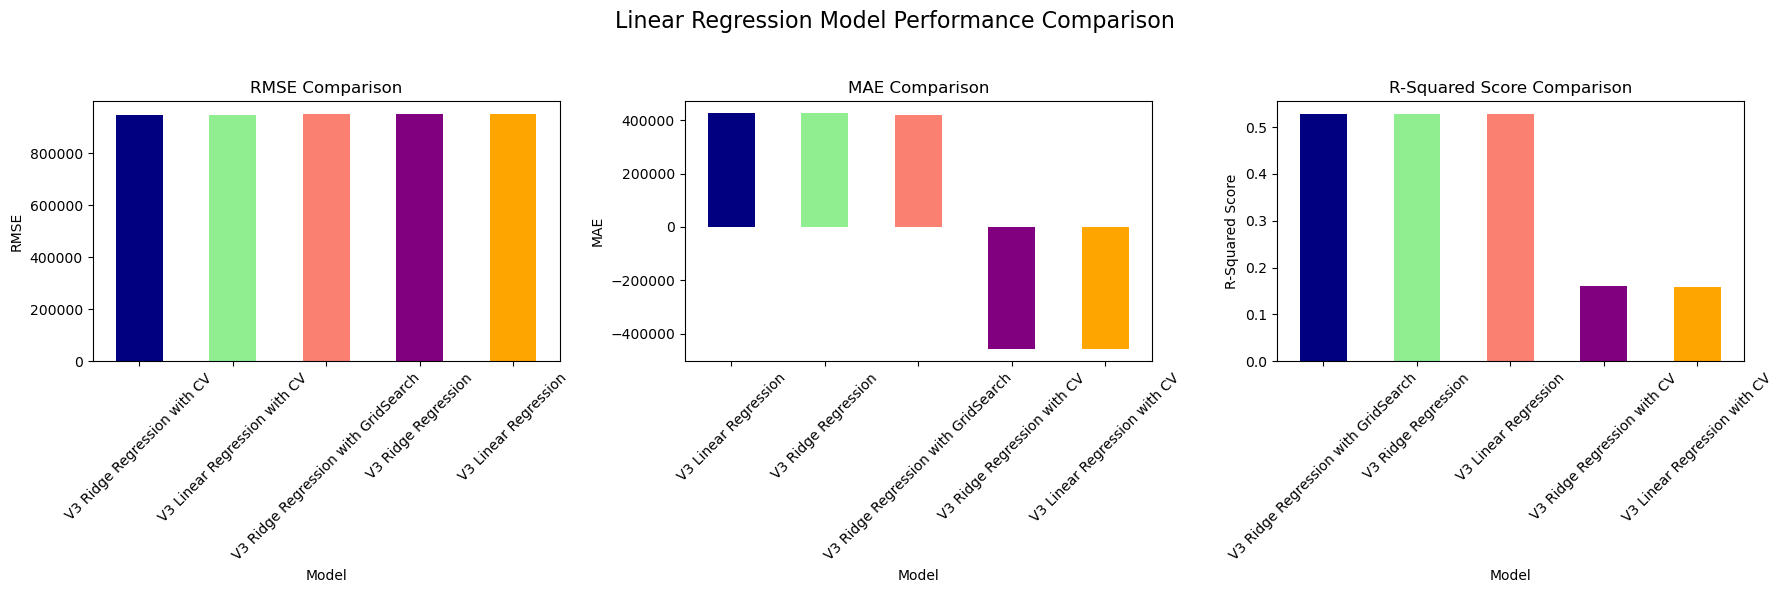

In [278]:
# Define a list of colors, one for each model
colors_linreg_3 = ['navy', 'lightgreen', 'salmon', 'purple', 'orange']

# Create a figure with 3 subplots, one for each score, laid out horizontally
fig_linreg_3, ax_linreg_3 = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the figure size as needed

# Plot RMSE
linreg_comparison_3.sort_values('RMSE', ascending=True).plot(
    kind='bar',
    x='Model',
    y='RMSE',
    ax=ax_linreg_3[0],
    color=colors_linreg_3,
    legend=False,
    title='RMSE Comparison'
)
ax_linreg_3[0].set_ylabel('RMSE')
ax_linreg_3[0].set_xticklabels(ax_linreg_3[0].get_xticklabels(), rotation=45)

# Plot MAE
linreg_comparison_3.sort_values('MAE', ascending=False).plot(
    kind='bar',
    x='Model',
    y='MAE',
    ax=ax_linreg_3[1],
    color=colors_linreg_3,
    legend=False,
    title='MAE Comparison'
)
ax_linreg_3[1].set_ylabel('MAE')
ax_linreg_3[1].set_xticklabels(ax_linreg_3[1].get_xticklabels(), rotation=45)

# Plot R-Squared Score
linreg_comparison_3.sort_values('R-Squared Score', ascending=False).plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    ax=ax_linreg_3[2],
    color=colors_linreg_3,
    legend=False,
    title='R-Squared Score Comparison'
)
ax_linreg_3[2].set_ylabel('R-Squared Score')
ax_linreg_3[2].set_xticklabels(ax_linreg_3[2].get_xticklabels(), rotation=45)

# Set overall plot title
fig_linreg_3.suptitle('Linear Regression Model Performance Comparison', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect parameters as needed for the title to fit

# Show the plot
plt.show()

#### 3.3.1.7. Choosing Best Model

In [279]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
sorted_linreg_model_3 = linreg_comparison_3.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_linreg_model_name_3 = sorted_linreg_model_3.iloc[0]['Model']
best_linreg_model_3 = sorted_linreg_model_3.iloc[0]['Model Object']
best_linreg_r2_score_3 = sorted_linreg_model_3.iloc[0]['R-Squared Score']
best_linreg_rmse_3 = sorted_linreg_model_3.iloc[0]['RMSE']
best_linreg_mae_3 = sorted_linreg_model_3.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_linreg_3 = best_linreg_model_name_3

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_linreg_3)
print("R-Squared Score is:", best_linreg_r2_score_3)
print("RMSE Score is:", best_linreg_rmse_3)
print("MAE Score is:", best_linreg_mae_3)

The best model based on R-Squared Score is: V3 Ridge Regression with GridSearch
R-Squared Score is: 0.5285225766214166
RMSE Score is: 951889.8867802016
MAE Score is: 420263.6409076796


### 3.3.2. XGBoost Model (XGB)

#### 3.3.2.1. Baseline Model

In [280]:
# Uploading XGBoost library
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the model
model_xgb_3 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10000, learning_rate=0.01, random_state=42)

# Train the model on the training data
model_xgb_3.fit(X_train_3, y_train_3)

# Predict on the testing set
y_pred_xgb_3 = model_xgb_3.predict(X_test_3)

# Evaluate Model
train_r2_xgb_3 = model_xgb_3.score(X_train_3, y_train_3)
test_r2_xgb1_3 = r2_score(y_test_3,y_pred_xgb_3)
test_rmse_xgb_3 = np.sqrt(mean_squared_error(y_test_3, y_pred_xgb_3))
test_mae_xgb_3 = mean_absolute_error(y_test_3, y_pred_xgb_3)  # Calculate MAE


In [281]:
# Printing the results of the XGBoost Model
print(f"R2 Score on Training set for XGBoost Model (LRM): {train_r2_xgb_3}")
print(f"R2 Score on Test set for XGBoost Model (LRM): {test_r2_xgb1_3}")
print(f"RMSE on Test set for XGBoost Model (LRM): {test_rmse_xgb_3}")
print(f"MAE on Test set for XGBoost Model (LRM): {test_mae_xgb_3}")


R2 Score on Training set for XGBoost Model (LRM): 0.9986302968330778
R2 Score on Test set for XGBoost Model (LRM): 0.6408558305487894
RMSE on Test set for XGBoost Model (LRM): 830788.874672102
MAE on Test set for XGBoost Model (LRM): 188176.0637765625


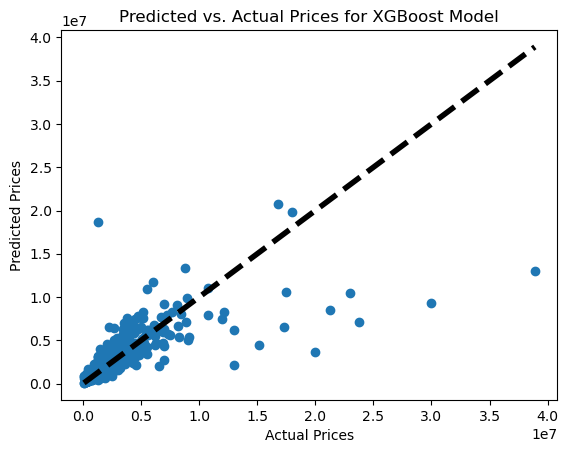

In [282]:
# Predicted vs Actual values
import matplotlib.pyplot as plt

plt.scatter(y_test_3, y_pred_xgb_3)
plt.title('Predicted vs. Actual Prices for XGBoost Model')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test_3.min(), y_test_3.max()], [y_test_3.min(), y_test_3.max()], 'k--', lw=4)
plt.show()


#### Cross-Validation

In [283]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import numpy as np
import xgboost as xgb

# Define the model
model_xgb_cv_3 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10000, learning_rate=0.01, random_state=42)

# Define a custom RMSE scorer
rmse_scorer_xgb_cv_3 = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Perform cross-validation using RMSE
train_rmse_xgb_cv_3 = cross_val_score(model_xgb_cv_3, X_train_3, y_train_3, cv=5, scoring=rmse_scorer_xgb_cv_3)

# Perform cross-validation using R^2
train_r2_xgb_cv_3 = cross_val_score(model_xgb_cv_3, X_train_3, y_train_3, cv=5, scoring='r2')


In [284]:
# Print cross-validation results
print("Training Cross-Validated RMSE scores:", -train_rmse_xgb_cv_3.mean())
print("Training Cross-Validated R^2 scores:", train_r2_xgb_cv_3.mean())


Training Cross-Validated RMSE scores: 869841.6825254571
Training Cross-Validated R^2 scores: 0.5123205438424587


In [285]:
# Train the model on the entire training dataset for final evaluation
model_xgb_cv_3.fit(X_train_3, y_train_3)

# Predict on the testing set
y_pred_xgb_cv_3 = model_xgb_cv_3.predict(X_test_3)

# Evaluate the model on the testing set
test_mse_xgb_cv_3 = mean_squared_error(y_test_3, y_pred_xgb_cv_3)
test_rmse_xgb_cv_3 = np.sqrt(test_mse_xgb_cv_3)
test_r2_xgb_cv_3 = r2_score(y_test_3, y_pred_xgb_cv_3)


In [286]:
# Print the test evaluation results
print(f"Test MSE: {test_mse_xgb_cv_3}")
print(f"Test RMSE: {test_rmse_xgb_cv_3}")
print(f"Test R² Score: {test_r2_xgb_cv_3}")


Test MSE: 690210154278.9377
Test RMSE: 830788.874672102
Test R² Score: 0.6408558305487894


#### 3.3.2.2. GridSearch

In [287]:
# Variety of the XGBoost model

# Uploading library
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Define the parameter grid for the XGBoost Model with GridSearch
param_grid_xgbgs_3 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
}

# Setup GridSearchCV
xgbgs_reg_3 = XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search_xgbgs_3 = GridSearchCV(estimator=xgbgs_reg_3, param_grid=param_grid_xgbgs_3, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit GridSearchCV
grid_search_xgbgs_3.fit(X_train_3, y_train_3)

# Best hyperparameters and model
print("Best parameters:", grid_search_xgbgs_3.best_params_)
xgbgs_best_model_3 = grid_search_xgbgs_3.best_estimator_

# Predictions and evaluation on the training set
y_train_pred_xgbgs_3 = xgbgs_best_model_3.predict(X_train_3)
train_rmse_xgbgs_3 = np.sqrt(mean_squared_error(y_train_3, y_train_pred_xgbgs_3))
train_r2_xgbgs_3 = r2_score(y_train_3, y_train_pred_xgbgs_3)

# Predictions and evaluation on the test set
y_test_pred_xgbgs_3 = xgbgs_best_model_2.predict(X_test_3)
test_rmse_xgbgs_3 = np.sqrt(mean_squared_error(y_test_3, y_test_pred_xgbgs_3))
test_r2_xgbgs_3 = r2_score(y_test_3, y_test_pred_xgbgs_3)
test_mae_xgbgs_3 = mean_absolute_error(y_test_3, y_test_pred_xgbgs_3)  # Calculate MAE



Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END 

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimators=200,

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=10

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200,

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=100,

In [288]:
# Prediction Results for XGBoost Model with GridSearch
print(f"RMSE on Training set for XGBoost GridSearch Model: {train_rmse_xgbgs_3}")
print(f"R2 Score on Training set for XGBoost GridSearch Model: {train_r2_xgbgs_3}")
print(f"RMSE on Test set for XGBoost GridSearch Model: {test_rmse_xgbgs_3}")
print(f"RMSE on Test set for XGBoost GridSearch Model: {test_mae_xgbgs_3}")
print(f"R2 Score on Test set for XGBoost GridSearch Model: {test_r2_xgbgs_3}")

RMSE on Training set for XGBoost GridSearch Model: 298164.71550656325
R2 Score on Training set for XGBoost GridSearch Model: 0.9602326528669168
RMSE on Test set for XGBoost GridSearch Model: 1836469.7642599735
RMSE on Test set for XGBoost GridSearch Model: 1204492.3319456242
R2 Score on Test set for XGBoost GridSearch Model: -0.7549107767502772


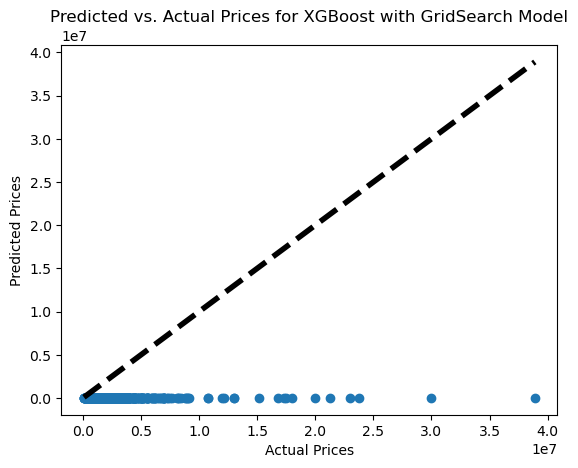

In [289]:
# Predicted vs Actual values
import matplotlib.pyplot as plt

plt.scatter(y_test_3, y_test_pred_xgbgs_3)
plt.title('Predicted vs. Actual Prices for XGBoost with GridSearch Model')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test_3.min(), y_test_3.max()], [y_test_3.min(), y_test_3.max()], 'k--', lw=4)
plt.show()


#### 3.3.2.3. RandomizedSearch

In [290]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np

# Define the parameter grid
param_grid_xgbrs_3 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 0.8],
    'subsample': [0.7, 0.8]
}

# Initialize the XGBRegressor
xgbrs_reg_3 = XGBRegressor(objective='reg:squarederror')

# Setup RandomizedSearchCV
random_search_xgbrs_3 = RandomizedSearchCV(xgbrs_reg_3, param_distributions=param_grid_xgbrs_3, n_iter=10,
                                   scoring='neg_mean_squared_error', cv=5, verbose=2, random_state=42)

random_search_xgbrs_3.fit(X_train_3, y_train_3)

# Best parameters and model
xgbrs_best_params_3 = random_search_xgbrs_3.best_params_
xgbrs_best_model_3 = random_search_xgbrs_3.best_estimator_

print(f"Best Parameters: {xgbrs_best_params_3}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.9s
[CV] END co

In [291]:
# Predictions on training set
y_train_pred_xgbrs_3 = xgbrs_best_model_3.predict(X_train_3)

# Predictions on test set
y_test_pred_xgbrs_3 = xgbrs_best_model_3.predict(X_test_3)

# Calculate MAE for training and test sets
train_mae_xgbrs_3 = mean_absolute_error(y_train_3, y_train_pred_xgbrs_3)
test_mae_xgbrs_3 = mean_absolute_error(y_test_3, y_test_pred_xgbrs_3)

# Calculate RMSE for training and test sets
train_rmse_xgbrs_3 = np.sqrt(mean_squared_error(y_train_3, y_train_pred_xgbrs_3))
test_rmse_xgbrs_3 = np.sqrt(mean_squared_error(y_test_3, y_test_pred_xgbrs_3))

# Calculate R-squared for training and test sets
train_r2_xgbrs_3 = r2_score(y_train_3, y_train_pred_xgbrs_3)
test_r2_xgbrs_3 = r2_score(y_test_3, y_test_pred_xgbrs_3)

print(f"Training RMSE: {train_rmse_xgbrs_3}, Test RMSE: {test_rmse_xgbrs_3}")
print(f"Training MAE: {train_mae_xgbrs_3}, Test MAE: {test_mae_xgbrs_3}")
print(f"Training R^2: {train_r2_xgbrs_3}, Test R^2: {test_r2_xgbrs_3}")

Training RMSE: 245508.53677453502, Test RMSE: 825962.4428111279
Training MAE: 152652.71616324803, Test MAE: 241427.438871875
Training R^2: 0.9730382970392951, Test R^2: 0.6450165743979248


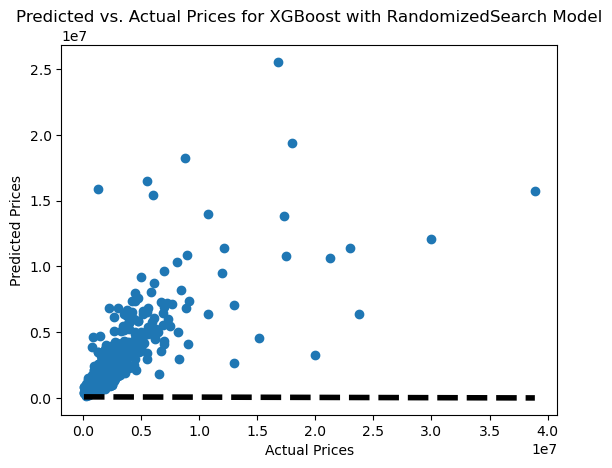

In [292]:
# Predicted vs Actual values
import matplotlib.pyplot as plt

plt.scatter(y_test_3, y_test_pred_xgbrs_3)
plt.title('Predicted vs. Actual Prices for XGBoost with RandomizedSearch Model')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test_3.min(), y_test_3.max()], [y_test_3.min(), y_test_2.max()], 'k--', lw=4)
plt.show()


#### 3.3.2.4. XGBoost Model Comparison

In [293]:
# Displaying the comparison through a table

xgb_comparison_3 = {
    'Model': ['V3 XGBoost Baseline Model', 'V3 XGBoost with GridSearch', 'V3 XGBoost with RandomizedSearch'],
    'Model Object': [model_xgb_3, xgbgs_best_model_3, xgbrs_best_model_3],
    'RMSE': [test_rmse_xgb_cv_3, test_rmse_xgbgs_3, test_rmse_xgbrs_3],
    'MAE': [test_mae_xgb_3, test_mae_xgbgs_3, test_mae_xgbrs_3],
    'R-Squared Score': [test_r2_xgb_cv_3, test_r2_xgbgs_3, test_r2_xgbrs_3]
}

xgb_comparison_3 = pd.DataFrame(xgb_comparison_3)

xgb_comparison_3.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
2,V3 XGBoost with RandomizedSearch,"XGBRegressor(base_score=None, booster=None, ca...",8.259624e+05,2.414274e+05,0.645017
0,V3 XGBoost Baseline Model,"XGBRegressor(base_score=None, booster=None, ca...",8.307889e+05,1.881761e+05,0.640856
1,V3 XGBoost with GridSearch,"XGBRegressor(base_score=None, booster=None, ca...",1.836470e+06,1.204492e+06,-0.754911


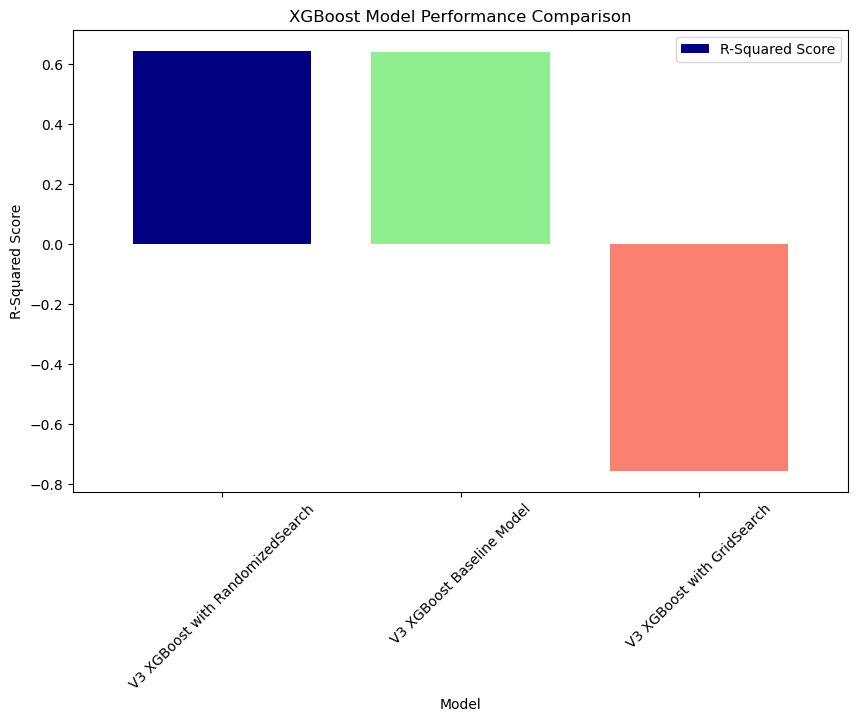

In [294]:
# Sort the DataFrame by 'R-Squared Score' in descending order
xgb_comparison_3 = xgb_comparison_3.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_xgb_3 = ['navy', 'lightgreen', 'salmon']

# Create a figure and a set of subplots
fig_xgb_3, ax_xgb_3 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
rmse_bars_xgb_3 = xgb_comparison_3.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_xgb_3,  # Apply different colors
    ax=ax_xgb_3,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_xgb_3.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_xgb_3.set_title('XGBoost Model Performance Comparison')

# Rotate x-axis labels
ax_xgb_3.set_xticklabels(ax_xgb_3.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_xgb_3, labels_xgb_3 = ax_xgb_3.get_legend_handles_labels()
ax_xgb_3.legend(lines_xgb_3, labels_xgb_3)

# Show the plot
plt.show()

#### 3.3.2.5. Choosing the Best XGBoost Model

In [295]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
xgb_comparison_3 = xgb_comparison_3.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_xgb_model_name_3 = xgb_comparison_3.iloc[0]['Model']
best_xgb_model_3 = xgb_comparison_3.iloc[0]['Model Object']
best_xgb_r2_score_3 = xgb_comparison_3.iloc[0]['R-Squared Score']
best_xgb_mae_3 = xgb_comparison_3.iloc[0]['MAE']
best_xgb_rmse_3 = xgb_comparison_3.iloc[0]['RMSE']

# Extract the model name with the highest R-Squared Score
best_xgb_3 = best_xgb_model_name_3

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_xgb_3)
print("R-Squared Score:", best_xgb_r2_score_3)
print("RMSE:", best_xgb_rmse_3)
print("MAE:", best_xgb_mae_3)

The best model based on R-Squared Score is: V3 XGBoost with RandomizedSearch
R-Squared Score: 0.6450165743979248
RMSE: 825962.4428111279
MAE: 241427.438871875


### 3.3.3. RandomForest Model (RF)

#### 3.3.3.1. Baseline Model

In [296]:
# Library needed for Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Initialize the Random Forest Regressor
rf_model_3 = RandomForestRegressor(n_estimators=150, random_state=32)  # You can adjust the number of trees with `n_estimators`

# Train the model
train_rf_pred_3 = rf_model_3.fit(X_train_3, y_train_3)

# Predict on the test set
test_rf_pred_3 = rf_model_3.predict(X_test_3)


In [297]:
# Calculate evaluation metrics
test_mse_rf_3 = mean_squared_error(y_test_3, test_rf_pred_3)
test_rmse_rf_3 = np.sqrt(test_mse_rf_3)
test_mae_rf_3 = mean_absolute_error(y_test_3, test_rf_pred_3)
test_r2_rf_3 = r2_score(y_test_3, test_rf_pred_3)

print(f"Mean Squared Error: {test_mse_rf_3}")
print(f"Root Mean Squared Error: {test_rmse_rf_3}")
print(f"Root Mean Squared Error: {test_mae_rf_3}")
print(f"R² Score: {test_r2_rf_3}")

Mean Squared Error: 552309635508.866
Root Mean Squared Error: 743175.3733196936
Root Mean Squared Error: 194234.84553929497
R² Score: 0.7126110299957005


#### 3.3.3.2. Cross-Validation Model

In [298]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import make_scorer, r2_score, mean_squared_error
# import numpy as np

# # Custom scorer for RMSE
# def rmse_score_rfcv_2(y_true, y_pred):
#     return np.sqrt(mean_squared_error(y_true, y_pred))

# rmse_scorer_rfcv_2 = make_scorer(rmse_score_rfcv_2, greater_is_better=False)

# # Cross-validate the model using RMSE
# train_rmse_rf_cv_2 = cross_val_score(rf_model_2, X_train_2, y_train_2, cv=5, scoring=rmse_scorer_rfcv_2)

# # Cross-validate the model using Mean Absolute Error
# train_mae_rf_cv_2 = cross_val_score(rf_model_2, X_train_2, y_train_2, cv=5, scoring='neg_mean_absolute_error')

# # Cross-validate the model using R^2
# train_r2_rf_cv_2 = cross_val_score(rf_model_2, X_train_2, y_train_2, cv=5, scoring='r2')


In [299]:
# # Print cross-validation results
# print("CV RMSE scores:", -train_rmse_rf_cv_2)  # Negate RMSE scores because make_scorer(mse, greater_is_better=False) makes them negative
# print("CV RMSE average score:", -np.mean(train_rmse_rf_cv_2))

# print("CV R^2 scores:", -train_mae_rf_cv_2)
# print("CV R^2 average score:", np.mean(train_mae_rf_cv_2))

# print("CV R^2 scores:", train_r2_rf_cv_2)
# print("CV R^2 average score:", np.mean(train_r2_rf_cv_2))

#### 3.3.3.3. Hyperparameter Tuning

In [300]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid
param_grid_rfgs_3 = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'bootstrap': [True, False]  # Method for sampling data points (with or without replacement)
}

# Initialize the RandomForestRegressor
rfgs_model_3 = RandomForestRegressor(random_state=32)

# Setup GridSearchCV
grid_search_rf_3 = GridSearchCV(estimator=rfgs_model_3, param_grid=param_grid_rfgs_3, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search_rf_3.fit(X_train_3, y_train_3)

# Get the best estimator
best_rfgs_model_3 = grid_search_rf_3.best_estimator_

# Predict on the test set with the best model
test_rfgs_pred_3 = best_rfgs_model_3.predict(X_test_3)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
381 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ahska\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ahska\anaconda3\Lib\site-pack

In [301]:
# Calculate evaluation metrics
test_mse_rfgs_3 = mean_squared_error(y_test_3, test_rfgs_pred_3)
test_rmse_rfgs_3 = np.sqrt(test_mse_rfgs_3)
test_mae_rfgs_3 = mean_absolute_error(y_test_3, test_rfgs_pred_3)
test_r2_rfgs_3 = r2_score(y_test_3, test_rfgs_pred_3)

# Print the results
print("Best model parameters:", grid_search_rf_3.best_params_)
print(f"Test MSE: {test_mse_rfgs_3}")
print(f"Test RMSE: {test_rmse_rfgs_3}")
print(f"Test MAE: {test_mae_rfgs_3}")
print(f"Test R² Score: {test_r2_rfgs_3}")


Best model parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test MSE: 532305186281.4816
Test RMSE: 729592.4795949323
Test MAE: 163012.07447770232
Test R² Score: 0.7230201514184409


#### 3.3.3.4. RandomForest Model Comparison

In [302]:
# Displaying the comparison through a table

rf_comparison_3 = {
    'Model': ['V3 Random Forest Baseline Model', 'V3 Random Forest with GridSearch'],
    'Model Object': [rf_model_3, best_rfgs_model_3],
    'RMSE': [test_rmse_rf_3, test_rmse_rfgs_3],
    'MAE': [test_mae_rf_3, test_mae_rfgs_3],
    'R-Squared Score': [test_r2_rf_3, test_r2_rfgs_3]
}

rf_comparison_3 = pd.DataFrame(rf_comparison_3)

rf_comparison_3.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
1,V3 Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",729592.479595,163012.074478,0.723020
0,V3 Random Forest Baseline Model,"(DecisionTreeRegressor(max_features=1.0, rando...",743175.373320,194234.845539,0.712611


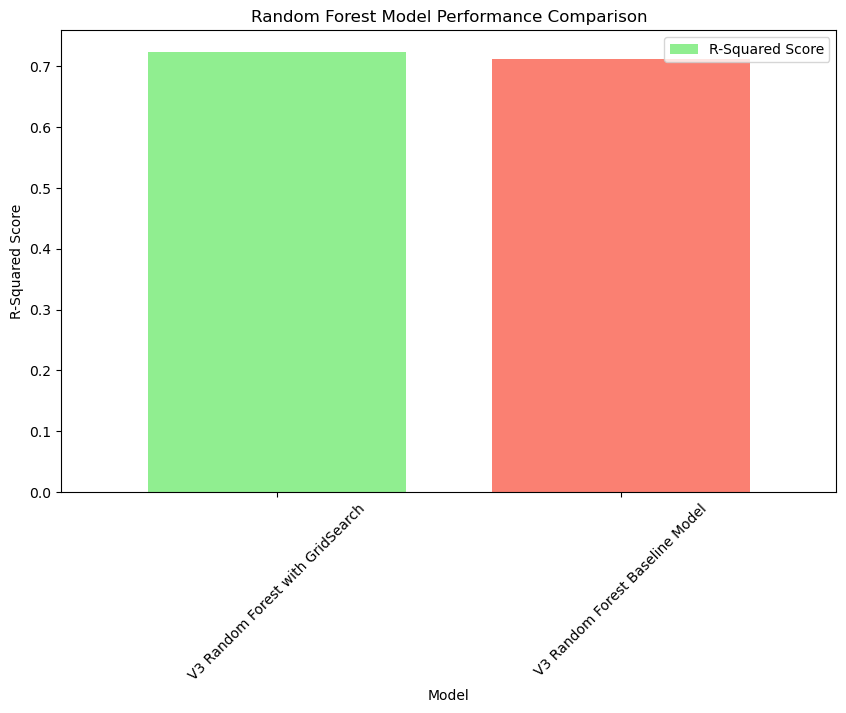

In [303]:
# Sort the DataFrame by 'R-Squared Score' in descending order
rf_comparison_3 = rf_comparison_3.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_rf_3 = ['lightgreen', 'salmon']

# Create a figure and a set of subplots
fig_rf_3, ax_rf_3 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_rf_3 = rf_comparison_3.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_rf_3,  # Apply different colors
    ax=ax_rf_3,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_rf_3.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_rf_3.set_title('Random Forest Model Performance Comparison')

# Rotate x-axis labels
ax_rf_3.set_xticklabels(ax_rf_3.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_rf_3, labels_rf_3 = ax_rf_3.get_legend_handles_labels()
ax_rf_3.legend(lines_rf_3, labels_rf_3)

# Show the plot
plt.show()

#### 3.3.3.5. Choosing the Best Model

In [304]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
rf_comparison_3 = rf_comparison_3.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_rf_model_name_3 = rf_comparison_3.iloc[0]['Model']
best_rf_model_3 = rf_comparison_3.iloc[0]['Model Object']
best_rf_r2_score_3 = rf_comparison_3.iloc[0]['R-Squared Score']
best_rf_rmse_3 = rf_comparison_3.iloc[0]['RMSE']
best_rf_mae_3 = rf_comparison_3.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_rf_3 = best_rf_model_name_3

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_rf_3)
print("The highest R-Squared Score is:", best_rf_r2_score_3)
print("The best RMSE is:", best_rf_rmse_3)
print("The best MAE is:", best_rf_mae_3)

The best model based on R-Squared Score is: V3 Random Forest with GridSearch
The highest R-Squared Score is: 0.7230201514184409
The best RMSE is: 729592.4795949323
The best MAE is: 163012.07447770232


### 3.3.4. Regression Model Comparison

In [305]:
# Displaying the comparison through a table

reg_comparison_3 = {
    'Model': [best_linreg_model_name_3, best_xgb_model_name_3, best_rf_model_name_3],
    'Model Object': [best_linreg_model_3, best_xgb_model_3, best_rf_model_3],
    'RMSE': [best_linreg_rmse_3, best_xgb_rmse_3, best_rf_rmse_3],
    'MAE': [best_linreg_mae_3, best_xgb_mae_3, best_rf_mae_3],
    'R-Squared Score': [best_linreg_r2_score_3, best_xgb_r2_score_3, best_rf_r2_score_3]
}

reg_comparison_3 = pd.DataFrame(reg_comparison_3)

reg_comparison_3.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
2,V3 Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",729592.479595,163012.074478,0.723020
1,V3 XGBoost with RandomizedSearch,"XGBRegressor(base_score=None, booster=None, ca...",825962.442811,241427.438872,0.645017
0,V3 Ridge Regression with GridSearch,Ridge(alpha=100),951889.886780,420263.640908,0.528523


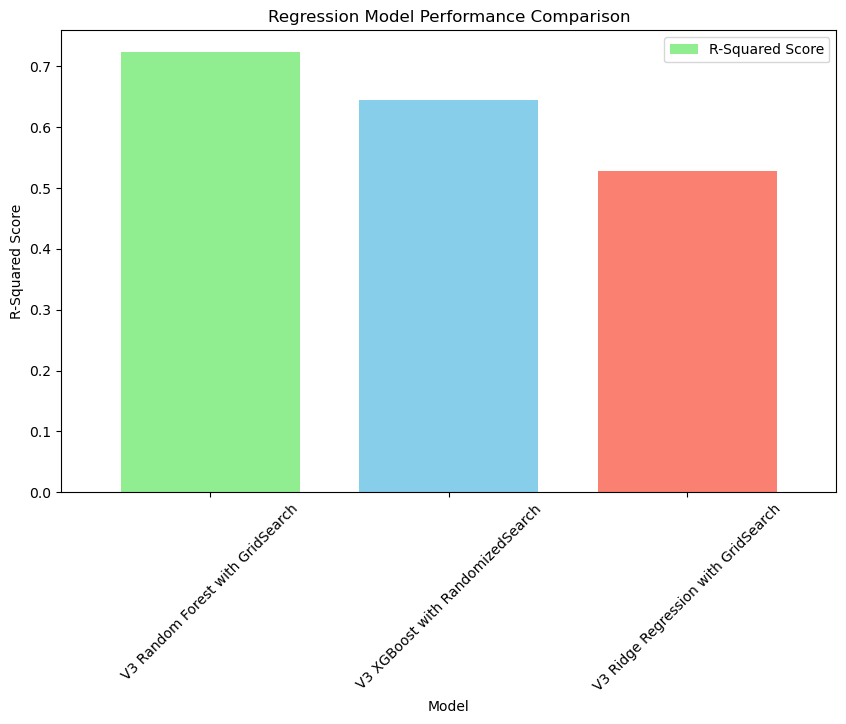

In [306]:
# Sort the DataFrame by 'R-Squared Score' in descending order
reg_comparison_3 = reg_comparison_3.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_reg_3 = ['lightgreen', 'skyblue', 'salmon']

# Create a figure and a set of subplots
fig_reg_3, ax_reg_3 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_reg_3 = reg_comparison_3.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_reg_3,  # Apply different colors
    ax=ax_reg_3,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_reg_3.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_reg_3.set_title('Regression Model Performance Comparison')

# Rotate x-axis labels
ax_reg_3.set_xticklabels(ax_reg_3.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_reg_3, labels_reg_3 = ax_reg_3.get_legend_handles_labels()
ax_reg_3.legend(lines_reg_3, labels_reg_3)

# Show the plot
plt.show()

### 3.3.5. Feature Importance from Best Regression Models

In [307]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
reg_comparison_3 = reg_comparison_3.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_reg_model_name_3 = reg_comparison_3.iloc[0]['Model']
best_reg_model_3 = reg_comparison_3.iloc[0]['Model Object']
best_reg_r2_score_3 = reg_comparison_3.iloc[0]['R-Squared Score']
best_reg_rmse_3 = reg_comparison_3.iloc[0]['RMSE']
best_reg_mae_3 = reg_comparison_3.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_reg_3 = best_reg_model_name_3

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_reg_3)
print("The highest R-Squared Score is:", best_reg_r2_score_3)
print("The best RMSE is:", best_reg_rmse_3)
print("The best MAE is:", best_reg_mae_3)

The best model based on R-Squared Score is: V3 Random Forest with GridSearch
The highest R-Squared Score is: 0.7230201514184409
The best RMSE is: 729592.4795949323
The best MAE is: 163012.07447770232


In [308]:
# We choose the model with the highest R-Squared

# Feature importance
best_reg_feature_importances_3 = best_reg_model_3.feature_importances_
best_reg_features_3 = pd.DataFrame({'Feature': X_train_3.columns, 'Importance': best_reg_feature_importances_3})
best_reg_features_3.sort_values(by='Importance', ascending=False, inplace=True)
print(best_reg_features_3)

                             Feature  Importance
2                        SQUARE FEET    0.369640
5          bus_station_accessibility    0.111983
1                              BATHS    0.108796
11              school_accessibility    0.082173
9      transit_station_accessibility    0.072969
10           preschool_accessibility    0.061641
12                park_accessibility    0.060208
0                               BEDS    0.055401
3                                AGE    0.046726
13            hospital_accessibility    0.019855
4              airport_accessibility    0.005314
7   light_rail_station_accessibility    0.004523
8        train_station_accessibility    0.000460
6       ferry_terminal_accessibility    0.000312


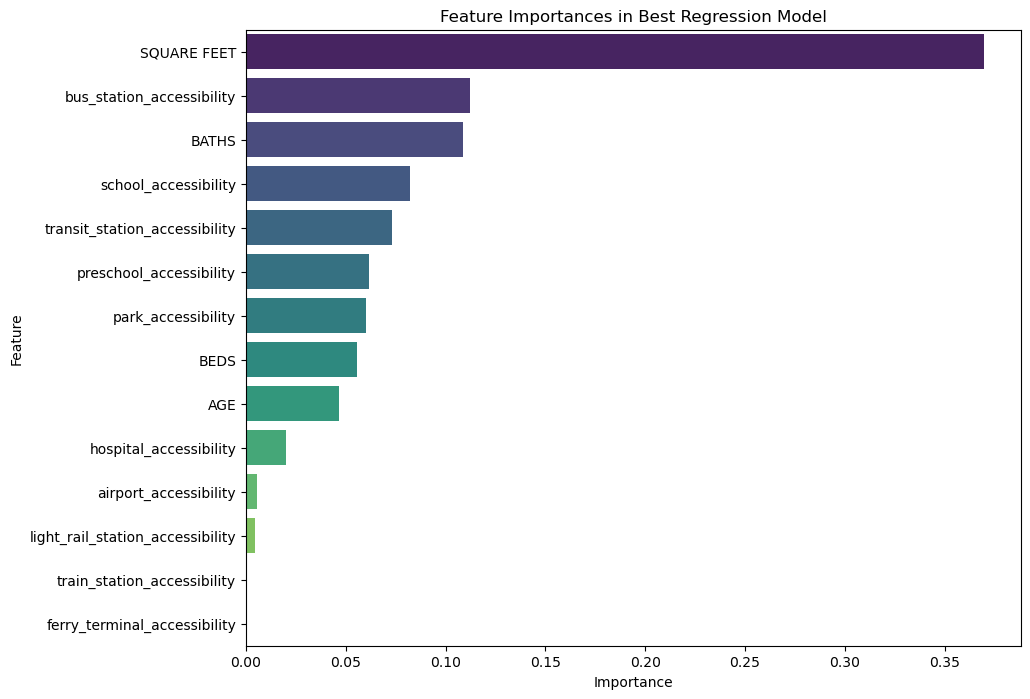

In [309]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=best_reg_features_3, palette='viridis')
plt.title('Feature Importances in Best Regression Model')
plt.show()

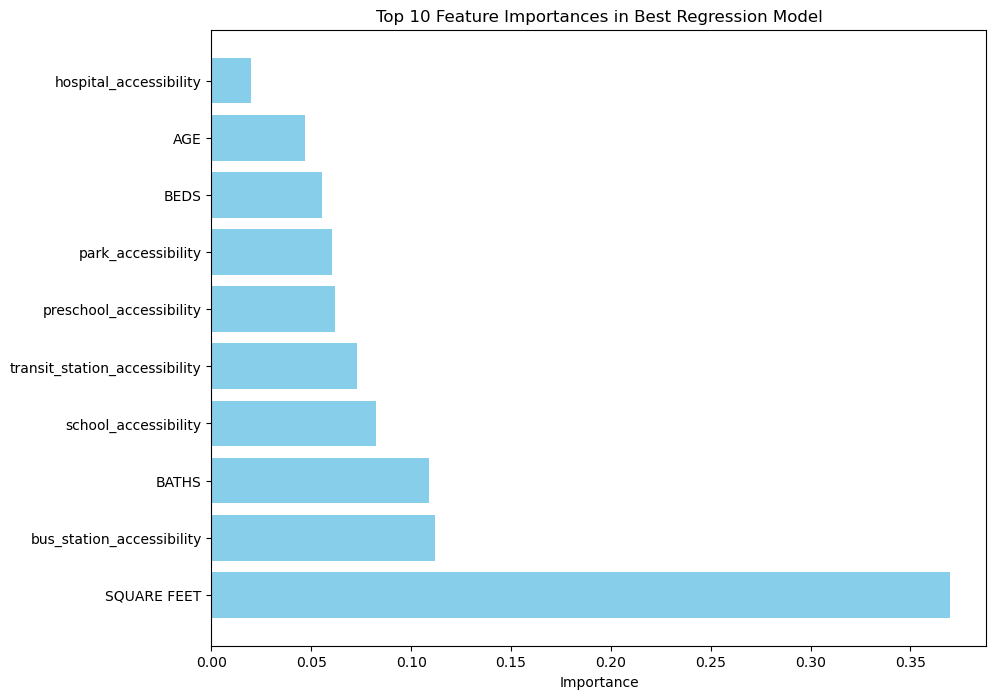

In [310]:
# Display only the top N features for clarity
top_n = 10
plt.figure(figsize=(10, 8))
plt.barh(best_reg_features_3['Feature'][:top_n], best_reg_features_3['Importance'][:top_n], color='skyblue')
plt.xlabel('Importance')
plt.title(f'Top {top_n} Feature Importances in Best Regression Model')
plt.show()


### 3.3.6. Neural Network Model

#### 3.3.6.1. All Features

##### Baseline Model

In [311]:
np.random.seed(99)
python_random.seed(99)
tf.random.set_seed(99)

# Initialize the neural network model
nn_model_3 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_3.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),  # Additional smaller dense layer
    Dense(1)  # Output layer for regression
])


# Compile the model
nn_model_3.compile(optimizer=Adam(learning_rate=0.005), loss='mse')  # Using Mean Squared Error for regression

In [312]:
# Train the model
nn_history_3 = nn_model_3.fit(X_train_3, y_train_3, epochs=150, validation_split=0.1, batch_size=32)

Epoch 1/150
329/329 [==============================] - 5s 5ms/step - loss: 2293636792320.0000 - val_loss: 718872510464.0000
Epoch 2/150
329/329 [==============================] - 1s 2ms/step - loss: 1460674887680.0000 - val_loss: 512844038144.0000
Epoch 3/150
329/329 [==============================] - 1s 2ms/step - loss: 1292794200064.0000 - val_loss: 497823776768.0000
Epoch 4/150
329/329 [==============================] - 1s 2ms/step - loss: 1185067302912.0000 - val_loss: 440714297344.0000
Epoch 5/150
329/329 [==============================] - 1s 2ms/step - loss: 1107574128640.0000 - val_loss: 500226490368.0000
Epoch 6/150
329/329 [==============================] - 1s 2ms/step - loss: 1066011328512.0000 - val_loss: 473840287744.0000
Epoch 7/150
329/329 [==============================] - 1s 2ms/step - loss: 1047635492864.0000 - val_loss: 445341827072.0000
Epoch 8/150
329/329 [==============================] - 1s 2ms/step - loss: 1006233583616.0000 - val_loss: 427767005184.0000
Epoch 9/

329/329 [==============================] - 1s 2ms/step - loss: 448040894464.0000 - val_loss: 359584202752.0000
Epoch 68/150
329/329 [==============================] - 1s 2ms/step - loss: 477788012544.0000 - val_loss: 334379417600.0000
Epoch 69/150
329/329 [==============================] - 1s 3ms/step - loss: 412581789696.0000 - val_loss: 399929933824.0000
Epoch 70/150
329/329 [==============================] - 1s 2ms/step - loss: 445540728832.0000 - val_loss: 333175324672.0000
Epoch 71/150
329/329 [==============================] - 1s 2ms/step - loss: 432291250176.0000 - val_loss: 334181072896.0000
Epoch 72/150
329/329 [==============================] - 1s 2ms/step - loss: 427567022080.0000 - val_loss: 331499110400.0000
Epoch 73/150
329/329 [==============================] - 1s 2ms/step - loss: 453924388864.0000 - val_loss: 322652733440.0000
Epoch 74/150
329/329 [==============================] - 1s 2ms/step - loss: 433731502080.0000 - val_loss: 332844204032.0000
Epoch 75/150
329/329 

Epoch 133/150
329/329 [==============================] - 1s 2ms/step - loss: 363005771776.0000 - val_loss: 327641890816.0000
Epoch 134/150
329/329 [==============================] - 1s 2ms/step - loss: 340926922752.0000 - val_loss: 301414514688.0000
Epoch 135/150
329/329 [==============================] - 1s 2ms/step - loss: 364374065152.0000 - val_loss: 295670317056.0000
Epoch 136/150
329/329 [==============================] - 1s 2ms/step - loss: 395404050432.0000 - val_loss: 296963309568.0000
Epoch 137/150
329/329 [==============================] - 1s 2ms/step - loss: 373228994560.0000 - val_loss: 362510876672.0000
Epoch 138/150
329/329 [==============================] - 1s 2ms/step - loss: 362480238592.0000 - val_loss: 304411279360.0000
Epoch 139/150
329/329 [==============================] - 1s 2ms/step - loss: 364542263296.0000 - val_loss: 277709946880.0000
Epoch 140/150
329/329 [==============================] - 1s 2ms/step - loss: 349212344320.0000 - val_loss: 401649958912.0000


In [313]:
# Evaluate the model on the test set
test_loss_nn_3 = nn_model_3.evaluate(X_test_3, y_test_3)
print(f'Baseline Neural Network Test Loss: {test_loss_nn_3}')

# Optionally, predict and calculate R² Score
from sklearn.metrics import r2_score
test_pred_nn_3 = nn_model_3.predict(X_test_3)
test_mse_nn_3 = mean_squared_error(y_test_3, test_pred_nn_3)
test_rmse_nn_3 = np.sqrt(test_mse_nn_3)
print(f'RMSE Score: {test_rmse_nn_3}')
test_mae_nn_3 = mean_absolute_error(y_test_3, test_pred_nn_3)
print(f'MAE Score: {test_mae_nn_3}')
test_r2_nn_3 = r2_score(y_test_3, test_pred_nn_3.flatten())
print(f'R2 Score: {test_r2_nn_3}')

157/157 [==============================] - 0s 1ms/step - loss: 570141573120.0000
Baseline Neural Network Test Loss: 570141573120.0
157/157 [==============================] - 1s 1ms/step
RMSE Score: 755077.2741935586
MAE Score: 265274.418440625
R2 Score: 0.7033322931335901


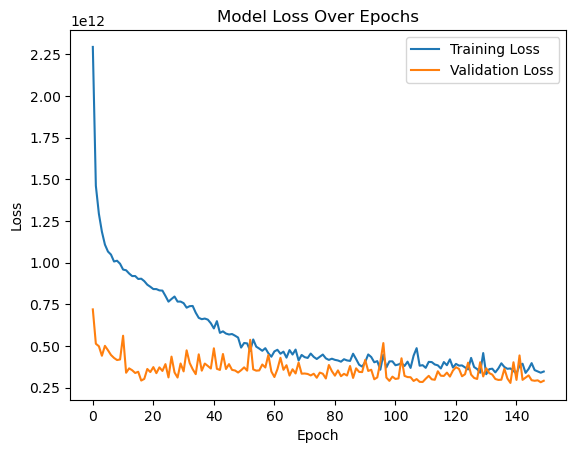

In [314]:
# Library needed to display Loss Function
import matplotlib.pyplot as plt

# Corrected access to the 'history' data stored in the History object
loss_nn_3 = nn_history_3.history['loss']
val_loss_nn_3 = nn_history_3.history['val_loss']

# Plot the loss and validation loss
plt.plot(loss_nn_3, label='Training Loss')
plt.plot(val_loss_nn_3, label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Baseline Neural Network with Early Stopping

In [315]:
# Making adjustment towards the Neural Network model to seek any improvements

# Library needed for Early Stopping of Neural Network Model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Adjusted model architecture
nn_early_model_3 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_3.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

nn_early_model_3.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback
nn_early_stopping_3 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training with early stopping
nn_early_history_3 = nn_early_model_3.fit(X_train_3, y_train_3, validation_split=0.1, epochs=150, batch_size=32, callbacks=[nn_early_stopping_3], verbose=1)

# Evaluate the model
test_loss_nn_early_3 = nn_early_model_3.evaluate(X_test_3, y_test_3, verbose=0)


Epoch 1/150
329/329 [==============================] - 3s 4ms/step - loss: 3858183749632.0000 - val_loss: 2112888373248.0000
Epoch 2/150
329/329 [==============================] - 1s 3ms/step - loss: 3814959874048.0000 - val_loss: 2036695433216.0000
Epoch 3/150
329/329 [==============================] - 1s 2ms/step - loss: 3665920786432.0000 - val_loss: 1853531357184.0000
Epoch 4/150
329/329 [==============================] - 1s 2ms/step - loss: 3393856733184.0000 - val_loss: 1575816265728.0000
Epoch 5/150
329/329 [==============================] - 1s 2ms/step - loss: 3019056349184.0000 - val_loss: 1244947546112.0000
Epoch 6/150
329/329 [==============================] - 1s 2ms/step - loss: 2623855394816.0000 - val_loss: 937106735104.0000
Epoch 7/150
329/329 [==============================] - 1s 2ms/step - loss: 2264929140736.0000 - val_loss: 722110709760.0000
Epoch 8/150
329/329 [==============================] - 1s 2ms/step - loss: 2033271701504.0000 - val_loss: 599770136576.0000
Epo

In [316]:
# Calculating the R2 for the Neural Network Model 2
test_pred_nn_early_3 = nn_early_model_3.predict(X_test_3)

test_mse_nn_early_3 = mean_squared_error(y_test_3, test_pred_nn_early_3)
test_rmse_nn_early_3 = np.sqrt(test_mse_nn_early_3)
print(f'RMSE Score: {test_rmse_nn_early_3}')
test_mae_nn_early_3 = mean_absolute_error(y_test_3, test_pred_nn_early_3)
print(f'RMSE Score: {test_mae_nn_early_3}')
test_r2_nn_early_3 = r2_score(y_test_3, test_pred_nn_early_3.flatten())  # use flatten() if your output has extra dimensions

print("Early Stopping Neural Network Model R2 Score:", test_r2_nn_early_3)


157/157 [==============================] - 1s 2ms/step
RMSE Score: 1009282.9949594083
RMSE Score: 399860.287328125
Early Stopping Neural Network Model R2 Score: 0.469954211625803


##### Hyperparameter Tuning

In [317]:
from kerastuner import HyperModel
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

np.random.seed(99)
python_random.seed(99)
tf.random.set_seed(99)

class NeuralNetworkHyperModel_3(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
        
    def build(self, hp):
        nnht_model_3 = Sequential()
        nnht_model_3.add(Dense(
            units=hp.Int('units_1', min_value=32, max_value=512, step=32),
            activation='relu', 
            input_shape=self.input_shape
        ))
        nnht_model_3.add(Dense(
            units=hp.Int('units_2', min_value=32, max_value=256, step=32),
            activation='relu'
        ))
        nnht_model_3.add(Dense(1))  # Output layer for regression
        
        nnht_model_3.compile(
            optimizer=Adam(
                learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
            ),
            loss='mse'
        )
        return nnht_model_3


In [318]:
from kerastuner.tuners import RandomSearch

nnht_input_shape_3 = (X_train_3.shape[1],)
nnht_hypermodel_3 = NeuralNetworkHyperModel_3(input_shape=nnht_input_shape_3)

nnht_tuner_3 = RandomSearch(
    nnht_hypermodel_3,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='nnht_3c',
    project_name='nn_hypertuning_keras_3c'
)

nnht_tuner_3.search(X_train_3, y_train_3, epochs=50, validation_split=0.1)


Trial 20 Complete [00h 01m 22s]
val_loss: 564575141888.0

Best val_loss So Far: 322914729984.0
Total elapsed time: 00h 26m 32s


In [319]:
nnht_best_model_3 = nnht_tuner_3.get_best_models(num_models=1)[0]

# Evaluate the best model
test_loss_nnht_3 = nnht_best_model_3.evaluate(X_test_3, y_test_3)
print(f'Best Neural Network Test Loss: {test_loss_nnht_3}')

# Predict and calculate R² Score
test_pred_nnht_3 = nnht_best_model_3.predict(X_test_3)
test_rmse_nnht_3 = np.sqrt(mean_squared_error(y_test_3, test_pred_nnht_3))
test_mae_nnht_3 = mean_absolute_error(y_test_3, test_pred_nnht_3)
test_r2_nnht_3 = r2_score(y_test_3, test_pred_nnht_3.flatten())

print(f'RMSE: {test_rmse_nnht_3}')
print(f'MAE: {test_mae_nnht_3}')
print(f'R2 Score: {test_r2_nnht_3}')


157/157 [==============================] - 0s 2ms/step - loss: 617560932352.0000
Best Neural Network Test Loss: 617560932352.0
157/157 [==============================] - 0s 1ms/step
RMSE: 785850.4571919953
MAE: 301441.73553125
R2 Score: 0.6786581450726494


##### Hyper Model Neural Network with Early Stopping

In [320]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
nnht_early_stopping_3 = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the lowest validation loss
)

In [321]:
# Setup your tuner
nnht_early_tuner_3 = RandomSearch(
    nnht_hypermodel_3,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='nnht_early_3c',
    project_name='nn_hypertuning_earlystopping_keras_3c'
)

In [322]:
# Start the search and include early stopping
nnht_early_tuner_3.search(
    X_train_3, 
    y_train_3, 
    epochs=100, 
    validation_split=0.1, 
    callbacks=[nnht_early_stopping_3]
)

Trial 20 Complete [00h 01m 52s]
val_loss: 503003922432.0

Best val_loss So Far: 334695399424.0
Total elapsed time: 00h 41m 59s


In [323]:
# Retrieve and evaluate the best model
nnht_early_best_model_3 = nnht_early_tuner_3.get_best_models(num_models=1)[0]
test_loss_nnht_early_3 = nnht_early_best_model_3.evaluate(X_test_3, y_test_3)
test_pred_nnht_early_3 = nnht_early_best_model_3.predict(X_test_3)
test_rmse_nnht_early_3 = np.sqrt(mean_squared_error(y_test_3, test_pred_nnht_early_3))
test_mae_nnht_early_3 = mean_absolute_error(y_test_3, test_pred_nnht_early_3)
test_r2_nnht_early_3 = r2_score(y_test_3, test_pred_nnht_early_3.flatten())

# Print performance metrics
print(f'Best Neural Network Test Loss: {test_loss_nnht_early_3}')
print(f'RMSE: {test_rmse_nnht_early_3}')
print(f'MAE: {test_mae_nnht_early_3}')
print(f'R2 Score: {test_r2_nnht_early_3}')

157/157 [==============================] - 0s 1ms/step
Best Neural Network Test Loss: 625243914240.0
RMSE: 790723.6857850446
MAE: 303164.979315625
R2 Score: 0.6746603672062561


##### Comparison

In [324]:
# Displaying the comparison through a table

nn_comparison_3 = {
    'Model': ['V3 Neural Network Baseline Model', 'V3 Neural Network Baseline Model with Early Stopping', 'V3 Neural Network Hyper Model', 'V3 Neural Network Hyper Model with Early Stopping'],
    'Model Object': [nn_model_3, nn_early_model_3, nnht_best_model_3, nnht_early_best_model_3],
    'RMSE': [test_rmse_nn_3, test_rmse_nn_early_3, test_rmse_nnht_3, test_rmse_nnht_early_3],
    'MAE': [test_mae_nn_3, test_mae_nn_early_3, test_mae_nnht_3, test_mae_nnht_early_3],
    'R-Squared Score': [test_r2_nn_3, test_r2_nn_early_3, test_r2_nnht_3, test_r2_nnht_early_3]
}

nn_comparison_3 = pd.DataFrame(nn_comparison_3)

nn_comparison_3.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
0,V3 Neural Network Baseline Model,<keras.src.engine.sequential.Sequential object...,7.550773e+05,265274.418441,0.703332
2,V3 Neural Network Hyper Model,<keras.src.engine.sequential.Sequential object...,7.858505e+05,301441.735531,0.678658
3,V3 Neural Network Hyper Model with Early Stopping,<keras.src.engine.sequential.Sequential object...,7.907237e+05,303164.979316,0.674660
1,V3 Neural Network Baseline Model with Early St...,<keras.src.engine.sequential.Sequential object...,1.009283e+06,399860.287328,0.469954


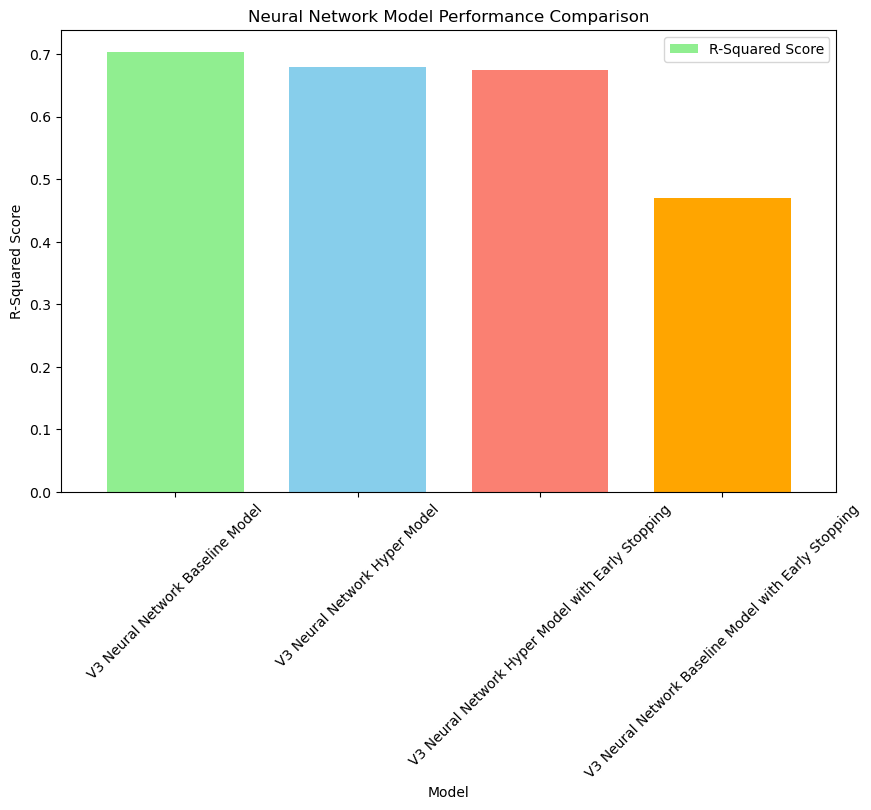

In [325]:
# Sort the DataFrame by 'R-Squared Score' in descending order
nn_comparison_3 = nn_comparison_3.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_nn_3 = ['lightgreen', 'skyblue', 'salmon', 'orange']

# Create a figure and a set of subplots
fig_nn_3, ax_nn_3 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_nn_3 = nn_comparison_3.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_nn_3,  # Apply different colors
    ax=ax_nn_3,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_nn_3.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_nn_3.set_title('Neural Network Model Performance Comparison')

# Rotate x-axis labels
ax_nn_3.set_xticklabels(ax_nn_3.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_nn_3, labels_nn_3 = ax_nn_3.get_legend_handles_labels()
ax_nn_3.legend(lines_nn_3, labels_nn_3)

# Show the plot
plt.show()

In [326]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
nn_comparison_3 = nn_comparison_3.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_nn_model_name_3 = nn_comparison_3.iloc[0]['Model']
best_nn_model_3 = nn_comparison_3.iloc[0]['Model Object']
best_nn_r2_score_3 = nn_comparison_3.iloc[0]['R-Squared Score']
best_nn_rmse_3 = nn_comparison_3.iloc[0]['RMSE']
best_nn_mae_3 = nn_comparison_3.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_nn_3 = best_nn_model_name_3

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_nn_3)
print("The highest R-Squared Score is:", best_nn_r2_score_3)
print("The best RMSE is:", best_nn_rmse_3)
print("The best MAE is:", best_nn_mae_3)

The best model based on R-Squared Score is: V3 Neural Network Baseline Model
The highest R-Squared Score is: 0.7033322931335901
The best RMSE is: 755077.2741935586
The best MAE is: 265274.418440625


#### 3.3.6.2. Important Features

##### Features Filtering

In [327]:
# Select features above the mean importance
best_reg_mean_importance_3 = best_reg_features_3['Importance'].mean()
best_reg_selected_features_3 = best_reg_features_3[best_reg_features_3['Importance'] > best_reg_mean_importance_3]['Feature'].values


In [328]:
# Print selected_features
best_reg_selected_features_3


array(['SQUARE FEET', 'bus_station_accessibility', 'BATHS',
       'school_accessibility', 'transit_station_accessibility'],
      dtype=object)

In [329]:
# Reduce train and test sets to selected features
X_train_selected_3 = X_train_3[best_reg_selected_features_3]
X_test_selected_3 = X_test_3[best_reg_selected_features_3]


##### Expanded Features Filtering

In [330]:
# Filter out 'SQUARE FEET' from the DataFrame
best_reg_filtered_features_3 = best_reg_features_3[best_reg_features_3['Feature'] != 'SQUARE FEET']

# Calculate the average importance of the remaining features
best_reg_filtered_mean_importance_3 = best_reg_filtered_features_3['Importance'].mean()

# Select features above the mean importance
best_reg_filtered_selected_features_3 = best_reg_filtered_features_3[best_reg_filtered_features_3['Importance'] > best_reg_filtered_mean_importance_3]['Feature'].values


In [331]:
# Assuming best_reg_filtered_selected_features_1 is a numpy array
best_reg_filtered_selected_features_3 = np.append(best_reg_filtered_selected_features_3, "SQUARE FEET")

# Print the updated list of selected features
print(best_reg_filtered_selected_features_3)


['bus_station_accessibility' 'BATHS' 'school_accessibility'
 'transit_station_accessibility' 'preschool_accessibility'
 'park_accessibility' 'BEDS' 'SQUARE FEET']


In [332]:
# Reduce train and test sets to selected features
X_train_filtered_selected_3 = X_train_3[best_reg_filtered_selected_features_3]
X_test_filtered_selected_3 = X_test_3[best_reg_filtered_selected_features_3]


##### Baseline Model

In [333]:
# Initialize the neural network model
nn_filter_model_3 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_filtered_selected_3.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),  # Additional smaller dense layer
    Dense(1)  # Output layer for regression
])

# Compile the model
nn_filter_model_3.compile(optimizer=Adam(learning_rate=0.001), loss='mse')  # Using Mean Squared Error for regression


In [334]:
# Train the model
nn_filter_history_3 = nn_filter_model_3.fit(X_train_filtered_selected_3, y_train_3, epochs=100, validation_split=0.1, batch_size=32)


Epoch 1/100
329/329 [==============================] - 4s 3ms/step - loss: 3631513337856.0000 - val_loss: 1084341026816.0000
Epoch 2/100
329/329 [==============================] - 1s 2ms/step - loss: 1846804611072.0000 - val_loss: 650468327424.0000
Epoch 3/100
329/329 [==============================] - 1s 3ms/step - loss: 1624786468864.0000 - val_loss: 652630949888.0000
Epoch 4/100
329/329 [==============================] - 1s 2ms/step - loss: 1567517442048.0000 - val_loss: 601099010048.0000
Epoch 5/100
329/329 [==============================] - 1s 2ms/step - loss: 1520540319744.0000 - val_loss: 624310878208.0000
Epoch 6/100
329/329 [==============================] - 1s 2ms/step - loss: 1472665747456.0000 - val_loss: 630783672320.0000
Epoch 7/100
329/329 [==============================] - 1s 2ms/step - loss: 1430445621248.0000 - val_loss: 582667665408.0000
Epoch 8/100
329/329 [==============================] - 1s 2ms/step - loss: 1390788083712.0000 - val_loss: 567674798080.0000
Epoch 9

Epoch 67/100
329/329 [==============================] - 1s 2ms/step - loss: 856407146496.0000 - val_loss: 407266754560.0000
Epoch 68/100
329/329 [==============================] - 1s 2ms/step - loss: 852700889088.0000 - val_loss: 423440941056.0000
Epoch 69/100
329/329 [==============================] - 1s 2ms/step - loss: 852446150656.0000 - val_loss: 382451122176.0000
Epoch 70/100
329/329 [==============================] - 1s 2ms/step - loss: 851876839424.0000 - val_loss: 380743417856.0000
Epoch 71/100
329/329 [==============================] - 1s 2ms/step - loss: 851746488320.0000 - val_loss: 397375995904.0000
Epoch 72/100
329/329 [==============================] - 1s 2ms/step - loss: 840290861056.0000 - val_loss: 382349508608.0000
Epoch 73/100
329/329 [==============================] - 1s 2ms/step - loss: 841268658176.0000 - val_loss: 387586752512.0000
Epoch 74/100
329/329 [==============================] - 1s 2ms/step - loss: 837707300864.0000 - val_loss: 396473237504.0000
Epoch 75

In [335]:
# Evaluate the model on the test set
test_loss_nn_filter_3 = nn_filter_model_3.evaluate(X_test_filtered_selected_3, y_test_3)
print(f'Baseline Neural Network (Selected Features) Test Loss: {test_loss_nn_filter_3}')

# Optionally, predict and calculate R² Score
from sklearn.metrics import r2_score
test_pred_nn_filter_3 = nn_filter_model_3.predict(X_test_filtered_selected_3)
test_mse_nn_filter_3 = mean_squared_error(y_test_3, test_pred_nn_filter_3)
test_rmse_nn_filter_3 = np.sqrt(test_mse_nn_filter_3)
print(f'RMSE Score: {test_rmse_nn_filter_3}')
test_mae_nn_filter_3 = mean_absolute_error(y_test_3, test_pred_nn_filter_3)
print(f'MAE Score: {test_mae_nn_filter_3}')
test_r2_nn_filter_3 = r2_score(y_test_3, test_pred_nn_filter_3.flatten())
print(f'R2 Score: {test_r2_nn_filter_3}')

157/157 [==============================] - 0s 2ms/step - loss: 552528052224.0000
Baseline Neural Network (Selected Features) Test Loss: 552528052224.0
157/157 [==============================] - 0s 1ms/step
RMSE Score: 743322.2811437261
MAE Score: 295475.2570125
R2 Score: 0.7124973990475919


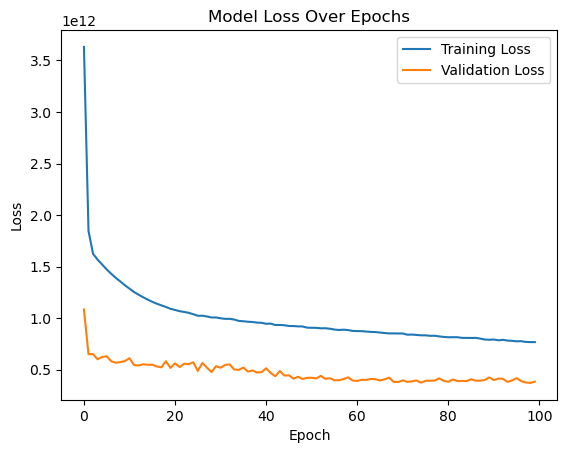

In [336]:
# Library needed to display Loss Function
import matplotlib.pyplot as plt

# Corrected access to the 'history' data stored in the History object
loss_nn_filter_3 = nn_filter_history_3.history['loss']
val_loss_nn_filter_3 = nn_filter_history_3.history['val_loss']

# Plot the loss and validation loss
plt.plot(loss_nn_filter_3, label='Training Loss')
plt.plot(val_loss_nn_filter_3, label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Neural Network Baseline Model with Early Stopping

In [337]:
# Making adjustment towards the Neural Network model to seek any improvements

# Library needed for Early Stopping of Neural Network Model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Setting random seeds to reduce the chance of variability in results
np.random.seed(123)
python_random.seed(123)
tf.random.set_seed(1234)

# Adjusted model architecture
nn_filter_early_model_3 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_filtered_selected_3.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

nn_filter_early_model_3.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Early stopping callback
nn_filter_early_stopping_3 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training with early stopping
nn_filter_early_history_3 = nn_filter_early_model_3.fit(X_train_filtered_selected_3, y_train_3, validation_split=0.1, epochs=100, batch_size=32, callbacks=[nn_filter_early_stopping_3], verbose=1)

# Evaluate the model
test_loss_nn_filter_early_3 = nn_filter_early_model_3.evaluate(X_test_filtered_selected_3, y_test_3, verbose=0)


Epoch 1/100
329/329 [==============================] - 3s 4ms/step - loss: 3860866793472.0000 - val_loss: 2123060609024.0000
Epoch 2/100
329/329 [==============================] - 1s 2ms/step - loss: 3860827471872.0000 - val_loss: 2122997301248.0000
Epoch 3/100
329/329 [==============================] - 1s 2ms/step - loss: 3860708458496.0000 - val_loss: 2122841587712.0000
Epoch 4/100
329/329 [==============================] - 1s 2ms/step - loss: 3860468858880.0000 - val_loss: 2122561880064.0000
Epoch 5/100
329/329 [==============================] - 1s 2ms/step - loss: 3860052836352.0000 - val_loss: 2122112303104.0000
Epoch 6/100
329/329 [==============================] - 1s 2ms/step - loss: 3859463274496.0000 - val_loss: 2121516318720.0000
Epoch 7/100
329/329 [==============================] - 1s 3ms/step - loss: 3858739757056.0000 - val_loss: 2120858206208.0000
Epoch 8/100
329/329 [==============================] - 1s 2ms/step - loss: 3857924489216.0000 - val_loss: 2120052375552.0000


329/329 [==============================] - 1s 2ms/step - loss: 3328770572288.0000 - val_loss: 1654454091776.0000
Epoch 67/100
329/329 [==============================] - 1s 2ms/step - loss: 3306760699904.0000 - val_loss: 1637333860352.0000
Epoch 68/100
329/329 [==============================] - 1s 2ms/step - loss: 3286485434368.0000 - val_loss: 1619815956480.0000
Epoch 69/100
329/329 [==============================] - 1s 2ms/step - loss: 3267921182720.0000 - val_loss: 1602006417408.0000
Epoch 70/100
329/329 [==============================] - 1s 2ms/step - loss: 3243324211200.0000 - val_loss: 1584149823488.0000
Epoch 71/100
329/329 [==============================] - 1s 3ms/step - loss: 3226906394624.0000 - val_loss: 1566451433472.0000
Epoch 72/100
329/329 [==============================] - 1s 2ms/step - loss: 3202099707904.0000 - val_loss: 1548013010944.0000
Epoch 73/100
329/329 [==============================] - 1s 2ms/step - loss: 3184804757504.0000 - val_loss: 1529422282752.0000
Epoch

In [338]:
# Calculating the R2 for the Neural Network Model 2
test_pred_nn_filter_early_3 = nn_filter_early_model_3.predict(X_test_filtered_selected_3)

test_mse_nn_filter_early_3 = mean_squared_error(y_test_3, test_pred_nn_filter_early_3)
test_rmse_nn_filter_early_3 = np.sqrt(test_mse_nn_filter_early_3)
print(f'RMSE Score: {test_rmse_nn_filter_early_3}')
test_mae_nn_filter_early_3 = mean_absolute_error(y_test_3, test_pred_nn_filter_early_3)
print(f'RMSE Score: {test_mae_nn_filter_early_3}')
test_r2_nn_filter_early_3 = r2_score(y_test_3, test_pred_nn_filter_early_3.flatten())  # use flatten() if your output has extra dimensions

print("Early Stopping Neural Network Model R2 Score:", test_r2_nn_filter_early_3)


157/157 [==============================] - 0s 1ms/step
RMSE Score: 1430559.4056742578
RMSE Score: 748950.3784890625
Early Stopping Neural Network Model R2 Score: -0.0648765666248774


##### Hyperparameter Tuning

In [339]:
from kerastuner import HyperModel
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

class NeuralNetworkHyperModel_filter_3(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
        
    def build(self, hp):
        nnht_filter_model_3 = Sequential()
        nnht_filter_model_3.add(Dense(
            units=hp.Int('units_1', min_value=32, max_value=512, step=32),
            activation='relu', 
            input_shape=self.input_shape
        ))
        nnht_filter_model_3.add(Dense(
            units=hp.Int('units_2', min_value=32, max_value=256, step=32),
            activation='relu'
        ))
        nnht_filter_model_3.add(Dense(1))  # Output layer for regression
        
        nnht_filter_model_3.compile(
            optimizer=Adam(
                learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
            ),
            loss='mse'
        )
        return nnht_filter_model_3


In [340]:
# Check the shape of your input data
print("Shape of X_train_3:", X_train_3.shape)


Shape of X_train_3: (11664, 14)


In [341]:
from kerastuner.tuners import RandomSearch

nnht_filter_input_shape_3 = (X_train_filtered_selected_3.shape[1],)
nnht_filter_hypermodel_3 = NeuralNetworkHyperModel_filter_3(input_shape=nnht_filter_input_shape_3)

nnht_filter_tuner_3 = RandomSearch(
    nnht_filter_hypermodel_3,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='nnht_filter_3c',
    project_name='nn_filter_hypertuning_keras_3c'
)

nnht_filter_tuner_3.search(X_train_filtered_selected_3, y_train_3, epochs=100, validation_split=0.1)


Trial 20 Complete [00h 02m 58s]
val_loss: 592673865728.0

Best val_loss So Far: 392314535936.0
Total elapsed time: 01h 05m 09s


In [342]:
nnht_filter_best_model_3 = nnht_filter_tuner_3.get_best_models(num_models=1)[0]

# Evaluate the best model
test_loss_nnht_filter_3 = nnht_filter_best_model_3.evaluate(X_test_filtered_selected_3, y_test_3)
print(f'Best Neural Network Test Loss: {test_loss_nnht_3}')

# Predict and calculate R² Score
test_pred_nnht_filter_3 = nnht_filter_best_model_3.predict(X_test_filtered_selected_3)
test_rmse_nnht_filter_3 = np.sqrt(mean_squared_error(y_test_3, test_pred_nnht_filter_3))
test_mae_nnht_filter_3 = mean_absolute_error(y_test_3, test_pred_nnht_filter_3)
test_r2_nnht_filter_3 = r2_score(y_test_3, test_pred_nnht_filter_3.flatten())

print(f'RMSE: {test_rmse_nnht_filter_3}')
print(f'MAE: {test_mae_nnht_filter_3}')
print(f'R2 Score: {test_r2_nnht_filter_3}')


157/157 [==============================] - 1s 2ms/step - loss: 608356270080.0000
Best Neural Network Test Loss: 617560932352.0
157/157 [==============================] - 0s 1ms/step
RMSE: 779971.7561783461
MAE: 304057.44415625
R2 Score: 0.6834478780063338


##### Hyper Model with Early Stopping

In [343]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
nnht_filter_early_stopping_3 = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the lowest validation loss
)

In [344]:
# Setup your tuner
nnht_filter_early_tuner_3 = RandomSearch(
    nnht_filter_hypermodel_3,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='nnht_filter_early_3c',
    project_name='nn_filter_hypertuning_earlystopping_keras_3c'
)

In [345]:
# Start the search and include early stopping
nnht_filter_early_tuner_3.search(
    X_train_filtered_selected_3, 
    y_train_3, 
    epochs=100, 
    validation_split=0.1, 
    callbacks=[nnht_filter_early_stopping_3]
)

Trial 20 Complete [00h 00m 42s]
val_loss: 604666068992.0

Best val_loss So Far: 346810384384.0
Total elapsed time: 00h 27m 44s


In [346]:
# Retrieve and evaluate the best model
nnht_filter_early_best_model_3 = nnht_filter_early_tuner_3.get_best_models(num_models=1)[0]
test_loss_nnht_filter_early_3 = nnht_filter_early_best_model_3.evaluate(X_test_filtered_selected_3, y_test_3)
test_pred_nnht_filter_early_3 = nnht_filter_early_best_model_3.predict(X_test_filtered_selected_3)
test_rmse_nnht_filter_early_3 = np.sqrt(mean_squared_error(y_test_3, test_pred_nnht_filter_early_3))
test_mae_nnht_filter_early_3 = mean_absolute_error(y_test_3, test_pred_nnht_filter_early_3)
test_r2_nnht_filter_early_3 = r2_score(y_test_3, test_pred_nnht_filter_early_3.flatten())

# Print performance metrics
print(f'Best Neural Network Test Loss: {test_loss_nnht_filter_early_3}')
print(f'RMSE: {test_rmse_nnht_filter_early_3}')
print(f'MAE: {test_mae_nnht_filter_early_3}')
print(f'R2 Score: {test_r2_nnht_filter_early_3}')

157/157 [==============================] - 0s 1ms/step
Best Neural Network Test Loss: 577964146688.0
RMSE: 760239.5852876321
MAE: 295343.22828125
R2 Score: 0.6992619117447845


##### Comparison

In [347]:
# Displaying the comparison through a table

nn_filter_comparison_3 = {
    'Model': ['V3 Neural Network (Filtered Features) Baseline Model', 'V3 Neural Network (Filtered Features) Baseline Model with Early Stopping', 'V3 Neural Network (Filtered Features) Hyper Model', 'V3 Neural Network (Filtered Features) Hyper Model with Early Stopping'],
    'Model Object': [nn_filter_model_3, nn_filter_early_model_3, nnht_filter_best_model_3, nnht_filter_early_best_model_3],
    'RMSE': [test_rmse_nn_filter_3, test_rmse_nn_filter_early_3, test_rmse_nnht_filter_3, test_rmse_nnht_filter_early_3],
    'MAE': [test_mae_nn_filter_3, test_mae_nn_filter_early_3, test_mae_nnht_filter_3, test_mae_nnht_filter_early_3],
    'R-Squared Score': [test_r2_nn_filter_3, test_r2_nn_filter_early_3, test_r2_nnht_filter_3, test_r2_nnht_filter_early_3]
}

nn_filter_comparison_3 = pd.DataFrame(nn_filter_comparison_3)

nn_filter_comparison_3.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
0,V3 Neural Network (Filtered Features) Baseline...,<keras.src.engine.sequential.Sequential object...,7.433223e+05,295475.257013,0.712497
3,V3 Neural Network (Filtered Features) Hyper Mo...,<keras.src.engine.sequential.Sequential object...,7.602396e+05,295343.228281,0.699262
2,V3 Neural Network (Filtered Features) Hyper Model,<keras.src.engine.sequential.Sequential object...,7.799718e+05,304057.444156,0.683448
1,V3 Neural Network (Filtered Features) Baseline...,<keras.src.engine.sequential.Sequential object...,1.430559e+06,748950.378489,-0.064877


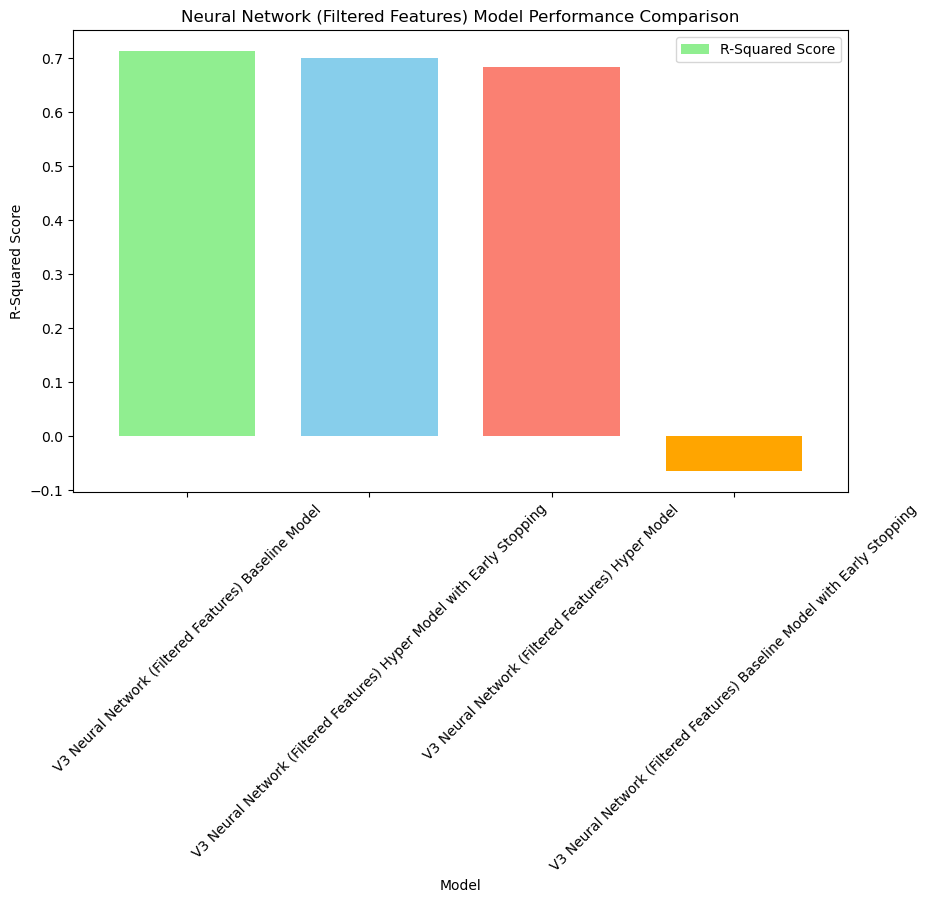

In [348]:
# Sort the DataFrame by 'R-Squared Score' in descending order
nn_filter_comparison_3 = nn_filter_comparison_3.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_nn_filter_3 = ['lightgreen', 'skyblue', 'salmon', 'orange']

# Create a figure and a set of subplots
fig_nn_filter_3, ax_nn_filter_3 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_nn_filter_3 = nn_filter_comparison_3.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_nn_filter_3,  # Apply different colors
    ax=ax_nn_filter_3,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_nn_filter_3.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_nn_filter_3.set_title('Neural Network (Filtered Features) Model Performance Comparison')

# Rotate x-axis labels
ax_nn_filter_3.set_xticklabels(ax_nn_filter_3.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_nn_filter_3, labels_nn_filter_3 = ax_nn_filter_3.get_legend_handles_labels()
ax_nn_filter_3.legend(lines_nn_filter_3, labels_nn_filter_3)

# Show the plot
plt.show()

In [349]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
nn_filter_comparison_3 = nn_filter_comparison_3.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_nn_filter_model_name_3 = nn_filter_comparison_3.iloc[0]['Model']
best_nn_filter_model_3 = nn_filter_comparison_3.iloc[0]['Model Object']
best_nn_filter_r2_score_3 = nn_filter_comparison_3.iloc[0]['R-Squared Score']
best_nn_filter_rmse_3 = nn_filter_comparison_3.iloc[0]['RMSE']
best_nn_filter_mae_3 = nn_filter_comparison_3.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_nn_filter_3 = best_nn_filter_model_name_3

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_nn_filter_3)
print("The highest R-Squared Score is:", best_nn_filter_r2_score_3)
print("The best RMSE is:", best_nn_filter_rmse_3)
print("The best MAE is:", best_nn_filter_mae_3)

The best model based on R-Squared Score is: V3 Neural Network (Filtered Features) Baseline Model
The highest R-Squared Score is: 0.7124973990475919
The best RMSE is: 743322.2811437261
The best MAE is: 295475.2570125


#### 3.3.6.3. Neural Network Model Comparison

In [350]:
# Displaying the comparison through a table

nn_all_comparison_3 = {
    'Model': [best_nn_model_name_3, best_nn_filter_model_name_3],
    'Model Object': [best_nn_model_3, best_nn_filter_model_3],
    'RMSE': [best_nn_rmse_3, best_nn_filter_rmse_3],
    'MAE': [best_nn_mae_3, best_nn_filter_mae_3],
    'R-Squared Score': [best_nn_r2_score_3, best_nn_filter_r2_score_3]
}

nn_all_comparison_3 = pd.DataFrame(nn_all_comparison_3)

nn_all_comparison_3.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
1,V3 Neural Network (Filtered Features) Baseline...,<keras.src.engine.sequential.Sequential object...,743322.281144,295475.257013,0.712497
0,V3 Neural Network Baseline Model,<keras.src.engine.sequential.Sequential object...,755077.274194,265274.418441,0.703332


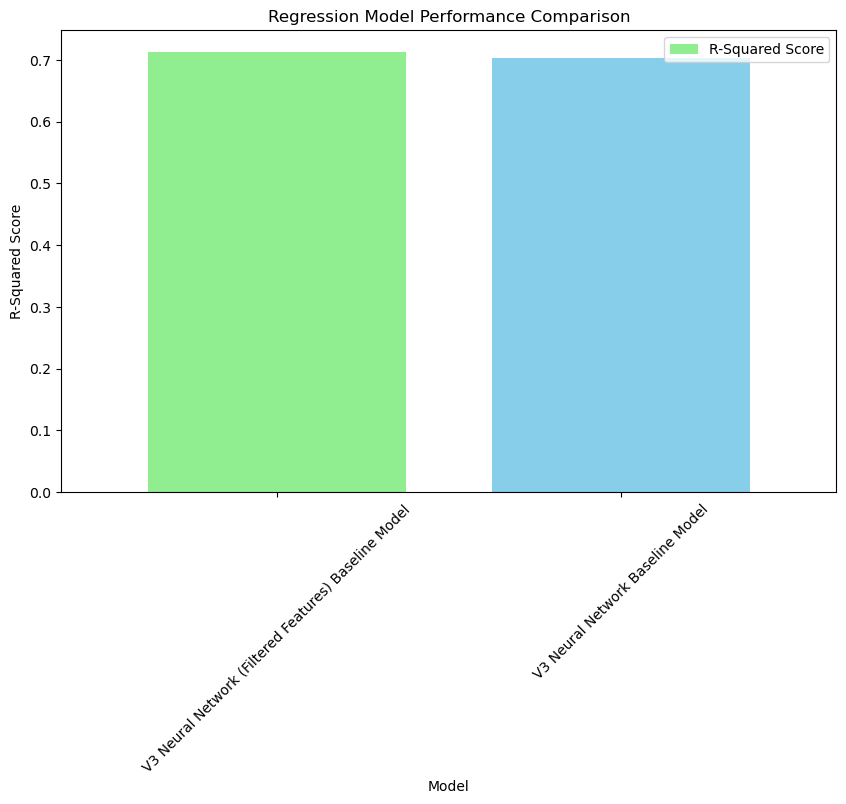

In [351]:
# Sort the DataFrame by 'R-Squared Score' in descending order
nn_all_comparison_3 = nn_all_comparison_3.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_nn_all_3 = ['lightgreen', 'skyblue', 'salmon']

# Create a figure and a set of subplots
fig_nn_all_3, ax_nn_all_3 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_nn_all_3 = nn_all_comparison_3.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_nn_all_3,  # Apply different colors
    ax=ax_nn_all_3,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_nn_all_3.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_nn_all_3.set_title('Regression Model Performance Comparison')

# Rotate x-axis labels
ax_nn_all_3.set_xticklabels(ax_nn_all_3.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_nn_all_3, labels_nn_all_3 = ax_nn_all_3.get_legend_handles_labels()
ax_nn_all_3.legend(lines_nn_all_3, labels_nn_all_3)

# Show the plot
plt.show()

In [352]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
nn_all_comparison_3 = nn_all_comparison_3.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_nn_all_model_name_3 = nn_all_comparison_3.iloc[0]['Model']
best_nn_all_model_3 = nn_all_comparison_3.iloc[0]['Model Object']
best_nn_all_r2_score_3 = nn_all_comparison_3.iloc[0]['R-Squared Score']
best_nn_all_rmse_3= nn_all_comparison_3.iloc[0]['RMSE']
best_nn_all_mae_3 = nn_all_comparison_3.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_nn_all_3 = best_nn_all_model_name_3

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_nn_all_3)
print("The highest R-Squared Score is:", best_nn_all_r2_score_3)
print("The best RMSE is:", best_nn_all_rmse_3)
print("The best MAE is:", best_nn_all_mae_3)

The best model based on R-Squared Score is: V3 Neural Network (Filtered Features) Baseline Model
The highest R-Squared Score is: 0.7124973990475919
The best RMSE is: 743322.2811437261
The best MAE is: 295475.2570125


### 3.3.7. All Model Comparison

In [353]:
# Displaying the comparison through a table

model_comparison_3 = {
    'Model': [best_reg_model_name_3, best_nn_all_model_name_3],
    'Model Object': [best_reg_model_3, best_nn_all_model_3],
    'RMSE': [best_reg_rmse_3, best_nn_all_rmse_3],
    'MAE': [best_reg_mae_3, best_nn_all_mae_3],
    'R-Squared Score': [best_reg_r2_score_3, best_nn_all_r2_score_3]
}

model_comparison_3 = pd.DataFrame(model_comparison_3)

model_comparison_3.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
0,V3 Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",729592.479595,163012.074478,0.723020
1,V3 Neural Network (Filtered Features) Baseline...,<keras.src.engine.sequential.Sequential object...,743322.281144,295475.257013,0.712497


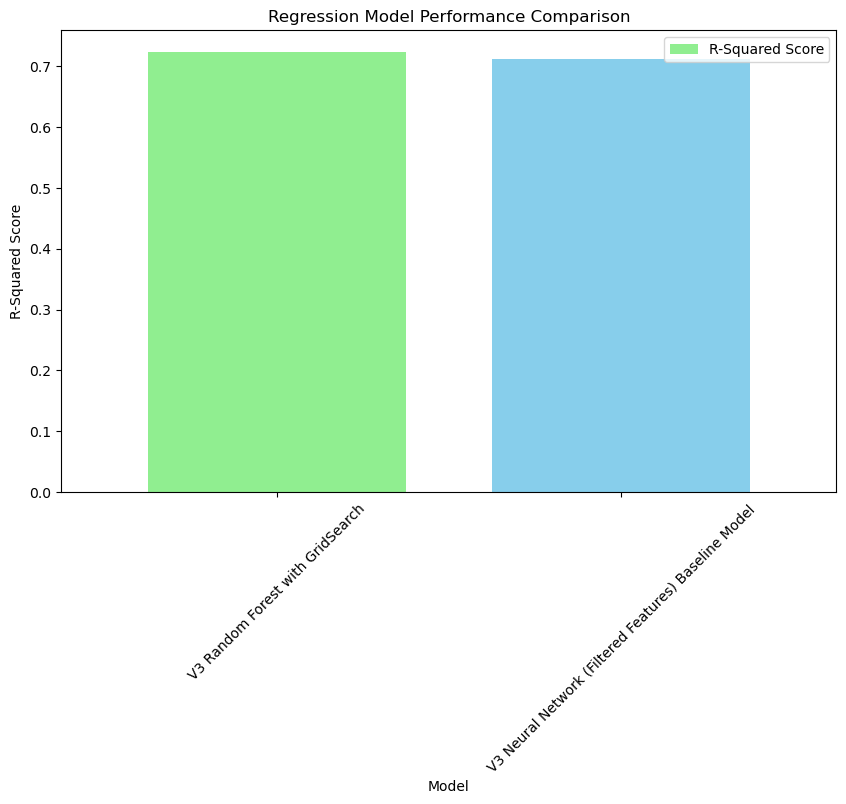

In [354]:
# Sort the DataFrame by 'R-Squared Score' in descending order
model_comparison_3 = model_comparison_3.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_model_3 = ['lightgreen', 'skyblue', 'salmon']

# Create a figure and a set of subplots
fig_model_3, ax_model_3 = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_model_3 = model_comparison_3.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_model_3,  # Apply different colors
    ax=ax_model_3,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_model_3.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_model_3.set_title('Regression Model Performance Comparison')

# Rotate x-axis labels
ax_model_3.set_xticklabels(ax_model_3.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_model_3, labels_model_3 = ax_model_3.get_legend_handles_labels()
ax_model_3.legend(lines_model_3, labels_model_2)

# Show the plot
plt.show()

In [355]:
# We choose the best model based on the highest R-Squared Score

# Sort the DataFrame based on 'R-Squared Score' in descending order
model_comparison_3 = model_comparison_3.sort_values('R-Squared Score', ascending=False)

# Extract the model name and the highest R-Squared Score
best_model_name_3 = model_comparison_3.iloc[0]['Model']
best_model_3 = model_comparison_3.iloc[0]['Model Object']
best_r2_score_3 = model_comparison_3.iloc[0]['R-Squared Score']
best_rmse_3 = model_comparison_3.iloc[0]['RMSE']
best_mae_3 = model_comparison_3.iloc[0]['MAE']

# Extract the model name with the highest R-Squared Score
best_model_name__3 = best_model_name_3

# Print the best model and its R-Squared Score
print("The best model based on R-Squared Score is:", best_model_name__3)
print("The highest R-Squared Score is:", best_r2_score_3)
print("The best RMSE is:", best_rmse_3)
print("The best MAE is:", best_mae_3)

The best model based on R-Squared Score is: V3 Random Forest with GridSearch
The highest R-Squared Score is: 0.7230201514184409
The best RMSE is: 729592.4795949323
The best MAE is: 163012.07447770232


# 4. All Version Comparison

## 4.1. Version Analysis

## 4.1. All Model for each Version

In [356]:
model_comparison = pd.concat([reg_comparison_1, reg_comparison_2, reg_comparison_3, nn_all_comparison_1, nn_all_comparison_2, nn_all_comparison_3], ignore_index=True)

In [357]:
model_comparison = model_comparison.sort_values('R-Squared Score', ascending=False)


In [358]:
model_comparison

,Model,Model Object,RMSE,MAE,R-Squared Score
6,V3 Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",729592.479595,163012.074478,0.723020
3,V2 Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",0.499030,0.111467,0.722513
0,Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",0.501998,0.111305,0.719202
13,V3 Neural Network (Filtered Features) Baseline...,<keras.src.engine.sequential.Sequential object...,743322.281144,295475.257013,0.712497
9,Neural Network Hyper Model,<keras.src.engine.sequential.Sequential object...,0.515784,0.168107,0.703568
14,V3 Neural Network Baseline Model,<keras.src.engine.sequential.Sequential object...,755077.274194,265274.418441,0.703332
10,Neural Network (Filtered Features) Baseline Mo...,<keras.src.engine.sequential.Sequential object...,0.530158,0.204973,0.686816
1,XGBoost with GridSearch,"XGBRegressor(base_score=None, booster=None, ca...",0.560870,0.172496,0.649479
4,V2 XGBoost with GridSearch,"XGBRegressor(base_score=None, booster=None, ca...",0.563892,0.172785,0.645692
7,V3 XGBoost with RandomizedSearch,"XGBRegressor(base_score=None, booster=None, ca...",825962.442811,241427.438872,0.645017


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


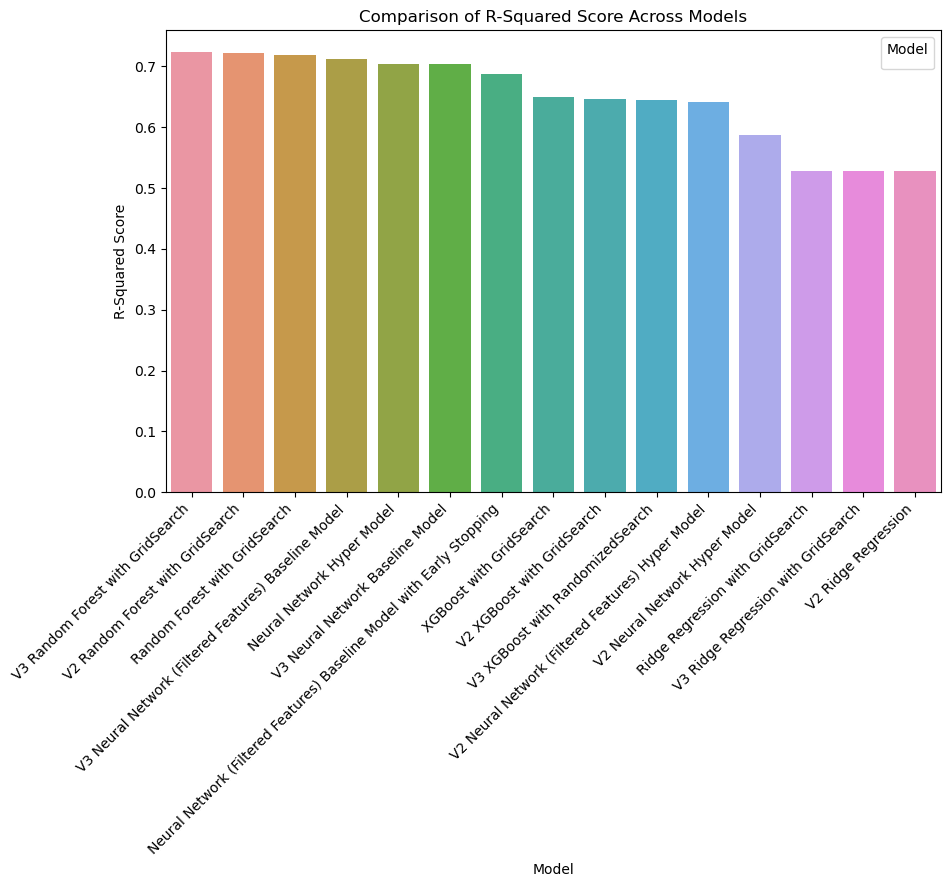

In [359]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming best_model_comparison is correctly defined with columns 'Model' and 'R-Squared Score'
fig_model, ax_model = plt.subplots(figsize=(10, 6))  # Adjust size as needed

# Plotting R-Squared Score
sns.barplot(x='Model', y='R-Squared Score', data=model_comparison, ax=ax_model)
ax_model.set_title('Comparison of R-Squared Score Across Models')
ax_model.set_ylabel('R-Squared Score')
ax_model.set_xlabel('Model')

# Handling legend if necessary (may be redundant if 'hue' is the same as 'x')
ax_model.legend(title='Model')

# Rotate x-axis labels for better visibility
ax_model.set_xticklabels(ax_model.get_xticklabels(), rotation=45, ha="right")  # Adjust rotation and alignment as needed

plt.show()


## 4.2. Top 2 Models for Each Version

In [360]:
best_model_comparison = pd.concat([model_comparison_1, model_comparison_2, model_comparison_3], ignore_index=True)


In [361]:
best_model_comparison = best_model_comparison.sort_values('R-Squared Score', ascending=False)


In [362]:
best_model_comparison

,Model,Model Object,RMSE,MAE,R-Squared Score
4,V3 Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",729592.479595,163012.074478,0.723020
2,V2 Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",0.499030,0.111467,0.722513
0,Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",0.501998,0.111305,0.719202
5,V3 Neural Network (Filtered Features) Baseline...,<keras.src.engine.sequential.Sequential object...,743322.281144,295475.257013,0.712497
1,Neural Network Hyper Model,<keras.src.engine.sequential.Sequential object...,0.515784,0.168107,0.703568
3,V2 Neural Network (Filtered Features) Hyper Model,<keras.src.engine.sequential.Sequential object...,0.567040,0.217733,0.641724


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


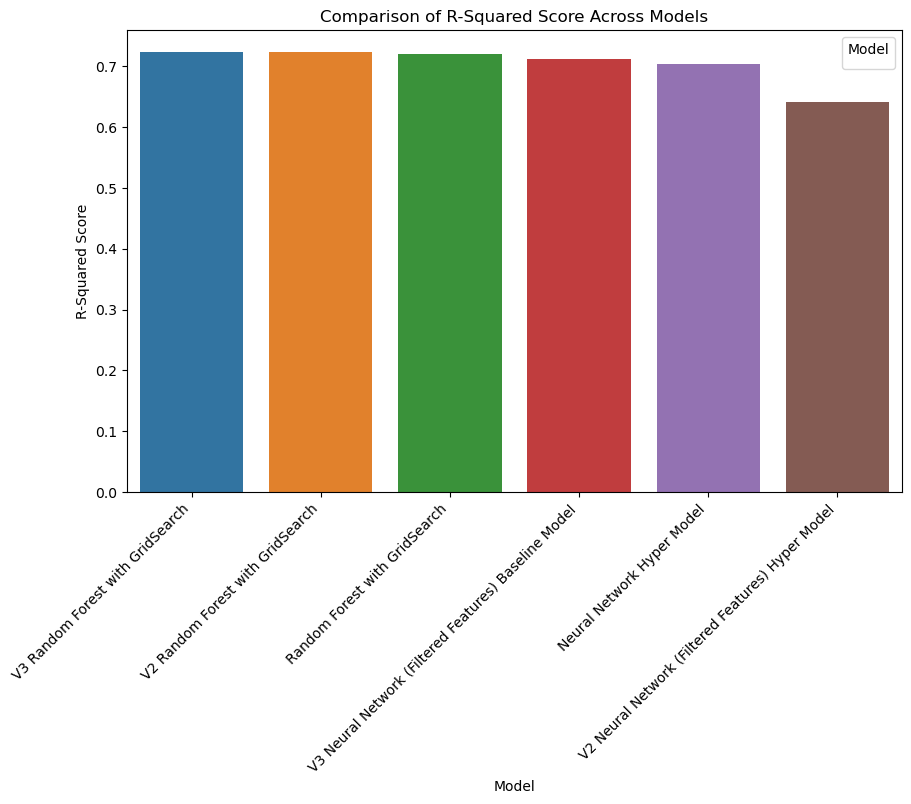

In [363]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming best_model_comparison is correctly defined with columns 'Model' and 'R-Squared Score'
fig_best, ax_best = plt.subplots(figsize=(10, 6))  # Adjust size as needed

# Plotting R-Squared Score
sns.barplot(x='Model', y='R-Squared Score', data=best_model_comparison, ax=ax_best)
ax_best.set_title('Comparison of R-Squared Score Across Models')
ax_best.set_ylabel('R-Squared Score')
ax_best.set_xlabel('Model')

# Handling legend if necessary (may be redundant if 'hue' is the same as 'x')
ax_best.legend(title='Model')

# Rotate x-axis labels for better visibility
ax_best.set_xticklabels(ax_best.get_xticklabels(), rotation=45, ha="right")  # Adjust rotation and alignment as needed

plt.show()


## 4.2. Best Model for each Version

In [364]:
# Displaying the comparison through a table

version_comparison = {
    'Model': [best_model_name_1, best_model_name_2, best_model_name_3],
    'Model Object': [best_model_1, best_model_2, best_model_3],
    'RMSE': [best_rmse_1, best_rmse_2, best_rmse_3],
    'MAE': [best_mae_1, best_mae_2, best_mae_3],
    'R-Squared Score': [best_r2_score_1, best_r2_score_2, best_r2_score_3]
}

version_comparison = pd.DataFrame(version_comparison)

version_comparison.sort_values(['R-Squared Score'], ascending=[False])


,Model,Model Object,RMSE,MAE,R-Squared Score
2,V3 Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",729592.479595,163012.074478,0.723020
1,V2 Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",0.499030,0.111467,0.722513
0,Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",0.501998,0.111305,0.719202


In [365]:
version_comparison

,Model,Model Object,RMSE,MAE,R-Squared Score
0,Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",0.501998,0.111305,0.719202
1,V2 Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",0.499030,0.111467,0.722513
2,V3 Random Forest with GridSearch,"(DecisionTreeRegressor(max_depth=30, max_featu...",729592.479595,163012.074478,0.723020


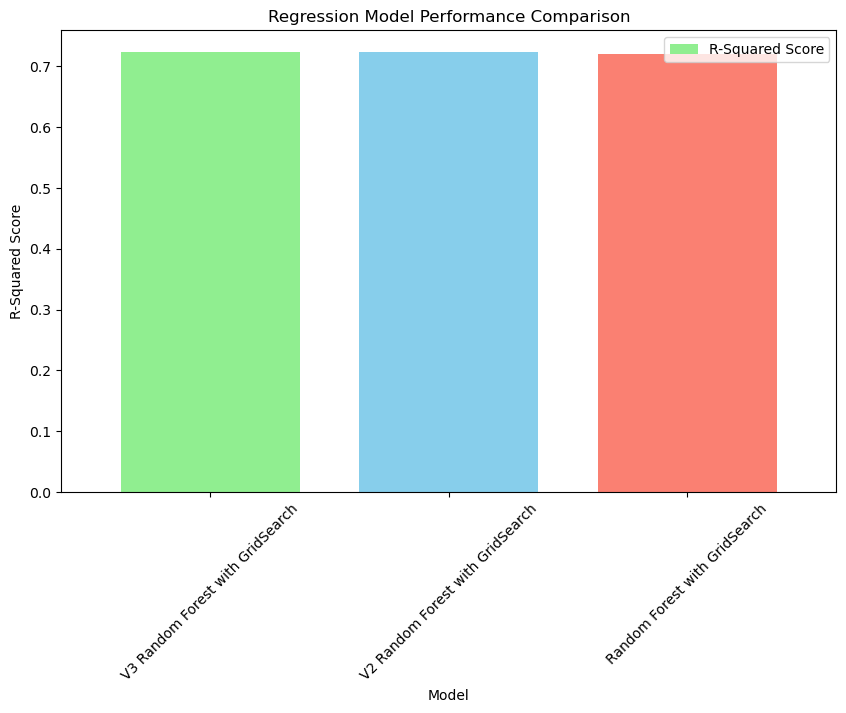

In [366]:
# Sort the DataFrame by 'R-Squared Score' in descending order
version_comparison = version_comparison.sort_values('R-Squared Score', ascending=False)

# Define a list of colors, one for each model
colors_version = ['lightgreen', 'skyblue', 'salmon']

# Create a figure and a set of subplots
fig_version, ax_version = plt.subplots(figsize=(10, 6))

# Plot R-Squared Score as bar graph with different colors
r2_bars_version = version_comparison.plot(
    kind='bar',
    x='Model',
    y='R-Squared Score',
    color=colors_version,  # Apply different colors
    ax=ax_version,
    label='R-Squared Score',
    width=0.75
)

# Setting titles and labels
ax_version.set_ylabel('R-Squared Score', color='black')  # Updated label
ax_version.set_title('Regression Model Performance Comparison')

# Rotate x-axis labels
ax_version.set_xticklabels(ax_version.get_xticklabels(), rotation=45)  # Rotate labels to 45 degrees

# Legend configuration
lines_version, labels_model_3 = ax_model_3.get_legend_handles_labels()
ax_model_3.legend(lines_model_3, labels_model_2)

# Show the plot
plt.show()